# **Project Title:**  Drug Response Prediction
### Student Name: Tanaya Jayprakash Bowade
### Student ID: A00014485


---



### **Project Summary**

- **Objective:**  
  This project aims to develop a deep learning model to predict the **drug response (IC50 values)** of cancer cell lines based on **molecular features of drugs** and **gene expression profiles** of cell lines. The ultimate goal is to assist in personalized cancer treatment recommendations by identifying effective drug–cell combinations.

- **Dataset Overview:**  
  The project utilizes:
  - **GDSC (Genomics of Drug Sensitivity in Cancer)** for drug response data (IC50 values)
  - **CCLE (Cancer Cell Line Encyclopedia)** for gene expression data of cancer cell lines  
  These datasets are highly relevant in pharmacogenomics and enable training models that reflect real-world biological behavior.

- **Deep Learning Approach:**  
  A hybrid **Graph-CNN + 1D-CNN** architecture was employed:
  - **Graph Convolutional Network (GCN)** to model drug molecular structures from SMILES strings
  - **1D Convolutional Neural Network** to process gene expression data  
  The combined features are passed through **cross-attention layers** and fully connected layers to predict IC50 drug response values.





---



### References


[1] Structured Data Stored at https://drive.google.com/file/d/1cwBgLi-QLPtOS_hoehR3POlPLlWCs6eV/view?usp=drive_link  
Sources:
 - [1.1] Drug data :`PANCANCER_IC.csv` from GDSC  https://www.cancerrxgene.org/downloads/drug_data

 - [1.2] Gene Expression data :`CCLE_expression.csv` from CCLE https://depmap.org/portal/download/all/

 - [1.3] SMILES structures data: `drug_smiles.csv` from Pubchem  https://pubchem.ncbi.nlm.nih.gov/source/

 - [1.4] Additional Files `sample_info.csv` and `landmark_genes.txt` https://github.com/SCSE-Biomedical-Computing-Group/XGDP/tree/main/data


[2] @conghaowang. (2025). *XGDP*. GitHub repository.  
   https://github.com/SCSE-Biomedical-Computing-Group/XGDP  
   - Used for SMILES-to-graph conversion and atom feature encoding.
   - Adapted due to domain-specific biochemical knowledge.


[3] RDKit: Open-source cheminformatics.  
   https://www.rdkit.org  
   - Used for parsing and processing SMILES molecular structures.

[4] PyTorch Geometric (PyG).  
   https://pytorch-geometric.readthedocs.io/en/latest/  
   - Used for graph data representation and GCN models.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install nvidia-ml-py3

  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19172 sha256=314fa4db2950d99d7645f9c96f11b7b1e66fdf2360ba7d83550890412292eeff
  Stored in directory: /root/.cache/pip/wheels/47/50/9e/29dc79037d74c3c1bb4a8661fb608e8674b7e4260d6a3f8f51
Successfully built nvidia-ml-py3


In [ ]:
#For RDkit compatibility
!pip install numpy==1.26.4 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 28.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


!!!!!! **Restart session after installing above numpy version** !!!!!

In [ ]:
#Installing dependencies
#  Install Core Libraries %numpy pandas scikit-learn matplotlib seaborn
!pip install tqdm joblib

# Verify Pre-installed PyTorch Version
import torch
print("PyTorch Version:", torch.__version__)  # Should show pre-installed version

# Install PyTorch Geometric (GNNs)
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.5.0+cu124.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.5.0+cu124.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.5.0+cu124.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.5.0+cu124.html
!pip install torch-geometric

# Install RDKit & Molecular Processing Packages
!pip install rdkit-pypi pubchempy molvs


PyTorch Version: 2.6.0+cu124
Looking in links: https://data.pyg.org/whl/torch-2.5.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 29.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 38.1 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 25.5 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 18.7 MB/s eta

In [ ]:
import numpy as np
import pandas as pd
import pickle
import pubchempy as pcp
from collections import Counter

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw


from rdkit.Chem import AllChem
from rdkit import DataStructs
from molvs import standardize_smiles

import random
from random import shuffle

import time
import datetime

import networkx as nx

import csv
import math
from math import sqrt
from scipy import stats
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

import os
import sys
import nvidia_smi
from tqdm import tqdm


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Sequential, Linear, ReLU
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_max_pool as gmp
from torch_geometric.nn import global_add_pool



from torch_geometric.data import InMemoryDataset
from torch_geometric.data import DataLoader
from torch_geometric import data as DATA

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_scatter_cuda.so: undefined symbol: _ZN2at4_ops16div__Tensor_mode4callERNS_6TensorERKS2_St8optionalIN3c1017basic_string_viewIcEEE
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_basis_cuda.so: undefined symbol: _ZN5torch8autograd12VariableInfoC1ERKN2at6TensorE
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_spmm_cuda.so: undefined sy

# **Step I : Data Preparation**

### **Overview**
This project utilises the **GDSC drug sensitivity dataset** and **CCLE gene expression dataset** to predict cancer cell responses to drugs. The data is preprocessed into a structured format before being used for deep learning.

---

### **Steps in Data Preparation**

#### **i. Retrieving and Organising Data**
- Drug response data (`PANCANCER_IC`) from **GDSC**.
- Gene expression data (`CCLE_expression`) from **CCLE**.
- SMILES structure drugs data (`drug_smiles.csv`) from **PubChem**
- Data is stored in `root_folder/`, with unique branches for different experiments.

---

#### **ii. Extracting Features**

**Drug Molecular Features**
- Graph-based representations using SMILES strings (GNN-compatible).
- Atomic and bond-level features extracted from molecular graphs.

**Gene Expression Features**
- Top 1000 landmark genes selected for feature representation.
- Filtering with L1000 ensures high-quality, biologically relevant expression data.

---

#### **iii. Merging Drug and Gene Expression Data**
- The function `prepare_drug_cellline_dataset()` integrates:
  - **Drug molecular graph features**
  - **Gene expression profiles**
  - **IC50 drug response values**

- All valid drug–cell line combinations are preserved.
- Missing entries are excluded automatically to maintain data consistency.

---

#### **iv. Missing Data Check**

- To ensure data integrity, each drug-cell line pair was checked for:
  - Availability of the **drug's SMILES structure**
  - Availability of the **cell line's gene expression profile**

- **Total drug-cell-line pairs**: 224,510  
- **Missing entries detected**: 91,298  
- These incomplete entries were **excluded** from model training to avoid issues with NaNs or corrupted inputs.

---

#### **v. Outlier Detection in Target Variable (IC50)**

- IC50 values were evaluated using **Interquartile Range (IQR)** method to identify statistical outliers.
- **Outliers detected**: 4,151 values
- **Outlier percentage**: 3.12% (out of 133,212 valid samples)

> Despite the presence of mild outliers, no IC50 values were removed to retain biological variability. Loss functions like `HuberLoss` were considered to handle potential outlier impact.

---

#### **vi. Splitting into Train, Validation, and Test Sets**
- Data was split using an **80-10-10 rule** for training, validation, and testing.
- Random shuffling applied for reproducibility.
- Final splits saved in PyTorch-compatible format (`.pt`).

---

#### **vii. Dataset Partitions**

| Partition        | Purpose              | Size  |
|------------------|-----------------------|--------|
| **Training Set**   | Used for model learning   | 80%    |
| **Validation Set** | Used for hyperparameter tuning | 10%    |
| **Test Set**       | Used for final evaluation   | 10%    |

---

### **Result**
The final dataset contains only complete, clean drug–cell line pairs and is saved in `root_folder/` in a format ready for GNN and CNN model training.


## **Implementation**

Data Loading Steps for reproduction of code :

1. Download the structured data (data.zip)file from this drive link https://drive.google.com/file/d/1cwBgLi-QLPtOS_hoehR3POlPLlWCs6eV/view?usp=drive_link  and place the folder in your local colab workspace .
2. The path of the file should be  `/content/data.zip`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip the folder after download
!unzip /content/drive/MyDrive/Drug_Response_DeepLearning/data.zip

Archive:  /content/drive/MyDrive/Drug_Response_DeepLearning/data.zip
   creating: data/
  inflating: __MACOSX/._data         
   creating: data/GDSC/
  inflating: __MACOSX/data/._GDSC    
   creating: data/CCLE/
  inflating: __MACOSX/data/._CCLE    
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/landmark_genes.txt  
  inflating: __MACOSX/data/._landmark_genes.txt  
  inflating: data/GDSC/drug_smiles.csv  
  inflating: __MACOSX/data/GDSC/._drug_smiles.csv  
  inflating: data/GDSC/.DS_Store     
  inflating: __MACOSX/data/GDSC/._.DS_Store  
  inflating: data/GDSC/PANCANCER_IC.csv  
  inflating: __MACOSX/data/GDSC/._PANCANCER_IC.csv  
  inflating: data/CCLE/CCLE_expression.csv  
  inflating: __MACOSX/data/CCLE/._CCLE_expression.csv  
  inflating: data/CCLE/sample_info.csv  
  inflating: __MACOSX/data/CCLE/._sample_info.csv  


Feature Engineering for Molecular Representation

In [ ]:
# Adapted from [2]
# Reason for use: This code involves biochemical domain knowledge (e.g., SMILES parsing, atom feature encoding)
# which required expertise beyond my current scope. The implementation was adapted with attribution,
# and used as a foundation for further development in this project.
# Modifications:
# - Logic adjustments for compatibility with my pipeline
# - Variable renaming and docstring additions

def convert_smile_to_graph(smiles_str, include_bond_features=False, use_relational_bonds=False):
    """
    Converts a SMILES string representation of a molecule into graph representation.

    Args:
        smiles_str (str): The SMILES string representing a molecule.

    Returns:
        dict: Graph representation with nodes and edges.
    """
    molecule = Chem.MolFromSmiles(smiles_str)
    num_atoms = molecule.GetNumAtoms()

    # Extract atom features
    atom_features = []
    for atom in molecule.GetAtoms():
        atom_encoding = encode_atom_features(atom)
        atom_features.append(sum(atom_encoding)*atom_encoding / sum(atom_encoding))

    bond_feature_dict = {}
    edge_pairs = []
    bond_feature_list = []

    for bond in molecule.GetBonds():
        edge_pairs.append([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])

        if include_bond_features:
            bond_encoding = [0 for _ in range(4)]
            bond_type_index = ['SINGLE', 'DOUBLE', 'TRIPLE', 'AROMATIC'].index(str(bond.GetBondType()))
            bond_encoding[bond_type_index] = 1

            if use_relational_bonds:
                bond_features_array = np.array([bond_type_index])
            else:
                bond_features_array = np.array(bond_encoding)

            bond_feature_dict[(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())] = bond_features_array
            bond_feature_dict[(bond.GetEndAtomIdx(), bond.GetBeginAtomIdx())] = bond_features_array

    graph_obj = nx.Graph(edge_pairs).to_directed()
    directed_edges = []
    for src_node, dst_node in graph_obj.edges:
        directed_edges.append([src_node, dst_node])
        if include_bond_features:
            bond_feature_list.append(bond_feature_dict[(src_node, dst_node)])

    if include_bond_features:
        return num_atoms, atom_features, directed_edges, bond_feature_list, graph_obj
    else:
        return num_atoms, atom_features, directed_edges, graph_obj



def load_smile_to_graph(include_bond_features=False, use_relational_bonds=False, data_dir="/content/data/GDSC/"):
    """
    Converts drug SMILES strings into graph-based molecular representations.

    Returns:
        - drug_name_to_index (dict): Maps each drug name (str) to its corresponding index (int) in the drug_smile list.
        - smiles_list (list): List of SMILES strings representing drug molecules.
        - smiles_graph_map (dict): Maps each SMILES string (str) to its graph representation as a tuple:
            (num_atoms, node_features, edge_index, [edge_features], networkx_graph)
    """
    drug_name_to_index = {}
    smiles_list = []

    reader = csv.reader(open(data_dir + "drug_smiles.csv"))
    next(reader, None)

    for cnt, item in enumerate(reader):
        name = item[0]
        smile = item[2]

        if smile == "N.N.[Cl-].[Cl-].[Pt+2]":
            continue

        if name in drug_name_to_index:
            pos = drug_name_to_index[name]
        else:
            pos = len(drug_name_to_index)
            drug_name_to_index[name] = pos

        smiles_list.append(smile)

    smiles_graph_map = {}

    for smile in smiles_list:
        gr = convert_smile_to_graph(smile,include_bond_features, use_relational_bonds)
        smiles_graph_map[smile] = gr

    return drug_name_to_index, smiles_list, smiles_graph_map



def preprocess_gene_expression(expr_df, metadata_df):
    """
    Preprocesses gene expression data from the CCLE dataset using landmark genes and COSMIC IDs.

    This function filters the input gene expression matrix to retain only the landmark genes
    (common informative genes), merges it with sample metadata using DepMap IDs, and returns
    a cleaned matrix indexed by COSMIC IDs.

    Args:
        expr_df (pd.DataFrame): Gene expression data (samples x genes) with DepMap IDs as index.
        metadata_df (pd.DataFrame): Metadata including 'DepMap_ID' and 'COSMICID' columns.

    Returns:
        pd.DataFrame: Processed gene expression matrix (indexed by COSMICID) with only landmark genes.
    """

    landmark_df = pd.read_csv('/content/data/landmark_genes.txt', sep='\t', header=0)
    landmark_genes = landmark_df['Symbol'].values
    expr_df.columns = [c.split(' (')[0] for c in expr_df.columns]

    valid_genes = expr_df.columns.values
    chosen_genes = np.intersect1d(landmark_genes, valid_genes)
    filtered_expr_df = expr_df[chosen_genes]
    print('number of preserved landmark genes:', len(chosen_genes))

    metadata_df = metadata_df[metadata_df['COSMICID'].notna()]
    expr_data = filtered_expr_df.merge(
        metadata_df, left_index=True, right_on='DepMap_ID')
    expr_data.drop('DepMap_ID', axis=1, inplace=True)

    expr_data['COSMICID'] = expr_data['COSMICID'].astype(int).astype(str)
    expr_data.set_index('COSMICID', inplace=True)

    return expr_data



def save_preprocessed_gene_data(data_dir='/content/data/CCLE/'):
    """
    Loads and preprocesses gene expression data from the CCLE dataset.

    This function reads gene expression values and sample metadata from the specified folder,
    filters the gene expression matrix using landmark genes, and constructs:
    - a dictionary mapping COSMIC IDs to index positions,
    - a matrix of gene expression values, and
    - the list of selected gene names.

    Args:
        data_dir (str, optional): Path to the directory containing 'CCLE_expression.csv' and 'sample_info.csv'. Defaults to '/content/data/CCLE/'.

    Returns:
        tuple:
            - cell_id_to_index (dict): Mapping from COSMIC ID (str) to its index (int) in the expression matrix.
            - cell_expression_matrix (np.ndarray): Matrix of gene expression values for each cell line.
            - selected_gene_names (pd.Index): List of gene names (columns) in the processed expression matrix.
    """

    expression_df = pd.read_csv(data_dir + 'CCLE_expression.csv', index_col=0, header=0)
    metadata_df = pd.read_csv(data_dir + 'sample_info.csv',
                          header=0, usecols=['DepMap_ID', 'COSMICID'])
    processed_expr_df = preprocess_gene_expression(expression_df, metadata_df)

    cell_lines = processed_expr_df.index.values
    cell_id_to_index = dict()
    for c in cell_lines:
        idx = np.where(cell_lines == c)[0]
        cell_id_to_index[c] = idx

    cell_expression_matrix = processed_expr_df.values
    selected_gene_names = processed_expr_df.columns

    # For gradio app (cell id to name mapping)
    # cell_id_to_name = processed_expr_df.reset_index()[['COSMICID']]
    # cell_id_to_name['DepMap_ID'] = metadata_df.set_index('COSMICID').loc[cell_id_to_name['COSMICID']]['DepMap_ID'].values
    # cell_id_to_name = dict(zip(cell_id_to_name['COSMICID'], cell_id_to_name['DepMap_ID']))

    # # Save to JSON
    # with open('cell_id_to_name.json', 'w') as f:
    #     json.dump(cell_id_to_name, f)

    # print(f"✅ Saved {len(cell_id_to_name)} cell line ID-to-name mappings to 'cell_id_to_name.json'")


    return cell_id_to_index, cell_expression_matrix, selected_gene_names



def prepare_drug_cellline_dataset(include_bond_features=False, use_relational_bonds=False, return_labels=True,
                                     data_dir='/content/data/GDSC/'):
    """
    Builds a dataset combining drug SMILES, gene expression profiles, and IC50 response values.

    Args:
        include_bond_features (bool): Include bond features in drug graphs. Default is False.
        use_relational_bonds (bool): Encode bond types as relational indices. Default is False.
        return_labels (bool): Whether to return drug and cell line names. Default is True.
        data_dir (str): Path to data directory. Default is '/content/data/GDSC/'.

    Returns:
        tuple: (drug_inputs, cell_inputs, y, dglist, coslist, presence_matrix) — drug SMILES, gene expressions, IC50 values,
              drug names, cell line IDs, and binary availability matrix.
    """

    f = open(data_dir + "PANCANCER_IC.csv")
    reader = csv.reader(f)
    next(reader)

    # gene expression features
    cell_map, cell_features, _ = save_preprocessed_gene_data()

    # drug molecular features
    drug_map, drug_smiles_list, _ = load_smile_to_graph(include_bond_features, use_relational_bonds)

    print('drug num:', len(drug_map))
    print('cell-line num:', len(cell_map))

    drug_cell_ic50 = []
    presence_matrix = np.zeros((len(drug_map), len(cell_map)))

    for row in reader:
        drug_id = row[0]
        cell_id = row[3]
        ic50_val = row[8]
        ic50_val = 1 / (1 + pow(math.exp(float(ic50_val)), -0.1))
        drug_cell_ic50.append((drug_id, cell_id, ic50_val))

    print('total length of drug-cellline pair:', len(drug_cell_ic50))

    drug_inputs, cell_inputs, ic50_outputs = [], [], []
    drug_labels, cell_labels = [], []

    # missing_pair_count = 0

    # for entry in drug_cell_ic50:
    #     drug_id, cell_id, ic50_val = entry
    #     if drug_id in drug_map and cell_id in cell_map:
    #         drug_inputs.append(drug_smiles_list[drug_map[drug_id]])
    #         cell_inputs.append(cell_features[cell_map[cell_id]])
    #         ic50_outputs.append(ic50_val)  #
    #         presence_matrix[drug_map[drug_id], cell_map[cell_id]] += 1
    #         drug_labels.append(drug_id)
    #         cell_labels.append(cell_id)
    #     else:
    #         missing_pair_count += 1

    # print('Count of missing pairs:', missing_pair_count)

    missing_cell_ids = []
    missing_drugs = []
    missing_pairs = 0

    for drug_id, cell_id, ic50_val in drug_cell_ic50:
        cell_id = str(cell_id)  # force string

        if drug_id not in drug_map:
            missing_drugs.append(drug_id)
            missing_pairs += 1
            continue

        if cell_id not in cell_map:
            missing_cell_ids.append(cell_id)
            missing_pairs += 1
            continue

        drug_inputs.append(drug_smiles_list[drug_map[drug_id]])
        cell_inputs.append(cell_features[cell_map[cell_id]])
        ic50_outputs.append(ic50_val)
        presence_matrix[drug_map[drug_id], cell_map[cell_id]] += 1
        drug_labels.append(drug_id)
        cell_labels.append(cell_id)

    print(f"✅ Final samples: {len(drug_inputs)}")
    print(f"🚫 Missing pairs skipped: {missing_pairs}")
    print(f"↳ Missing cell IDs: {len(set(missing_cell_ids))}, Missing drug IDs: {len(set(missing_drugs))}")


    drug_inputs, cell_inputs, ic50_outputs = np.asarray(drug_inputs), np.asarray(cell_inputs), np.asarray(ic50_outputs)
    drug_labels, cell_labels = np.asarray(drug_labels), np.asarray(cell_labels)

    print("Converting training data to PyTorch format: 'GDSC_train.pt'")


    return drug_inputs, cell_inputs, ic50_outputs, drug_labels, cell_labels, presence_matrix



def encode_atom_features(atom):
    """
    Encodes the features of an atom into a numerical representation.

    Args:
        atom (object): The atom from which features are to be extracted.

    Returns:
        List[int]: Encoded atom feature vector.
    """
    return np.array(encode_with_unknown(atom.GetSymbol(), ['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na', 'Ca', 'Fe', 'As', 'Al', 'I', 'B', 'V', 'K', 'Tl', 'Yb', 'Sb', 'Sn', 'Ag', 'Pd', 'Co', 'Se', 'Ti', 'Zn', 'H', 'Li', 'Ge', 'Cu', 'Au', 'Ni', 'Cd', 'In', 'Mn', 'Zr', 'Cr', 'Pt', 'Hg', 'Pb', 'Unknown']) +
                    one_hot_encode(atom.GetDegree(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) +
                    encode_with_unknown(atom.GetTotalNumHs(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) +
                    encode_with_unknown(atom.GetImplicitValence(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) +
                    [atom.GetIsAromatic()])


def one_hot_encode(x, allowable_set):
    """
    Standard one-hot encoding for known categorical values.

    Args:
        value: The value to encode.
        valid_set: List of allowable values.

    Returns:
        List[int]: One-hot encoded vector.
    """
    if x not in allowable_set:
        raise Exception(
            "input {0} not in allowable set{1}:".format(x, allowable_set))
    return list(map(lambda s: x == s, allowable_set))


def encode_with_unknown(x, allowable_set):
    """
    One-hot encoding with fallback for unknown values.

    Args:
        value: The value to encode.
        valid_set: List of allowable values.

    Returns:
        List[int]: One-hot vector, mapping unknown values to the last index.
    """
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x == s, allowable_set))


class DrugGeneDataset(InMemoryDataset):
    """
    Custom PyTorch dataset for loading and processing drug and gene expression data.
    """
    def __init__(self, root='root_folder', dataset_name='gdsc',
                 drug_smiles=None, cell_profiles=None, response_values=None, transform=None,
                 pre_transform=None, smiles_graph_map=None, saliency_map=False, test_mode=False, drug_ids=None, cell_ids=None):
        """
        Initialize the dataset by reading raw and processed files for a given dataset.

        Args:
            root (str): Base directory where dataset files are stored.
            dataset_name (str): The specific dataset name to load.
        """
        super(DrugGeneDataset, self).__init__(root, transform, pre_transform)

        self.dataset_name = dataset_name
        self.saliency_map = saliency_map
        self.test_mode = test_mode

        if (self.test_mode):
            self.process(drug_smiles, cell_profiles, response_values, smiles_graph_map, drug_ids, cell_ids)
        elif os.path.isfile(self.processed_paths[0]):
            print(f"Pre-processed data found at: {self.processed_paths[0]} — loading...")

            self.data, self.slices = torch.load(self.processed_paths[0],weights_only=False)
        else:
            print(f"Pre-processed data not found at {self.processed_paths[0]}. Starting pre-processing...")
            self.process(drug_smiles, cell_profiles, response_values, smiles_graph_map, drug_ids, cell_ids)
            self.data, self.slices = torch.load(self.processed_paths[0], weights_only=False)

    @property
    def raw_file_names(self):
        pass

    @property
    def processed_file_names(self):
        return [self.dataset_name + '.pt']

    def download(self):
        pass

    def _download(self):
        pass

    def _process(self):
        if not os.path.exists(self.processed_dir):
            os.makedirs(self.processed_dir)


    def process(self, drug_smiles, cell_profiles, response_values, smiles_graph_map, drug_ids, cell_ids):

        assert (len(drug_smiles) == len(cell_profiles) and len(cell_profiles) == len(
            response_values)), "Input lengths must match!"
        data_instances = []
        total_samples = len(drug_smiles)

        for idx in range(total_samples):

            if ((idx % 2000 == 0 or idx+1 == total_samples) and (not self.test_mode)):
                print('Preprocessing: SMILES to graph: {}/{}'.format(idx+1, total_samples))

            current_smile = drug_smiles[idx]
            cell_expression = cell_profiles[idx]
            ic50_val = response_values[idx]

            drug_label = drug_ids[idx]
            cell_label = cell_ids[idx]

            num_nodes, node_features, edge_indices, bond_features, nx_g = smiles_graph_map[current_smile]

            if (self.test_mode):
                ptr_tensor = torch.tensor([0, int(num_nodes)])
                batch_tensor = torch.zeros((int(num_nodes)), dtype=int)
                data_item = DATA.Data(x=torch.Tensor(node_features),
                                    edge_index=torch.LongTensor(
                                        edge_indices).transpose(1, 0),
                                    y=torch.FloatTensor([ic50_val]), batch=batch_tensor, ptr=ptr_tensor, smiles=current_smile, drug_name=drug_label, cell_line_name=cell_label)
            else:
                data_item = DATA.Data(x=torch.Tensor(node_features),
                                    edge_index=torch.LongTensor(
                                        edge_indices).transpose(1, 0),
                                    edge_features=torch.Tensor(
                                        bond_features),
                                    y=torch.FloatTensor([ic50_val]), smiles=current_smile, drug_name=drug_label, cell_line_name=cell_label)


            if self.saliency_map == True:
                data_item.target = torch.tensor(
                    [cell_expression], dtype=torch.float, requires_grad=True)
            else:
                data_item.target = torch.FloatTensor([cell_expression])

            data_item.__setitem__('num_nodes', torch.LongTensor([num_nodes]))

            data_instances.append(data_item)

        if (self.test_mode):
            ptr_tensor = torch.tensor([0, int(num_nodes)])
            batch_tensor = torch.zeros((int(num_nodes)), dtype=int)

        if self.pre_transform is not None:
            data_instances = [self.pre_transform(d) for d in data_instances]

        if (self.test_mode):
            return data_instances

        print('Saving graph dataset to disk...')
        data, slices = self.collate(data_instances)

        if (self.test_mode):
            return (data, slices)

        print(" Saved to file.")
        # save preprocessed data:
        torch.save((data, slices), self.processed_paths[0])
        print(" Complete.")

    def get_drug_smiles(self):
        return self.drug_smiles

Code for generating csv files for gradio app

In [ ]:
import pandas as pd
import json

def generate_readable_cell_labels(csv_path='/content/data/CCLE/sample_info.csv', output_path='cell_dropdown_labels.json'):
    df = pd.read_csv(csv_path, usecols=['COSMICID', 'CCLE_Name', 'primary_disease'])
    df = df.dropna()

    df['COSMICID'] = df['COSMICID'].astype(int).astype(str)

    # Build display label: "MCF7_BREAST (Breast Cancer)"
    df['label'] = df['CCLE_Name'] + " (" + df['primary_disease'] + ")"

    # Mapping: label ➝ COSMICID
    label_to_cosmic = dict(zip(df['label'], df['COSMICID']))

    with open(output_path, 'w') as f:
        json.dump(label_to_cosmic, f)

    print(f"✅ Saved {len(label_to_cosmic)} user-friendly labels to {output_path}")
    return label_to_cosmic


In [ ]:
generate_readable_cell_labels()

✅ Saved 981 user-friendly labels to cell_dropdown_labels.json


{'BT549_BREAST (Breast Cancer)': '905951',
 'HCC56_LARGE_INTESTINE (Colon/Colorectal Cancer)': '1290907',
 'NCIH630_LARGE_INTESTINE (Colon/Colorectal Cancer)': '908482',
 'NIHOVCAR3_OVARY (Ovarian Cancer)': '905933',
 'HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (Leukemia)': '905938',
 'HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (Leukemia)': '907053',
 'MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (Leukemia)': '908148',
 'LS513_LARGE_INTESTINE (Colon/Colorectal Cancer)': '907795',
 'A101D_SKIN (Skin Cancer)': '910921',
 'C2BBE1_LARGE_INTESTINE (Colon/Colorectal Cancer)': '910700',
 'HCC827_LUNG (Lung Cancer)': '1240146',
 'NCIH1581_LUNG (Lung Cancer)': '908471',
 'T24_URINARY_TRACT (Bladder Cancer)': '724812',
 'MCF7_BREAST (Breast Cancer)': '905946',
 'MHHCALL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (Leukemia)': '908132',
 'NCIH1693_LUNG (Lung Cancer)': '687802',
 'PATU8988T_PANCREAS (Pancreatic Cancer)': '1240201',
 'OPM2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (Myeloma)': '909249',
 'PC14_LUNG (Lung 

In [ ]:
import csv
ic50_cosmic_ids = set()
with open('/content/data/GDSC/PANCANCER_IC.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        ic50_cosmic_ids.add(str(row[3]))

print("✅ Sample COSMIC IDs from IC50 file:", list(ic50_cosmic_ids)[:5])


✅ Sample COSMIC IDs from IC50 file: ['905960', '1298145', '1240161', '1290801', '909779']


In [ ]:
cell_map, cell_features, _ = save_preprocessed_gene_data()
print("✅ Sample COSMIC IDs in gene expression data (cell_map):", list(cell_map.keys())[:5])


number of preserved landmark genes: 956
✅ Sample COSMIC IDs in gene expression data (cell_map): ['687455', '1659929', '684681', '906836', '906791']


In [ ]:
include_bond_features = True
use_relational_bonds = True

In [ ]:
drug_inputs, cell_inputs, ic50_outputs, drug_labels, cell_labels, _ = prepare_drug_cellline_dataset(include_bond_features, use_relational_bonds)


number of preserved landmark genes: 956
drug num: 223
cell-line num: 700
total length of drug-cellline pair: 224510
✅ Final samples: 133212
🚫 Missing pairs skipped: 91298
↳ Missing cell IDs: 379, Missing drug IDs: 27
Converting training data to PyTorch format: 'GDSC_train.pt'


In [ ]:
# Drug name → SMILES
drug_name_to_smiles = dict(zip(drug_labels, drug_inputs))

# Cell line name → expression vector (as list)
cell_name_to_vector = {name: vec.tolist() for name, vec in zip(cell_labels, cell_inputs)}


In [ ]:
import json
import pickle

# Save drug SMILES map
with open("drug_name_to_smiles.json", "w") as f:
    json.dump(drug_name_to_smiles, f)

# Save cell expression vectors (use pickle due to size)
with open("cell_name_to_vector.pkl", "wb") as f:
    pickle.dump(cell_name_to_vector, f)


In [ ]:
import pandas as pd

# Convert drug dict to DataFrame
drug_df = pd.DataFrame(list(drug_name_to_smiles.items()), columns=["Drug Name", "SMILES"])
display(drug_df.head())

# Convert cell dict to DataFrame
cell_df = pd.DataFrame([(k, v) for k, v in cell_name_to_vector.items()], columns=["Cell Line", "Gene Vector"])
cell_df["Gene Vector Preview"] = cell_df["Gene Vector"].apply(lambda x: x[:5])
display(cell_df.head())


,Drug Name,SMILES
0,Erlotinib,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
1,Rapamycin,CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)C...
2,Sunitinib,CCN(CC)CCNC(=O)C1=C(NC(=C1C)C=C2C3=C(C=CC(=C3)...
3,PHA-665752,CC1=C(NC(=C1C(=O)N2CCCC2CN3CCCC3)C)C=C4C5=C(C=...
4,MG-132,CC(C)CC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=...


,Cell Line,Gene Vector,Gene Vector Preview
0,684072,"[[5.852747964800878, 5.280585202564472, 6.4775...","[[5.852747964800878, 5.280585202564472, 6.4775..."
1,684681,"[[3.9873208659292536, 3.353323291162897, 5.537...","[[3.9873208659292536, 3.353323291162897, 5.537..."
2,687448,"[[5.388878338811989, 5.28835856219366, 6.01502...","[[5.388878338811989, 5.28835856219366, 6.01502..."
3,687562,"[[4.34766565630097, 4.416839741912829, 6.55382...","[[4.34766565630097, 4.416839741912829, 6.55382..."
4,687568,"[[5.128458384146928, 3.3909427728025427, 6.270...","[[5.128458384146928, 3.3909427728025427, 6.270..."


In [ ]:
len(drug_df)

223

In [ ]:
len(cell_df)

695

In [ ]:
print(len(ic50_outputs))  # From your earlier preprocessing


133212


In [ ]:
len(drug_labels)

133212

In [ ]:
len(cell_labels)

133212

In [ ]:
valid_pairs = set(zip(drug_labels, cell_labels))  # from your earlier preprocessing

import pickle
with open("valid_drug_cell_pairs.pkl", "wb") as f:
    pickle.dump(valid_pairs, f)


In [ ]:
_, _, smiles_graph_map = load_smile_to_graph(include_bond_features, use_relational_bonds)


In [ ]:
# Save the dictionary to a pickle file
with open("smiles_graph_map.pkl", "wb") as f:
    pickle.dump(smiles_graph_map, f)


Code for csv generation for gradio app ends

In [ ]:
include_bond_features = True
use_relational_bonds = True

In [ ]:
X_drug_dict, X_drug_smile, X_smile_graph = load_smile_to_graph(include_bond_features, use_relational_bonds)


In [ ]:
drug_smiles_array_X, cell_features_array_X, ic50_values_array_X, drug_names_array, cell_ids_array, presence_matrix = prepare_drug_cellline_dataset(
    include_bond_features, use_relational_bonds)


number of preserved landmark genes: 956
drug num: 223
cell-line num: 700
total length of drug-cellline pair: 224510
✅ Final samples: 133212
🚫 Missing pairs skipped: 91298
↳ Missing cell IDs: 379, Missing drug IDs: 27
Converting training data to PyTorch format: 'GDSC_train.pt'


Missing Data and Outlier Detection

Missing Data Check

- To ensure data integrity, I validated the presence of both drug molecular structures (SMILES) and cell line gene expression profiles for all drug-cell pairs in the IC50 dataset. The function used was `prepare_drug_cellline_dataset()`
- Out of `224,510` drug-cell-line pairs, `91,298` were skipped due to missing information — either the drug's SMILES string or the cell line's expression data was unavailable.
- These missing pairs were excluded from the final dataset used for training and evaluation.
- This check ensured that only valid, complete samples were passed to the model, avoiding NaNs or corrupted inputs


Outliers detected in IC50 values: 4151
Outliers: 4151 / 133212 = 3.12%


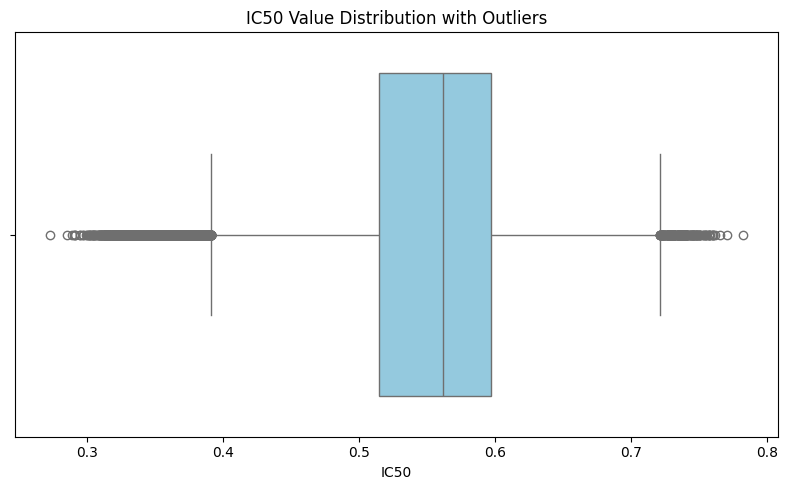

In [ ]:
# Wrap arrays into a temporary DataFrame for inspection
df_check = pd.DataFrame({
    'IC50': pd.Series(ic50_values_array_X.flatten())
})

# --- Detect Outliers in IC50 only (since it's numerical and critical) ---
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

ic50_series = df_check['IC50'].dropna()
ic50_outliers = detect_outliers_iqr(ic50_series)

if not ic50_outliers.empty:
    print(f"\nOutliers detected in IC50 values: {len(ic50_outliers)}")
else:
    print("\nNo significant outliers detected in IC50 values.")

percent_outliers = (len(ic50_outliers) / len(ic50_series)) * 100
print(f"Outliers: {len(ic50_outliers)} / {len(ic50_series)} = {percent_outliers:.2f}%")

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=ic50_series, color='skyblue')
plt.title("IC50 Value Distribution with Outliers")
plt.xlabel("IC50")
plt.tight_layout()
plt.show()

Finding thresholds as drug response sensitivity (relative measure only, not standard) for gradio app

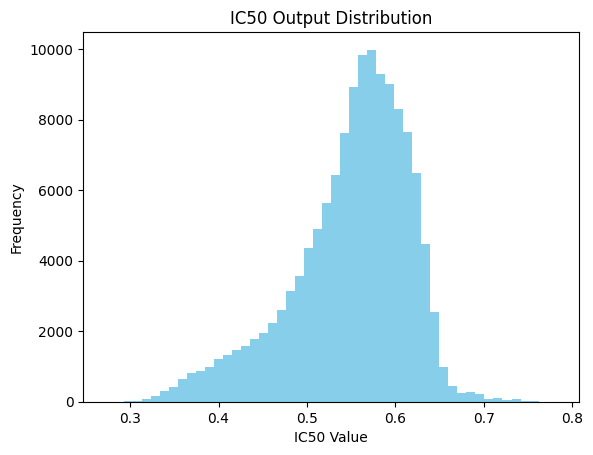

In [ ]:
import matplotlib.pyplot as plt

plt.hist(ic50_series, bins=50, color='skyblue')
plt.title("IC50 Output Distribution")
plt.xlabel("IC50 Value")
plt.ylabel("Frequency")
plt.show()


In [ ]:
low_th = np.percentile(ic50_series, 33)   # ~ bottom third
high_th = np.percentile(ic50_series, 66)  # ~ top third

In [ ]:
low_th

0.5337152625362067

In [ ]:
high_th

0.5839770895465443

Data Splitting (Train, Validation, Test)

In [ ]:
seed = 42

np.random.seed(seed)
np.random.shuffle(drug_smiles_array_X)
np.random.shuffle(cell_features_array_X)
np.random.shuffle(ic50_values_array_X)
np.random.shuffle(drug_names_array)
np.random.shuffle(cell_ids_array)


train_split_size = int(drug_smiles_array_X.shape[0] * 0.8)
val_split_size = int(drug_smiles_array_X.shape[0] * 0.9)

## 80% train, 10% val, 10% test
d_train_X = drug_smiles_array_X[:train_split_size]
d_test_X = drug_smiles_array_X[train_split_size:val_split_size]
d_val_X = drug_smiles_array_X[val_split_size:]

d_train_X = drug_smiles_array_X[:train_split_size]
d_test_X = drug_smiles_array_X[train_split_size:val_split_size]
d_val_X = drug_smiles_array_X[val_split_size:]

c_train_X = cell_features_array_X[:train_split_size]
c_test_X = cell_features_array_X[train_split_size:val_split_size]
c_val_X = cell_features_array_X[val_split_size:]

ic50_train_X = ic50_values_array_X[:train_split_size]
ic50_test_X = ic50_values_array_X[train_split_size:val_split_size]
ic50_val_X = ic50_values_array_X[val_split_size:]

dnm_train_X = drug_names_array[:train_split_size]
dnm_test_X = drug_names_array[train_split_size:val_split_size]
dnm_val_X = drug_names_array[val_split_size:]

cl_train_X = cell_ids_array[:train_split_size]
cl_test_X = cell_ids_array[train_split_size:val_split_size]
cl_val_X = cell_ids_array[val_split_size:]

print("Dataset Split Sizes")
print("-" * 30)

# Drug SMILES
print(f"Drug SMILES -> Train: {d_train_X.shape[0]}, Val: {d_val_X.shape[0]}, Test: {d_test_X.shape[0]}")

# Cell features
print(f"Cell Features -> Train: {c_train_X.shape[0]}, Val: {c_val_X.shape[0]}, Test: {c_test_X.shape[0]}")

# IC50 values
print(f"IC50 Values -> Train: {ic50_train_X.shape[0]}, Val: {ic50_val_X.shape[0]}, Test: {ic50_test_X.shape[0]}")

# Drug names
print(f"Drug Names -> Train: {dnm_train_X.shape[0]}, Val: {dnm_val_X.shape[0]}, Test: {dnm_test_X.shape[0]}")

# Cell line IDs
print(f"Cell Line IDs -> Train: {cl_train_X.shape[0]}, Val: {cl_val_X.shape[0]}, Test: {cl_test_X.shape[0]}")


Dataset Split Sizes
------------------------------
Drug SMILES -> Train: 106569, Val: 13322, Test: 13321
Cell Features -> Train: 106569, Val: 13322, Test: 13321
IC50 Values -> Train: 106569, Val: 13322, Test: 13321
Drug Names -> Train: 106569, Val: 13322, Test: 13321
Cell Line IDs -> Train: 106569, Val: 13322, Test: 13321


Save Processed Data in PyTorch Format

In [ ]:
dataset = 'Data'
print('preparing ', dataset + '_train.pt in pytorch format!')

this_branch = 'root_1'

train_data = DrugGeneDataset(root='root_folder/'+ this_branch, dataset_name=dataset+'_train_set', drug_smiles=d_train_X, cell_profiles=c_train_X, response_values=ic50_train_X, smiles_graph_map=X_smile_graph, drug_ids=dnm_train_X, cell_ids = cl_train_X)
val_data = DrugGeneDataset(root='root_folder/' + this_branch, dataset_name=dataset+'_val_set', drug_smiles=d_val_X, cell_profiles=c_val_X, response_values=ic50_val_X, smiles_graph_map=X_smile_graph, drug_ids=dnm_val_X, cell_ids = cl_val_X)
test_data = DrugGeneDataset(root='root_folder/' + this_branch, dataset_name=dataset+'_test_set', drug_smiles=d_test_X, cell_profiles=c_test_X, response_values=ic50_test_X, smiles_graph_map=X_smile_graph, drug_ids=dnm_test_X, cell_ids = cl_test_X)


preparing  Data_train.pt in pytorch format!
Pre-processed data not found at root_folder/root_1/processed/Data_train_set.pt. Starting pre-processing...
Preprocessing: SMILES to graph: 1/106569


<ipython-input-5-044a14d837cf>:377: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  data_item = DATA.Data(x=torch.Tensor(node_features),


Preprocessing: SMILES to graph: 2001/106569
Preprocessing: SMILES to graph: 4001/106569
Preprocessing: SMILES to graph: 6001/106569
Preprocessing: SMILES to graph: 8001/106569
Preprocessing: SMILES to graph: 10001/106569
Preprocessing: SMILES to graph: 12001/106569
Preprocessing: SMILES to graph: 14001/106569
Preprocessing: SMILES to graph: 16001/106569
Preprocessing: SMILES to graph: 18001/106569
Preprocessing: SMILES to graph: 20001/106569
Preprocessing: SMILES to graph: 22001/106569
Preprocessing: SMILES to graph: 24001/106569
Preprocessing: SMILES to graph: 26001/106569
Preprocessing: SMILES to graph: 28001/106569
Preprocessing: SMILES to graph: 30001/106569
Preprocessing: SMILES to graph: 32001/106569
Preprocessing: SMILES to graph: 34001/106569
Preprocessing: SMILES to graph: 36001/106569
Preprocessing: SMILES to graph: 38001/106569
Preprocessing: SMILES to graph: 40001/106569
Preprocessing: SMILES to graph: 42001/106569
Preprocessing: SMILES to graph: 44001/106569
Preprocessing:

#**Step II: Defining the Deep Learning Model**

### **Overview**
This model is a **Graph Convolutional Network (GCN) with Multi-Head Attention**, designed to integrate **molecular graph features** with **gene expression data** for predicting **drug response in cancer cells**.

### **Model Architecture**
The model consists of three main components:
1. **GCN for Drug Feature Extraction**
2. **CNN for Gene Expression Analysis**
3. **Attention-Based Feature Fusion and Prediction**

### **1. Drug Feature Extraction (Graph Neural Network)**
| Layer | Description | Hyperparameters |
|--------|----------------|----------------|
| `GCNConv` (1) | Extracts molecular graph features | `in_features=334`, `out_features=334` |
| `GCNConv` (2) | Expands learned features | `in_features=334`, `out_features=668` |
| `GCNConv` (3) | Captures high-level features | `in_features=668`, `out_features=1336` |
| `Global Max Pooling` | Aggregates features | - |

### **2. Gene Expression Feature Extraction (1D CNN)**
| Layer | Description | Hyperparameters |
|--------|----------------|----------------|
| `Conv1D` | Extracts spatial gene expression patterns | `in_channels=1`, `out_channels=32`, `kernel_size=8` |
| `MaxPool1D` | Downsamples | `kernel_size=3` |

### **3. Attention-Based Feature Fusion**
| Layer | Description | Hyperparameters |
|--------|----------------|----------------|
| `Multi-Head Attention` (1) | Drug attends to Gene Features | `embed_dim=128`, `num_heads=8` |
| `Multi-Head Attention` (2) | Gene Expression attends to Drug Features | `embed_dim=128`, `num_heads=8` |

### **Baseline Model Hyperparameter Selection**
| Hyperparameter | Value | Rationale |
|--------------|--------|-----------|
| **GCN Layers** | 3 | Hierarchical feature learning |
| **Attention Heads** | 8 | Captures diverse feature interactions |
| **Dropout** | 0.5 | Prevents overfitting |

### **Summary**
This model efficiently integrates **drug and gene expression features** using **GCN, CNN, and Attention Mechanisms**, ensuring **high accuracy** in predicting drug response.


## **Implementation**

In [ ]:
class DrugResponseModel(torch.nn.Module):
    def __init__(self, output_size=1, conv_filters=32, embedding_dim=128, drug_feat_dim=334, output_dim=128, dropout_rate=0.5):  # qwe

        super(DrugResponseModel, self).__init__()

        self.output_size = output_size

        # Graph Convolutional Network layers for drug SMILES representation
        self.gcn_layer1 = GCNConv(drug_feat_dim, drug_feat_dim)
        self.gcn_layer2 = GCNConv(drug_feat_dim, drug_feat_dim*2)
        self.gcn_layer3 = GCNConv(drug_feat_dim*2, drug_feat_dim * 4)

        self.fc_gcn1 = torch.nn.Linear(drug_feat_dim*4, 1024)
        self.fc_gcn2 = torch.nn.Linear(1024, output_dim)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)

        # 1D CNN layers for cell line feature extraction
        self.cell_conv1 = nn.Conv1d(
            in_channels=1, out_channels=conv_filters, kernel_size=8)
        self.cell_pool1 = nn.MaxPool1d(3)

        self.cell_conv2 = nn.Conv1d(
            in_channels=conv_filters, out_channels=conv_filters*2, kernel_size=8)
        self.cell_pool2 = nn.MaxPool1d(3)

        self.cell_conv3 = nn.Conv1d(
            in_channels=conv_filters*2, out_channels=conv_filters*4, kernel_size=8)
        self.cell_pool3 = nn.MaxPool1d(3)

        self.fc_cell = nn.Linear(4096, output_dim)

        # Cross-attention layers to fuse drug and cell features
        self.cross_attention1 = nn.MultiheadAttention(output_dim, num_heads=8, dropout=dropout_rate)
        self.cross_attention2 = nn.MultiheadAttention(output_dim, num_heads=8, dropout=dropout_rate)

        self.norm_attn1 = nn.LayerNorm(output_dim)
        self.norm_attn2 = nn.LayerNorm(output_dim)

        # Fully connected layers for final prediction
        self.fc_combined = nn.Linear(2*output_dim, 128)
        self.output_layer = nn.Linear(128, self.output_size)

    def forward(self, x, edge_idx, batch, cell_x, edge_weight=None):

        # GCN branch for drug input
        x = self.gcn_layer1(x, edge_idx, edge_weight)
        x = self.relu(x)

        x = self.gcn_layer2(x, edge_idx, edge_weight)
        x = self.relu(x)

        x = self.gcn_layer3(x, edge_idx, edge_weight)
        x = self.relu(x)

        # Global Max Pooling across graph nodes
        x = gmp(x, batch)

        # Fully connected layers for drug features
        x = self.relu(self.fc_gcn1(x))
        x = self.dropout(x)
        x = self.fc_gcn2(x)
        x = self.dropout(x)


        # 1D CNN branch for cell line features
        cell_feat = self.cell_conv1(cell_x)
        cell_feat = F.relu(cell_feat)
        cell_feat = self.cell_pool1(cell_feat)

        cell_feat = self.cell_conv2(cell_feat)
        cell_feat = F.relu(cell_feat)
        cell_feat = self.cell_pool2(cell_feat)

        cell_feat = self.cell_conv3(cell_feat)
        cell_feat = F.relu(cell_feat)
        cell_feat = self.cell_pool3(cell_feat)

        # Flatten and apply fully connected layer
        xt = cell_feat.view(-1, cell_feat.shape[1] * cell_feat.shape[2])
        xt = self.fc_cell(xt)

        # Cross-attention mechanism
        attn_out1, _ = self.cross_attention1(x, xt, xt)
        attn_out1 = attn_out1 + x
        attn_out1 = self.norm_attn1(attn_out1)

        attn_out2, _ = self.cross_attention2(xt, x, x)
        attn_out2 = attn_out2 + xt
        attn_out2 = self.norm_attn2(attn_out2)

        # Concatenate and classify
        combined = torch.cat((attn_out1, attn_out2), 1)
        combined = self.relu(combined)
        combined = self.dropout(combined)

        combined = self.fc_combined(combined)
        combined = self.relu(combined)
        combined = self.dropout(combined)

        output = self.output_layer(combined)
        output = nn.Sigmoid()(output)

        return output

### **Another Model**
This is an enhanced version of the baseline model, named **DrugResponseModel_v2**, designed to improve **generalization** and **stability** during drug response prediction. It integrates **Graph Neural Networks (GCN)** for drug data, **1D CNN with BatchNorm** for cell line features, and **refined cross-attention layers** for feature fusion.

---

### **Model Architecture**
The architecture is modular and consists of:
1. **Drug Feature Encoder** (GCNs)
2. **Cell Line Encoder** (1D CNNs with BatchNorm)
3. **Cross-Attention for Fusion**
4. **Fully Connected Layers for Prediction**

---

### **1. Drug Feature Extraction (Graph Neural Network)**
| Layer        | Description                 | Hyperparameters                     |
|--------------|-----------------------------|-------------------------------------|
| `GCNConv (1)`| Initial drug representation | `in=334 → out=334`                  |
| `GCNConv (2)`| Feature expansion           | `334 → 668`                         |
| `GCNConv (3)`| High-level features         | `668 → 1336`                        |
| `Linear (1)` | Fully connected             | `1336 → 1024`                       |
| `Linear (2)` | Final drug embedding        | `1024 → 128`                        |
| `Dropout`    | Regularization              | `rate=0.3`                          |
| `ReLU`       | Activation                  | -                                   |
| `GMP`        | Global Max Pooling          | -                                   |

---

### **2. Gene Expression Feature Extraction (1D CNN + BatchNorm)**
| Layer        | Description                     | Hyperparameters                        |
|--------------|----------------------------------|----------------------------------------|
| `Conv1D (1)` | Initial spatial feature capture | `in=1 → out=32`, `kernel_size=7`       |
| `BatchNorm1D`| Normalization                   | `features=32`                          |
| `MaxPool1D`  | Downsampling                    | `kernel_size=2`                        |
| `Conv1D (2)` | Feature refinement              | `32 → 64`, `kernel_size=5`             |
| `BatchNorm1D`| Normalization                   | `features=64`                          |
| `MaxPool1D`  | Downsampling                    | `kernel_size=2`                        |
| `Conv1D (3)` | High-level feature extraction   | `64 → 128`, `kernel_size=3`            |
| `AdaptiveMaxPool1D`| Global feature summarization | `output_size=1`                   |
| `Linear`     | Final embedding                 | `128 → 128`                            |

---

### **3. Cross-Attention Fusion**
| Layer               | Description                         | Hyperparameters       |
|---------------------|-------------------------------------|------------------------|
| `MultiheadAttention (1)` | Drug attends to Gene Features   | `embed_dim=128`, `num_heads=4` |
| `MultiheadAttention (2)` | Gene Features attend to Drug    | `embed_dim=128`, `num_heads=4` |
| `LayerNorm`         | Stabilization after attention       | `norm_shape=128`       |

---

### **4. Final Classification Head**
| Layer         | Description             | Hyperparameters |
|---------------|-------------------------|-----------------|
| `Linear`      | Merged embedding → 128  | `in=256 → out=128` |
| `ReLU + Dropout` | Non-linear transformation | `dropout=0.3`   |
| `Linear`      | Output Layer            | `128 → 1`       |
| `Sigmoid`     | Final activation        | -               |

---

### **Improved Hyperparameters (Compared to Baseline)**
| Parameter         | Value (v2) | Improvement                             |
|------------------|------------|------------------------------------------|
| Dropout Rate     | 0.3        | Slightly reduced for better balance      |
| Attention Heads  | 4          | Fewer heads = less overfitting           |
| CNN Layers       | 3          | With BatchNorm for stabilized learning   |
| Pooling Strategy | Adaptive   | Better generalization across feature maps|

---

### **Summary**
**DrugResponseModel_v2** addresses overfitting by:
- Integrating **Batch Normalization** in CNN layers.
- Using **lighter attention heads** (4 instead of 8).
- Adding **adaptive pooling** for flexibility across gene features.




## **Implementation**

In [ ]:
class DrugResponseModel_v2(nn.Module):
    def __init__(self, output_size=1, conv_filters=32, embedding_dim=128, drug_feat_dim=334, output_dim=128, dropout_rate=0.3):
        super(DrugResponseModel_v2, self).__init__()

        self.output_size = output_size

        # GCN layers
        self.gcn_layer1 = GCNConv(drug_feat_dim, drug_feat_dim)
        self.gcn_layer2 = GCNConv(drug_feat_dim, drug_feat_dim * 2)
        self.gcn_layer3 = GCNConv(drug_feat_dim * 2, drug_feat_dim * 4)

        self.fc_gcn1 = nn.Linear(drug_feat_dim * 4, 1024)
        self.fc_gcn2 = nn.Linear(1024, output_dim)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)

        # CNN + BatchNorm for cell features
        self.cell_conv1 = nn.Conv1d(1, conv_filters, kernel_size=7)
        self.cell_bn1 = nn.BatchNorm1d(conv_filters)
        self.cell_pool1 = nn.MaxPool1d(2)

        self.cell_conv2 = nn.Conv1d(conv_filters, conv_filters * 2, kernel_size=5)
        self.cell_bn2 = nn.BatchNorm1d(conv_filters * 2)
        self.cell_pool2 = nn.MaxPool1d(2)

        self.cell_conv3 = nn.Conv1d(conv_filters * 2, conv_filters * 4, kernel_size=3)
        self.cell_bn3 = nn.BatchNorm1d(conv_filters * 4)
        self.cell_pool3 = nn.AdaptiveMaxPool1d(1)

        self.fc_cell = nn.Linear(conv_filters * 4, output_dim)

        # Cross-attention with smaller heads
        self.cross_attention1 = nn.MultiheadAttention(output_dim, num_heads=4, dropout=dropout_rate, batch_first=True)
        self.cross_attention2 = nn.MultiheadAttention(output_dim, num_heads=4, dropout=dropout_rate, batch_first=True)

        self.norm_attn1 = nn.LayerNorm(output_dim)
        self.norm_attn2 = nn.LayerNorm(output_dim)

        self.fc_combined = nn.Linear(2 * output_dim, 128)
        self.output_layer = nn.Linear(128, self.output_size)

    def forward(self, x, edge_idx, batch, cell_x, edge_weight=None):
        # GCN branch
        x = self.relu(self.gcn_layer1(x, edge_idx, edge_weight))
        x = self.relu(self.gcn_layer2(x, edge_idx, edge_weight))
        x = self.relu(self.gcn_layer3(x, edge_idx, edge_weight))

        x = gmp(x, batch)
        x = self.relu(self.fc_gcn1(x))
        x = self.dropout(x)
        x = self.fc_gcn2(x)
        x = self.dropout(x)
        x = x.unsqueeze(1)  # For attention

        # CNN branch
        cell_feat = self.cell_pool1(self.cell_bn1(self.relu(self.cell_conv1(cell_x))))
        cell_feat = self.cell_pool2(self.cell_bn2(self.relu(self.cell_conv2(cell_feat))))
        cell_feat = self.cell_pool3(self.cell_bn3(self.relu(self.cell_conv3(cell_feat))))
        xt = cell_feat.view(cell_feat.size(0), -1)
        xt = self.fc_cell(xt)
        xt = xt.unsqueeze(1)  # For attention

        # Cross-attention
        attn_out1, _ = self.cross_attention1(x, xt, xt)
        attn_out1 = self.norm_attn1(attn_out1 + x)

        attn_out2, _ = self.cross_attention2(xt, x, x)
        attn_out2 = self.norm_attn2(attn_out2 + xt)

        combined = torch.cat((attn_out1.squeeze(1), attn_out2.squeeze(1)), dim=1)
        combined = self.relu(combined)
        combined = self.dropout(combined)
        combined = self.relu(self.fc_combined(combined))
        combined = self.dropout(combined)

        output = torch.sigmoid(self.output_layer(combined))
        return output


# **Step III: Training and Fine-Tuning the Model**

## **Model Training & Fine-Tuning**

### **Overview**
The training phase was carefully designed to optimise drug response prediction using IC50 values. Multiple configurations were systematically explored, including variations in optimizers, learning rates, and loss functions. The objective was to maximize predictive accuracy while ensuring model stability and generalization.

---
### **Training Pipeline Design**

The training pipeline was implemented with modularity and flexibility in mind, allowing different combinations of loss functions, optimizers, and learning rates to be tested efficiently.

-  Custom training loop allowed dynamic injection of optimizers and loss functions.
-  Early stopping was used to prevent overfitting based on validation loss.
-  Model checkpoints were saved for each run.
-  Loss curves and performance metrics were logged for comparison.
- Training was divided into 2 main parts
      i. Baseline Model Training (DrugResponseModel and DrugResponseModel_v2)
      ii. Fine-tuning to get the best Hyperparameters

#### **Training Logs Captured**
- Epoch-wise training and validation loss
- Pearson and Spearman correlation coefficients
- R² score and RMSE
- Output visualizations: `loss.png`, `pearson.png`
- Result files: CSV summaries named using the format `optimizer_loss_lr_runID_dataset.csv`

---

### **Evaluation Metrics Tracked**

| Metric       | Purpose |
|--------------|---------|
| **MSE**      | Measures squared error between predicted and actual IC50 values |
| **RMSE**     | Square root of MSE; provides scale-interpretable error |
| **Pearson**  | Measures linear correlation between predictions and targets |
| **Spearman** | Measures monotonic relationship between rankings |
| **R² Score** | Explains variance captured by the model's predictions |

---




### **Hyperparameter Tuning Strategy**

The model chosen for hyperparameter tuning was `DrugResponseModel` due to its slightly better performance in terms of lower MSE for validation data.

#### **Optimizers Explored**

| Optimizer | Description |
|-----------|-------------|
| **Adam** | Adaptive optimizer combining momentum and RMSProp. Works well for most tasks, especially deep learning. |
| **RMSprop** | Maintains a moving average of squared gradients. Suitable for noisy or non-stationary data (e.g., sequence tasks). |
| **SGD** | Stochastic Gradient Descent with optional momentum. Simple and stable, but may converge slowly without tuning. |

#### **Learning Rates Tested**
- `1e-3`
- `5e-4`

#### **Batch Sizes**
- Tuned manually (batch size= 32) and kept constant across most experiments for consistency.

#### **Loss Functions Compared**
- `MSELoss` — standard baseline for regression.Penalizes large errors more.Best for clean, low-noise regression tasks
- `HuberLoss` — robust to outliers, Quadratic for small errors, linear for large ones. Tunable with `delta` to adjust sensitivity (delta=0.5)


Each combination of optimizer, loss function, and learning rate was logged, tracked, and evaluated consistently across all runs.

---



### **Results Logging & Selection**

Each hyperparameter tuning run was tracked meticulously. For every configuration tested (optimizer + loss function + learning rate), the following actions were taken:

- Results were logged in CSV files with clear naming conventions
- Training and validation metrics were plotted and saved
- Best performing run was selected based on **lowest validation MSE** and **highest Pearson correlation**

---

### **Summary of Tuning Results**


Below is a ranked summary of the top-performing configurations based on **validation MSE**:

| Rank | Run ID | Optimizer | Loss Function | Learning Rate | MSE (Val)        | Pearson Corr. | Spearman Corr. |
|------|--------|-----------|----------------|----------------|------------------|----------------|----------------|
| 1    | 4      | Adam      | HuberLoss       | 0.0005         | 4.5144720000e-03 | -              | -              |
| 2    | 7      | RMSprop   | HuberLoss       | 0.001          | 4.5144730000e-03 | -              | -              |
| 3    | 12     | SGD       | HuberLoss       | 0.0005         | 4.5144740000e-03 | -              | -              |
| 4    | 9      | SGD       | MSELoss         | 0.001          | 4.5144754000e-03 | -              | -              |
| 5    | 6      | RMSprop   | MSELoss         | 0.0005         | 4.5144800000e-03 | -              | -              |
| 6    | 8      | RMSprop   | HuberLoss       | 0.0005         | 4.5144805000e-03 | -              | -              |
| 7    | 2      | Adam      | MSELoss         | 0.0005         | 4.5144884000e-03 | -              | -              |
| 8    | 0      | baseline  | MSELoss               | 0.0001              | 4.5145070000e-03 | **0.008469**   | **0.012926**   |
| 9    | 5      | RMSprop   | MSELoss         | 0.001          | 4.5145284000e-03 | -              | -              |
|10    | 3      | Adam      | HuberLoss       | 0.001          | 4.5145430000e-03 | -              | -              |
|11    | 10     | SGD       | MSELoss         | 0.0005         | 4.5145475000e-03 | -              | -              |
|12    | 1      | Adam      | MSELoss         | 0.001          | 4.5145840000e-03 | 0.006861       | 0.009638       |
|13    | 11     | SGD       | HuberLoss       | 0.001          | 4.5146140000e-03 | -              | -              |

**Best Configuration:** `Run 4 - Adam + HuberLoss (lr=0.0005)` with **MSE = 4.5144720000e-03**

> ⚠️ **Note:** Pearson and Spearman values are marked as `-` when they result in `NaN`.  
> This occurs due to **extremely low variance in IC50 values**, where the **standard deviation is nearly zero**, making correlation metrics undefined.

>
>  **What are IC50 values?**
>
> IC50 (half maximal inhibitory concentration) represents the concentration of a drug required to inhibit a biological process by 50%. In datasets like **GDSC**, **CCLE**, or **NCI60**, IC50 values are typically:
>
> - **Log-transformed** (e.g., log(IC50) or -log10(IC50))
> - **Normalized** (e.g., scaled between 0 and 1)
>
> These preprocessing steps often compress the range of IC50 values, resulting in **low variance**.
>
>
>
> **Implications of Low IC50 Variance**
>
> - **R² score** becomes **unstable** or misleading
> - **Pearson/Spearman** may return **NaN**
> - Even **small prediction errors** appear large relative to variance
>
>
>
>  **Recommended Metrics**
>
> | Metric        | Recommendation                  | Reason                                 |
> |---------------|----------------------------------|----------------------------------------|
> | **MSE / RMSE**| ✅ Use as primary metric         | Stable, differentiable, and interpretable |
> | **Pearson / Spearman** | Use for additional insight | Indicates ranking and monotonicity trends |
> | **R² Score**  | ❌ Avoid for low-variance targets | Can return large negative values, not informative |


## **Implementation**

Training - Baseline Model

In [ ]:
#Setting Folder information

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

save_name = 'baseline'
branch = 'root_1'
branch_folder = "root_folder/" + branch
result_folder = branch_folder + "/results/"
model_folder = branch_folder + '/models/'
os.makedirs(result_folder, exist_ok=True)
os.makedirs(model_folder, exist_ok=True)

In [ ]:
#Setting Parameters for baseline training


modeling = DrugResponseModel
train_batch = 32
val_batch = 32
test_batch = 32

lr = 1e-4 # 1e-4 baseline
num_epoch = 30
log_interval = 20
cuda_name = 'cuda'


d_feat_size = train_data[0].x.shape[1]
print(f"Detected input feature size: {d_feat_size}")


Detected input feature size: 78


In [ ]:
def print_initial_info(lr, num_epoch, modeling, dataset='Data'):
    print('Learning rate:', lr)
    print('Epochs:', num_epoch)
    print('\nrunning on', f"{modeling.__name__}_{dataset}")


def prepare_data_files(br_fol, dataset):
    processed_files = {
        "train": f"{br_fol}/processed/{dataset}_train_set.pt",
        "val": f"{br_fol}/processed/{dataset}_val_set.pt"
    }
    for file in processed_files.values():
        if not os.path.isfile(file):
            print('Please run create_data.py to prepare data in PyTorch format!')
            return None
    return processed_files


def load_datasets(br_fol, dataset):
    return {
        "train": DrugGeneDataset(root=br_fol, dataset_name=f"{dataset}_train_set"),
        "val": DrugGeneDataset(root=br_fol, dataset_name=f"{dataset}_val_set"),
    }


def get_data_loaders(datasets, batch_sizes):
    return {
        "train": DataLoader(datasets["train"], batch_size=batch_sizes["train"], shuffle=True),
        "val": DataLoader(datasets["val"], batch_size=batch_sizes["val"], shuffle=False),
    }


def train_and_evaluate_model(
        modeling, data_loaders, device, num_epoch, optimizer_params, log_interval,
        model_folder, result_folder, save_name, do_save, dataset="Data"
):
    """
    Orchestrates model training, evaluation, logging, and saving.

    Args:
        modeling: Model class to instantiate.
        data_loaders: Dictionary of train/val/test DataLoaders.
        device: 'cuda' or 'cpu'.
        num_epoch: Number of training epochs.
        optimizer_params: Dict of optimizer hyperparameters (e.g., lr).
        log_interval: Interval for logging (unused).
        model_folder: Folder to save model weights.
        result_folder: Folder to save results.
        save_name: Name prefix for saved files.
        do_save: Bool flag whether to save model/results.
        dataset: Dataset name

    Returns:
        None
    """
    model = modeling(drug_feat_dim=d_feat_size).to(device)
    optimizer = torch.optim.Adam(model.parameters(), **optimizer_params)
    best_mse, best_pearson, best_epoch = float('inf'), float('-inf'), -1
    train_losses, val_losses, val_pearsons = [], [], []
    total_time = 0
    early_stopping_patience = 5  # Number of epochs with no improvement after which training will stop
    no_improve_epochs = 0  # Counter for early stopping


    for epoch in range(num_epoch):
        start_time = time.time()
        print(f"Epoch: {epoch + 1}/{num_epoch}")

        # NVIDIA SMI monitoring
        nvidia_smi.nvmlInit()
        device_count = nvidia_smi.nvmlDeviceGetCount()
        for i in range(device_count):
            handle = nvidia_smi.nvmlDeviceGetHandleByIndex(i)
            info = nvidia_smi.nvmlDeviceGetMemoryInfo(handle)
            # Optionally: print available GPU memory
        nvidia_smi.nvmlShutdown()

        # Training and evaluation
        train_loss = train(model, device, data_loaders["train"], optimizer, epoch + 1, log_interval)
        val_metrics = predicting_and_evaluate(model, device, data_loaders["val"])

        # Record performance
        train_losses.append(train_loss)
        val_losses.append(val_metrics["mse"])
        val_pearsons.append(val_metrics["pearson"])

        # Update best model
        if val_metrics["mse"] < best_mse:
            if do_save:
                save_model_and_results(model, model_folder, result_folder, save_name, dataset, val_metrics)
            best_epoch, best_mse, best_pearson = epoch + 1, val_metrics["mse"], val_metrics["pearson"]
            no_improve_epochs = 0  # Reset the counter if improvement
            print(f"Improved: Epoch {best_epoch}, Best MSE: {best_mse}")
        else:
            no_improve_epochs += 1  # Increment the counter if no improvement
            if no_improve_epochs >= early_stopping_patience:
                print(f"Early stopping triggered. No improvement in {early_stopping_patience} epochs.")
                break
            print(f"No improvement: Best Epoch {best_epoch}, Best MSE: {best_mse}")

        # Time estimates
        total_time += time.time() - start_time
        est_remaining_time = (num_epoch - epoch - 1) * total_time / (epoch + 1)
        print_time_estimate(epoch + 1, est_remaining_time)

    # Visualization
    plot_training_and_test_loss(train_losses, val_losses, f"Loss_plot_{save_name}")


def train(model, device, train_loader, optimizer, epoch, log_interval):
    """
    Trains the model for one epoch using the training DataLoader.

    Args:
        model: The neural network model.
        device: 'cuda' or 'cpu'.
        train_loader: DataLoader for training data.
        optimizer: Optimizer instance (Adam, RMSProp, etc.).
        epoch: Current epoch number (for logging).
        log_interval: Frequency of logging (not used currently).

    Returns:
        Average training loss for the epoch.
    """
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    #loss_fn = nn.HuberLoss(delta=0.5) #done for getting best model

    avg_loss = []
    for data in tqdm(train_loader):
        data = data.to(device)
        optimizer.zero_grad()


        x, x_cell, edge_idx, batch_drug, edge_feat = data.x, data.target, data.edge_index.long(), data.batch, data.edge_features

        output = model(x, edge_idx, batch_drug, x_cell, edge_feat)

        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())

    return sum(avg_loss)/len(avg_loss)


def predicting_and_evaluate(model, device, data_loader):
    """
    Performs prediction on a dataset and computes evaluation metrics.

    Args:
        model: Trained model.
        device: 'cuda' or 'cpu'.
        data_loader: DataLoader for validation or test.

    Returns:
        Dictionary containing rmse, mse, pearson, spearman and r2 scores.
    """
    predictions, ground_truth = predict(model, device, data_loader)
    return {
        "rmse": compute_rmse(ground_truth, predictions),
        "mse": compute_mse(ground_truth, predictions),
        "pearson": compute_pearson_correlation(ground_truth, predictions),
        "spearman": compute_spearman_correlation(ground_truth, predictions)
    }

def predict(model, device, loader):
    """
    Performs inference using the trained model on the given DataLoader.

    Args:
        model: Trained PyTorch model.
        device: 'cuda' or 'cpu'.
        loader: DataLoader for validation or test data.

    Returns:
        Tuple of (ground truth labels, predicted values) as flattened NumPy arrays.
    """
    model.eval()
    total_predictions = torch.Tensor()
    total_labels = torch.Tensor()
    print(f" Making predictions for {len(loader.dataset)} samples...")

    with torch.no_grad():
        for data in loader:
            data = data.to(device)

            x, x_cell, edge_idx, batch_drug, edge_feat = data.x, data.target, data.edge_index.long(), data.batch, data.edge_features

            output = model(x, edge_idx, batch_drug, x_cell, edge_feat)

            total_predictions = torch.cat((total_predictions, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    torch.cuda.empty_cache()

    return total_labels.numpy().flatten(), total_predictions.numpy().flatten()



def compute_rmse(y_true, y_pred):
    """Compute Root Mean Squared Error."""
    return sqrt(((y_true - y_pred)**2).mean(axis=0))


def compute_mse(y_true, y_pred):
    """Compute Mean Squared Error."""
    return ((y_true - y_pred)**2).mean(axis=0)


def compute_pearson_correlation(y_true, y_pred):
    """Compute Pearson correlation coefficient."""
    return np.corrcoef(y_true, y_pred)[0, 1]


def compute_spearman_correlation(y_true, y_pred):
    """Compute Spearman rank correlation coefficient."""
    return stats.spearmanr(y_true, y_pred)[0]


def compute_r2_score(y_true, y_pred):
    """Compute coefficient of determination (R² score)."""
    return r2_score(y_true, y_pred)


def plot_training_and_test_loss(train_losses, test_losses, title):
    """Plot training and test loss curves across epochs."""
    plt.figure()
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{title}.png", dpi=300)



def print_time_estimate(epoch, remaining_time):
    hours, minutes, seconds = int(remaining_time // 3600), int((remaining_time // 60) % 60), int(remaining_time % 60)
    print(f"End of Epoch {epoch}; {hours} hours, {minutes} minutes, and {seconds} seconds remaining")


def save_model_and_results(model, model_folder, result_folder, save_name, dataset, val_metrics):
    model_file_name = f"model_{save_name}_{dataset}.model"
    result_file_name = f"result_{save_name}_{dataset}.csv"
    torch.save(model.state_dict(), f"{model_folder}/{model_file_name}")
    with open(f"{result_folder}/val_{result_file_name}", 'w') as f:
        f.write(','.join(map(str, val_metrics.values())))

In [ ]:
def baseline_training(
        modeling, train_batch, val_batch, lr, num_epoch, log_interval,
        cuda_name, branch_dir, result_folder, model_folder, save_name, do_save=True
):
    print_initial_info(lr, num_epoch, modeling)
    device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")

    # Prepare and load data
    processed_files = prepare_data_files(branch_dir, dataset="Data")
    if not processed_files:
        return

    datasets = load_datasets(branch_dir, dataset="Data")
    batch_sizes = {"train": train_batch, "val": val_batch}
    data_loaders = get_data_loaders(datasets, batch_sizes)

    # Train and evaluate model
    train_and_evaluate_model(
        modeling=modeling, data_loaders=data_loaders, device=device, num_epoch=num_epoch,
        optimizer_params={"lr": lr}, log_interval=log_interval,
        model_folder=model_folder, result_folder=result_folder,
        save_name=save_name, do_save=do_save
    )


branch_folder = root_folder/root_1
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...


/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 1/30
Training on 106569 samples...


  0%|          | 0/3331 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 3331/3331 [01:06<00:00, 50.06it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 0.004531754646450281
End of Epoch 1; 0 hours, 35 minutes, and 28 seconds remaining
Epoch: 2/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:51<00:00, 65.18it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 0.004525390453636646
End of Epoch 2; 0 hours, 29 minutes, and 53 seconds remaining
Epoch: 3/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:51<00:00, 65.27it/s]


 Making predictions for 13322 samples...
Improved: Epoch 3, Best MSE: 0.004516948480159044
End of Epoch 3; 0 hours, 27 minutes, and 24 seconds remaining
Epoch: 4/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:51<00:00, 65.11it/s]


 Making predictions for 13322 samples...
Improved: Epoch 4, Best MSE: 0.004516636021435261
End of Epoch 4; 0 hours, 25 minutes, and 44 seconds remaining
Epoch: 5/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:51<00:00, 65.16it/s]


 Making predictions for 13322 samples...
Improved: Epoch 5, Best MSE: 0.004514618776738644
End of Epoch 5; 0 hours, 24 minutes, and 21 seconds remaining
Epoch: 6/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:51<00:00, 65.30it/s]


 Making predictions for 13322 samples...
Improved: Epoch 6, Best MSE: 0.00451448280364275
End of Epoch 6; 0 hours, 23 minutes, and 7 seconds remaining
Epoch: 7/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:51<00:00, 65.05it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.00451448280364275
End of Epoch 7; 0 hours, 22 minutes, and 0 seconds remaining
Epoch: 8/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:51<00:00, 64.85it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.00451448280364275
End of Epoch 8; 0 hours, 20 minutes, and 56 seconds remaining
Epoch: 9/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:51<00:00, 64.88it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.00451448280364275
End of Epoch 9; 0 hours, 19 minutes, and 54 seconds remaining
Epoch: 10/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:51<00:00, 65.09it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.00451448280364275
End of Epoch 10; 0 hours, 18 minutes, and 53 seconds remaining
Epoch: 11/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:51<00:00, 65.09it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.


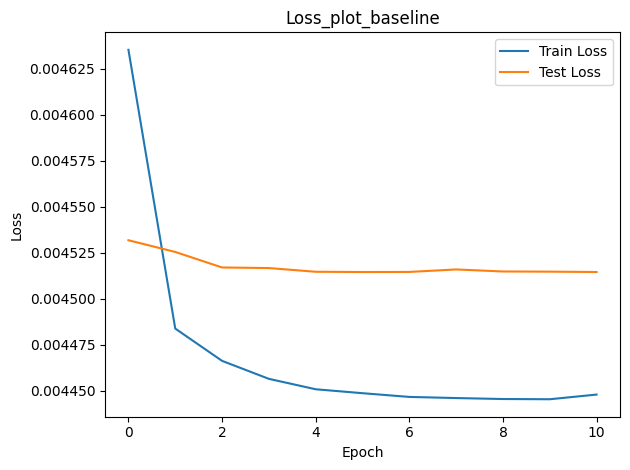

In [ ]:
print(f"branch_folder = {branch_folder}")
baseline_training(modeling, train_batch, val_batch, lr, num_epoch, log_interval, cuda_name,
        branch_dir=branch_folder, result_folder=result_folder, model_folder=model_folder,
        save_name=save_name,do_save=True)

branch_folder = root_folder/root_1
Learning rate: 0.0001
Epochs: 30

running on DrugResponseModel_v2_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...


/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 1/30
Training on 106569 samples...


  0%|          | 0/3331 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 3331/3331 [01:13<00:00, 45.05it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 0.0045830197632312775
End of Epoch 1; 0 hours, 38 minutes, and 21 seconds remaining
Epoch: 2/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 60.42it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 0.004524508025497198
End of Epoch 2; 0 hours, 32 minutes, and 15 seconds remaining
Epoch: 3/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 60.39it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 0.004524508025497198
End of Epoch 3; 0 hours, 29 minutes, and 34 seconds remaining
Epoch: 4/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 59.48it/s]


 Making predictions for 13322 samples...
Improved: Epoch 4, Best MSE: 0.004519639071077108
End of Epoch 4; 0 hours, 27 minutes, and 50 seconds remaining
Epoch: 5/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 60.06it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 0.004519639071077108
End of Epoch 5; 0 hours, 26 minutes, and 21 seconds remaining
Epoch: 6/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 59.99it/s]


 Making predictions for 13322 samples...
Improved: Epoch 6, Best MSE: 0.004519341979175806
End of Epoch 6; 0 hours, 25 minutes, and 2 seconds remaining
Epoch: 7/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:56<00:00, 58.98it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004519341979175806
End of Epoch 7; 0 hours, 23 minutes, and 52 seconds remaining
Epoch: 8/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:57<00:00, 58.39it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004519341979175806
End of Epoch 8; 0 hours, 22 minutes, and 46 seconds remaining
Epoch: 9/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:57<00:00, 57.92it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004519341979175806
End of Epoch 9; 0 hours, 21 minutes, and 42 seconds remaining
Epoch: 10/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:56<00:00, 59.13it/s]


 Making predictions for 13322 samples...
Improved: Epoch 10, Best MSE: 0.004518924281001091
End of Epoch 10; 0 hours, 20 minutes, and 36 seconds remaining
Epoch: 11/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 59.96it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 10, Best MSE: 0.004518924281001091
End of Epoch 11; 0 hours, 19 minutes, and 30 seconds remaining
Epoch: 12/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 59.68it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 10, Best MSE: 0.004518924281001091
End of Epoch 12; 0 hours, 18 minutes, and 25 seconds remaining
Epoch: 13/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 60.47it/s]


 Making predictions for 13322 samples...
Improved: Epoch 13, Best MSE: 0.004518685396760702
End of Epoch 13; 0 hours, 17 minutes, and 20 seconds remaining
Epoch: 14/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 60.52it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 13, Best MSE: 0.004518685396760702
End of Epoch 14; 0 hours, 16 minutes, and 16 seconds remaining
Epoch: 15/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 60.56it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 13, Best MSE: 0.004518685396760702
End of Epoch 15; 0 hours, 15 minutes, and 13 seconds remaining
Epoch: 16/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 60.55it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 13, Best MSE: 0.004518685396760702
End of Epoch 16; 0 hours, 14 minutes, and 10 seconds remaining
Epoch: 17/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 60.51it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 13, Best MSE: 0.004518685396760702
End of Epoch 17; 0 hours, 13 minutes, and 8 seconds remaining
Epoch: 18/30
Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 60.07it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.


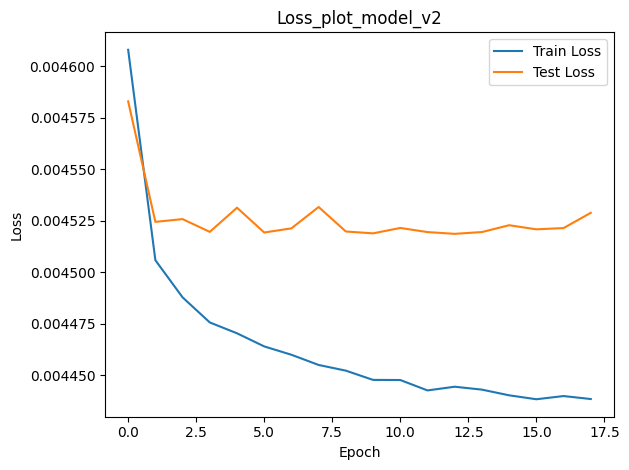

In [ ]:
# Training 2nd model (DrugResponseModel_v2)

save_name = 'model_v2'

modeling = DrugResponseModel_v2

print(f"branch_folder = {branch_folder}")
baseline_training(modeling, train_batch, val_batch, lr, num_epoch, log_interval, cuda_name,
        branch_dir=branch_folder, result_folder=result_folder, model_folder=model_folder,
        save_name=save_name,do_save=True)

Fine-Tuning Model: To find the best hyperparameter configurations

In [ ]:
#Choosing baseline model for further finetuning over v2 model due to better validation performance (MSE value lower)

modeling = DrugResponseModel


===== Run 1: Adam + MSELoss + lr=0.001 =====
Learning rate: 0.001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:11<00:00, 46.28it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 0.004515013657510281
End of Epoch 1; 0 hours, 38 minutes, and 18 seconds remaining
Epoch: 2/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 61.28it/s]


 Making predictions for 13322 samples...


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-20-3016a7997840>:216: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return stats.spearmanr(y_true, y_pred)[0]


No improvement: Best Epoch 1, Best MSE: 0.004515013657510281
End of Epoch 2; 0 hours, 32 minutes, and 3 seconds remaining
Epoch: 3/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 61.08it/s]


 Making predictions for 13322 samples...
Improved: Epoch 3, Best MSE: 0.0045145838521420956
End of Epoch 3; 0 hours, 29 minutes, and 20 seconds remaining
Epoch: 4/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 61.05it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.0045145838521420956
End of Epoch 4; 0 hours, 27 minutes, and 31 seconds remaining
Epoch: 5/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 60.42it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.0045145838521420956
End of Epoch 5; 0 hours, 26 minutes, and 4 seconds remaining
Epoch: 6/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 61.83it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.0045145838521420956
End of Epoch 6; 0 hours, 24 minutes, and 42 seconds remaining
Epoch: 7/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.46it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.0045145838521420956
End of Epoch 7; 0 hours, 23 minutes, and 22 seconds remaining
Epoch: 8/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.51it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 2: Adam + MSELoss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:09<00:00, 47.76it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 0.004520503804087639
End of Epoch 1; 0 hours, 36 minutes, and 20 seconds remaining
Epoch: 2/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 62.98it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 0.004515636712312698
End of Epoch 2; 0 hours, 30 minutes, and 44 seconds remaining
Epoch: 3/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.20it/s]


 Making predictions for 13322 samples...
Improved: Epoch 3, Best MSE: 0.0045146518386900425
End of Epoch 3; 0 hours, 28 minutes, and 13 seconds remaining
Epoch: 4/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 62.87it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.0045146518386900425
End of Epoch 4; 0 hours, 26 minutes, and 31 seconds remaining
Epoch: 5/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.02it/s]


 Making predictions for 13322 samples...
Improved: Epoch 5, Best MSE: 0.0045144883915781975
End of Epoch 5; 0 hours, 25 minutes, and 6 seconds remaining
Epoch: 6/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 62.88it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.0045144883915781975
End of Epoch 6; 0 hours, 23 minutes, and 52 seconds remaining
Epoch: 7/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.18it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.0045144883915781975
End of Epoch 7; 0 hours, 22 minutes, and 41 seconds remaining
Epoch: 8/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 62.98it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.0045144883915781975
End of Epoch 8; 0 hours, 21 minutes, and 35 seconds remaining
Epoch: 9/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.50it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.0045144883915781975
End of Epoch 9; 0 hours, 20 minutes, and 29 seconds remaining
Epoch: 10/30
[Adam/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.53it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 3: Adam + HuberLoss + lr=0.001 =====
Learning rate: 0.001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:09<00:00, 48.07it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 0.004515352658927441
End of Epoch 1; 0 hours, 36 minutes, and 55 seconds remaining
Epoch: 2/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.55it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 0.004515352658927441
End of Epoch 2; 0 hours, 31 minutes, and 6 seconds remaining
Epoch: 3/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.63it/s]


 Making predictions for 13322 samples...
Improved: Epoch 3, Best MSE: 0.0045145428739488125
End of Epoch 3; 0 hours, 28 minutes, and 24 seconds remaining
Epoch: 4/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.40it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.0045145428739488125
End of Epoch 4; 0 hours, 26 minutes, and 35 seconds remaining
Epoch: 5/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.71it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.0045145428739488125
End of Epoch 5; 0 hours, 25 minutes, and 7 seconds remaining
Epoch: 6/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 62.95it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.0045145428739488125
End of Epoch 6; 0 hours, 23 minutes, and 52 seconds remaining
Epoch: 7/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 62.92it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.0045145428739488125
End of Epoch 7; 0 hours, 22 minutes, and 42 seconds remaining
Epoch: 8/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.18it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 4: Adam + HuberLoss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:10<00:00, 47.13it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 0.004514613188803196
End of Epoch 1; 0 hours, 36 minutes, and 55 seconds remaining
Epoch: 2/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 61.35it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 0.004514613188803196
End of Epoch 2; 0 hours, 31 minutes, and 21 seconds remaining
Epoch: 3/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.04it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 0.004514613188803196
End of Epoch 3; 0 hours, 28 minutes, and 45 seconds remaining
Epoch: 4/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 61.99it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 0.004514613188803196
End of Epoch 4; 0 hours, 26 minutes, and 59 seconds remaining
Epoch: 5/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 61.40it/s]


 Making predictions for 13322 samples...
Improved: Epoch 5, Best MSE: 0.004514473024755716
End of Epoch 5; 0 hours, 25 minutes, and 36 seconds remaining
Epoch: 6/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 61.79it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.004514473024755716
End of Epoch 6; 0 hours, 24 minutes, and 19 seconds remaining
Epoch: 7/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.06it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.004514473024755716
End of Epoch 7; 0 hours, 23 minutes, and 7 seconds remaining
Epoch: 8/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.17it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.004514473024755716
End of Epoch 8; 0 hours, 21 minutes, and 58 seconds remaining
Epoch: 9/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 60.77it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.004514473024755716
End of Epoch 9; 0 hours, 20 minutes, and 55 seconds remaining
Epoch: 10/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 61.04it/s]


 Making predictions for 13322 samples...
Improved: Epoch 10, Best MSE: 0.004514472093433142
End of Epoch 10; 0 hours, 19 minutes, and 52 seconds remaining
Epoch: 11/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.60it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 10, Best MSE: 0.004514472093433142
End of Epoch 11; 0 hours, 18 minutes, and 48 seconds remaining
Epoch: 12/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 62.85it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 10, Best MSE: 0.004514472093433142
End of Epoch 12; 0 hours, 17 minutes, and 44 seconds remaining
Epoch: 13/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.15it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 10, Best MSE: 0.004514472093433142
End of Epoch 13; 0 hours, 16 minutes, and 43 seconds remaining
Epoch: 14/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.03it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 10, Best MSE: 0.004514472093433142
End of Epoch 14; 0 hours, 15 minutes, and 42 seconds remaining
Epoch: 15/30
[Adam/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 62.93it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 5: RMSprop + MSELoss + lr=0.001 =====
Learning rate: 0.001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:10<00:00, 47.35it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 0.004515748005360365
End of Epoch 1; 0 hours, 36 minutes, and 38 seconds remaining
Epoch: 2/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.72it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 0.004515748005360365
End of Epoch 2; 0 hours, 30 minutes, and 56 seconds remaining
Epoch: 3/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.18it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 0.004515748005360365
End of Epoch 3; 0 hours, 28 minutes, and 21 seconds remaining
Epoch: 4/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.67it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 1, Best MSE: 0.004515748005360365
End of Epoch 4; 0 hours, 26 minutes, and 38 seconds remaining
Epoch: 5/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.34it/s]


 Making predictions for 13322 samples...
Improved: Epoch 5, Best MSE: 0.004514528438448906
End of Epoch 5; 0 hours, 25 minutes, and 11 seconds remaining
Epoch: 6/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 62.88it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.004514528438448906
End of Epoch 6; 0 hours, 23 minutes, and 55 seconds remaining
Epoch: 7/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.29it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.004514528438448906
End of Epoch 7; 0 hours, 22 minutes, and 44 seconds remaining
Epoch: 8/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.35it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.004514528438448906
End of Epoch 8; 0 hours, 21 minutes, and 39 seconds remaining
Epoch: 9/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.95it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 5, Best MSE: 0.004514528438448906
End of Epoch 9; 0 hours, 20 minutes, and 32 seconds remaining
Epoch: 10/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.73it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 6: RMSprop + MSELoss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:08<00:00, 48.56it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 0.004520259331911802
End of Epoch 1; 0 hours, 36 minutes, and 37 seconds remaining
Epoch: 2/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.38it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 0.0045145051553845406
End of Epoch 2; 0 hours, 30 minutes, and 48 seconds remaining
Epoch: 3/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.79it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 0.0045145051553845406
End of Epoch 3; 0 hours, 28 minutes, and 11 seconds remaining
Epoch: 4/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.55it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 0.0045145051553845406
End of Epoch 4; 0 hours, 26 minutes, and 26 seconds remaining
Epoch: 5/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.75it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 0.0045145051553845406
End of Epoch 5; 0 hours, 24 minutes, and 59 seconds remaining
Epoch: 6/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.73it/s]


 Making predictions for 13322 samples...
Improved: Epoch 6, Best MSE: 0.004514480009675026
End of Epoch 6; 0 hours, 23 minutes, and 43 seconds remaining
Epoch: 7/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.53it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004514480009675026
End of Epoch 7; 0 hours, 22 minutes, and 33 seconds remaining
Epoch: 8/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.52it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004514480009675026
End of Epoch 8; 0 hours, 21 minutes, and 27 seconds remaining
Epoch: 9/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.12it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004514480009675026
End of Epoch 9; 0 hours, 20 minutes, and 23 seconds remaining
Epoch: 10/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 60.15it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004514480009675026
End of Epoch 10; 0 hours, 19 minutes, and 27 seconds remaining
Epoch: 11/30
[RMSprop/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 62.88it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 7: RMSprop + HuberLoss + lr=0.001 =====
Learning rate: 0.001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:10<00:00, 47.57it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 0.004526028875261545
End of Epoch 1; 0 hours, 36 minutes, and 32 seconds remaining
Epoch: 2/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.72it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 0.004515026696026325
End of Epoch 2; 0 hours, 30 minutes, and 53 seconds remaining
Epoch: 3/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.34it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 0.004515026696026325
End of Epoch 3; 0 hours, 28 minutes, and 18 seconds remaining
Epoch: 4/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.45it/s]


 Making predictions for 13322 samples...
Improved: Epoch 4, Best MSE: 0.004514473024755716
End of Epoch 4; 0 hours, 26 minutes, and 37 seconds remaining
Epoch: 5/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.36it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 0.004514473024755716
End of Epoch 5; 0 hours, 25 minutes, and 14 seconds remaining
Epoch: 6/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.74it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 0.004514473024755716
End of Epoch 6; 0 hours, 23 minutes, and 58 seconds remaining
Epoch: 7/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.09it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 0.004514473024755716
End of Epoch 7; 0 hours, 22 minutes, and 50 seconds remaining
Epoch: 8/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.75it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 0.004514473024755716
End of Epoch 8; 0 hours, 21 minutes, and 42 seconds remaining
Epoch: 9/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.59it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 8: RMSprop + HuberLoss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:10<00:00, 47.55it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 0.004515205509960651
End of Epoch 1; 0 hours, 36 minutes, and 28 seconds remaining
Epoch: 2/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.44it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 0.0045151845552027225
End of Epoch 2; 0 hours, 30 minutes, and 56 seconds remaining
Epoch: 3/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.28it/s]


 Making predictions for 13322 samples...
Improved: Epoch 3, Best MSE: 0.004514528438448906
End of Epoch 3; 0 hours, 28 minutes, and 20 seconds remaining
Epoch: 4/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.54it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.004514528438448906
End of Epoch 4; 0 hours, 26 minutes, and 37 seconds remaining
Epoch: 5/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.70it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.004514528438448906
End of Epoch 5; 0 hours, 25 minutes, and 13 seconds remaining
Epoch: 6/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.10it/s]


 Making predictions for 13322 samples...
Improved: Epoch 6, Best MSE: 0.004514480475336313
End of Epoch 6; 0 hours, 23 minutes, and 56 seconds remaining
Epoch: 7/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 60.30it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004514480475336313
End of Epoch 7; 0 hours, 22 minutes, and 54 seconds remaining
Epoch: 8/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 60.94it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004514480475336313
End of Epoch 8; 0 hours, 21 minutes, and 50 seconds remaining
Epoch: 9/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 62.95it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004514480475336313
End of Epoch 9; 0 hours, 20 minutes, and 43 seconds remaining
Epoch: 10/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.66it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004514480475336313
End of Epoch 10; 0 hours, 19 minutes, and 39 seconds remaining
Epoch: 11/30
[RMSprop/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.47it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 9: SGD + MSELoss + lr=0.001 =====
Learning rate: 0.001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:10<00:00, 46.96it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 0.004515407606959343
End of Epoch 1; 0 hours, 36 minutes, and 55 seconds remaining
Epoch: 2/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.56it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 0.004514544270932674
End of Epoch 2; 0 hours, 31 minutes, and 7 seconds remaining
Epoch: 3/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 62.91it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 0.004514544270932674
End of Epoch 3; 0 hours, 28 minutes, and 30 seconds remaining
Epoch: 4/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 61.88it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 0.004514544270932674
End of Epoch 4; 0 hours, 26 minutes, and 49 seconds remaining
Epoch: 5/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.35it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 0.004514544270932674
End of Epoch 5; 0 hours, 25 minutes, and 23 seconds remaining
Epoch: 6/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 61.70it/s]


 Making predictions for 13322 samples...
Improved: Epoch 6, Best MSE: 0.004514475353062153
End of Epoch 6; 0 hours, 24 minutes, and 9 seconds remaining
Epoch: 7/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 61.61it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004514475353062153
End of Epoch 7; 0 hours, 23 minutes, and 0 seconds remaining
Epoch: 8/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:55<00:00, 59.94it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004514475353062153
End of Epoch 8; 0 hours, 21 minutes, and 59 seconds remaining
Epoch: 9/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 60.62it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004514475353062153
End of Epoch 9; 0 hours, 20 minutes, and 55 seconds remaining
Epoch: 10/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.47it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 6, Best MSE: 0.004514475353062153
End of Epoch 10; 0 hours, 19 minutes, and 48 seconds remaining
Epoch: 11/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.03it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 10: SGD + MSELoss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:11<00:00, 46.27it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 0.004537258762866259
End of Epoch 1; 0 hours, 37 minutes, and 24 seconds remaining
Epoch: 2/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.40it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 0.004514683503657579
End of Epoch 2; 0 hours, 31 minutes, and 22 seconds remaining
Epoch: 3/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 61.36it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 0.004514683503657579
End of Epoch 3; 0 hours, 28 minutes, and 52 seconds remaining
Epoch: 4/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 61.55it/s]


 Making predictions for 13322 samples...
Improved: Epoch 4, Best MSE: 0.0045145475305616856
End of Epoch 4; 0 hours, 27 minutes, and 7 seconds remaining
Epoch: 5/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.05it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 0.0045145475305616856
End of Epoch 5; 0 hours, 25 minutes, and 38 seconds remaining
Epoch: 6/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:54<00:00, 61.17it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 0.0045145475305616856
End of Epoch 6; 0 hours, 24 minutes, and 23 seconds remaining
Epoch: 7/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.23it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 0.0045145475305616856
End of Epoch 7; 0 hours, 23 minutes, and 10 seconds remaining
Epoch: 8/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.27it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 4, Best MSE: 0.0045145475305616856
End of Epoch 8; 0 hours, 22 minutes, and 0 seconds remaining
Epoch: 9/30
[SGD/MSELoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.09it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 11: SGD + HuberLoss + lr=0.001 =====
Learning rate: 0.001
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:10<00:00, 47.32it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 0.004514734726399183
End of Epoch 1; 0 hours, 37 minutes, and 25 seconds remaining
Epoch: 2/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.18it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 0.004514614120125771
End of Epoch 2; 0 hours, 31 minutes, and 25 seconds remaining
Epoch: 3/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.53it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 0.004514614120125771
End of Epoch 3; 0 hours, 28 minutes, and 43 seconds remaining
Epoch: 4/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.23it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 0.004514614120125771
End of Epoch 4; 0 hours, 26 minutes, and 57 seconds remaining
Epoch: 5/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.28it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 0.004514614120125771
End of Epoch 5; 0 hours, 25 minutes, and 29 seconds remaining
Epoch: 6/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.35it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 2, Best MSE: 0.004514614120125771
End of Epoch 6; 0 hours, 24 minutes, and 12 seconds remaining
Epoch: 7/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 61.83it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.

===== Run 12: SGD + HuberLoss + lr=0.0005 =====
Learning rate: 0.0005
Epochs: 30

running on DrugResponseModel_Data
Pre-processed data found at: root_folder/root_1/processed/Data_train_set.pt — loading...
Pre-processed data found at: root_folder/root_1/processed/Data_val_set.pt — loading...
Epoch: 1/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [01:10<00:00, 47.33it/s]


 Making predictions for 13322 samples...
Improved: Epoch 1, Best MSE: 0.004522629082202911
End of Epoch 1; 0 hours, 36 minutes, and 38 seconds remaining
Epoch: 2/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.51it/s]


 Making predictions for 13322 samples...
Improved: Epoch 2, Best MSE: 0.004517603199928999
End of Epoch 2; 0 hours, 30 minutes, and 59 seconds remaining
Epoch: 3/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.54it/s]


 Making predictions for 13322 samples...
Improved: Epoch 3, Best MSE: 0.004514473956078291
End of Epoch 3; 0 hours, 28 minutes, and 27 seconds remaining
Epoch: 4/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 62.95it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.004514473956078291
End of Epoch 4; 0 hours, 26 minutes, and 41 seconds remaining
Epoch: 5/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.82it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.004514473956078291
End of Epoch 5; 0 hours, 25 minutes, and 15 seconds remaining
Epoch: 6/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.56it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.004514473956078291
End of Epoch 6; 0 hours, 23 minutes, and 59 seconds remaining
Epoch: 7/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:52<00:00, 63.01it/s]


 Making predictions for 13322 samples...
No improvement: Best Epoch 3, Best MSE: 0.004514473956078291
End of Epoch 7; 0 hours, 22 minutes, and 48 seconds remaining
Epoch: 8/30
[SGD/HuberLoss] Training on 106569 samples...


100%|██████████| 3331/3331 [00:53<00:00, 62.70it/s]


 Making predictions for 13322 samples...
Early stopping triggered. No improvement in 5 epochs.


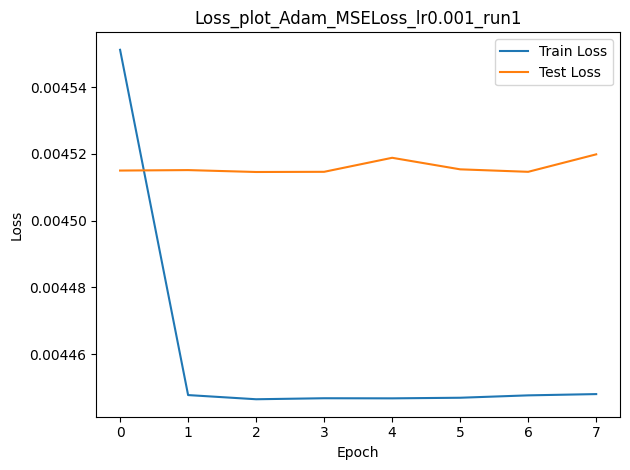

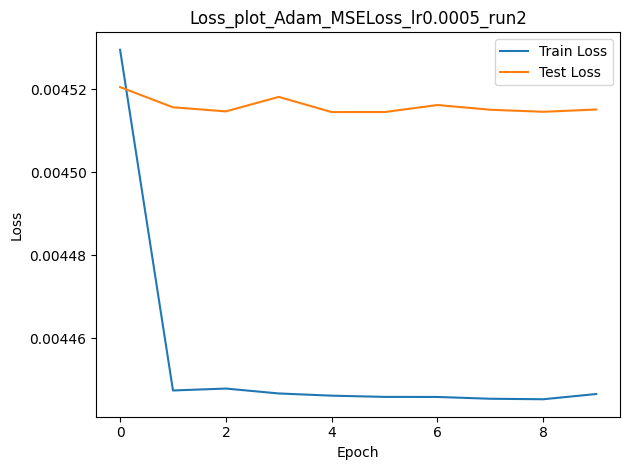

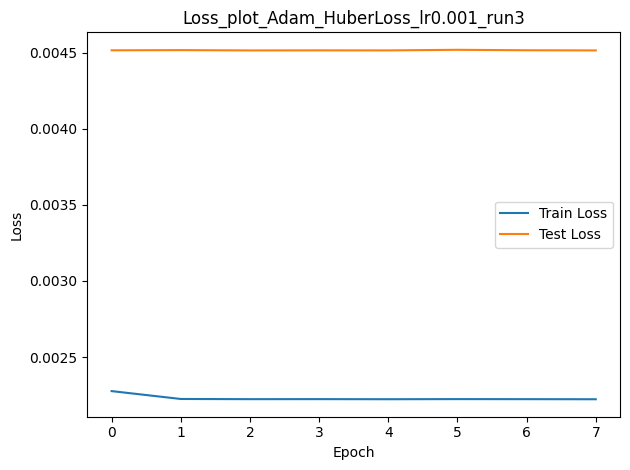

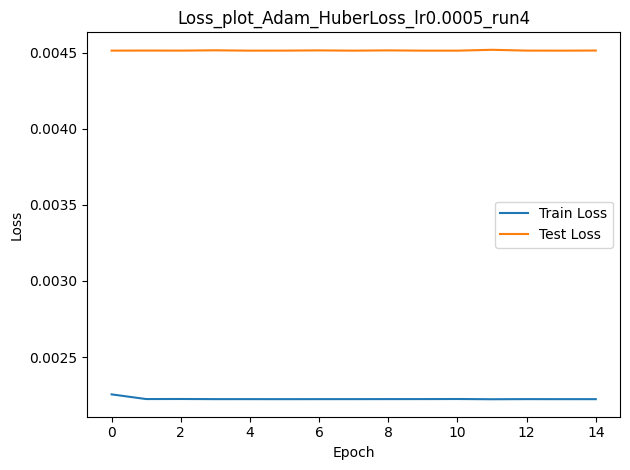

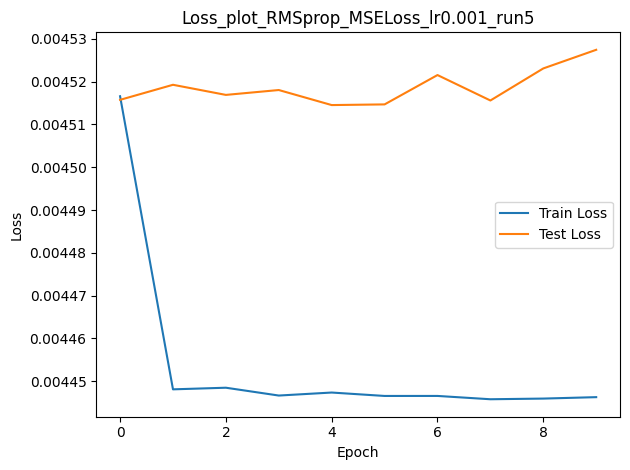

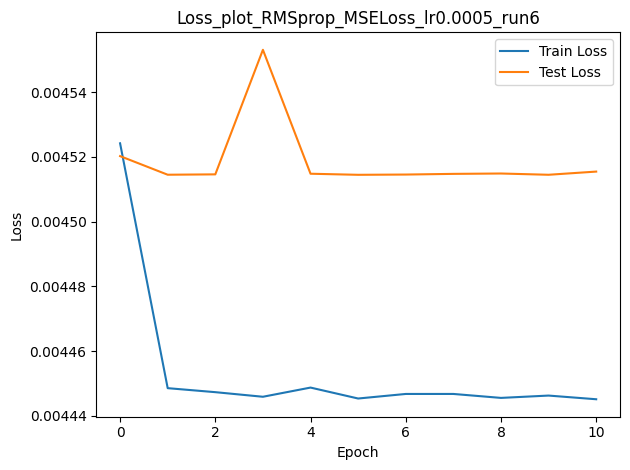

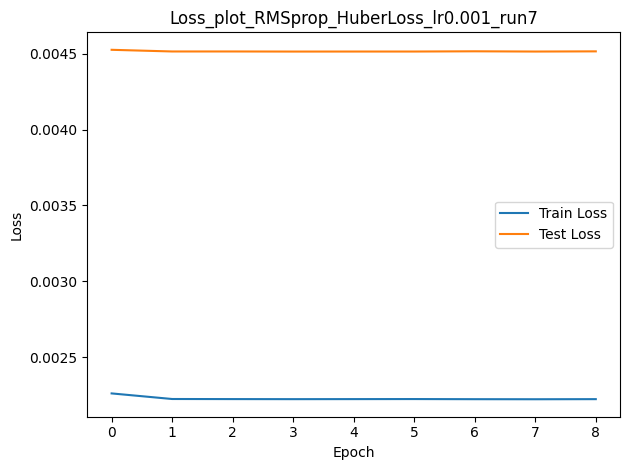

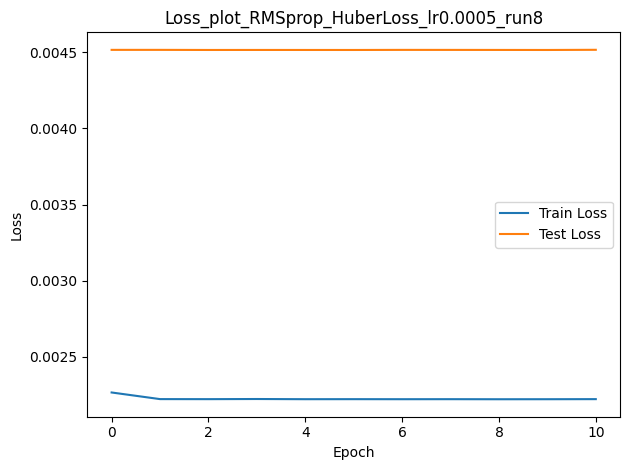

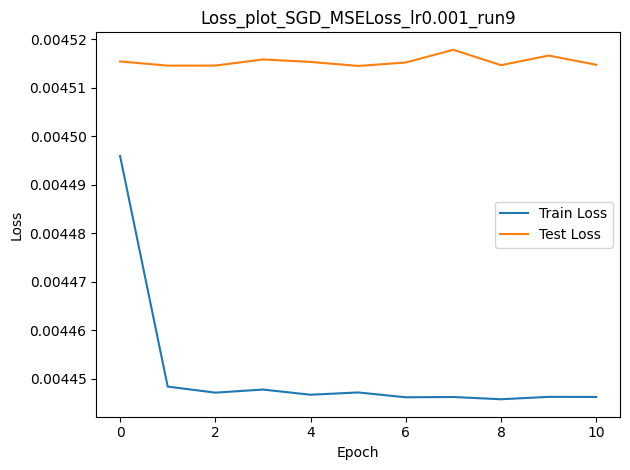

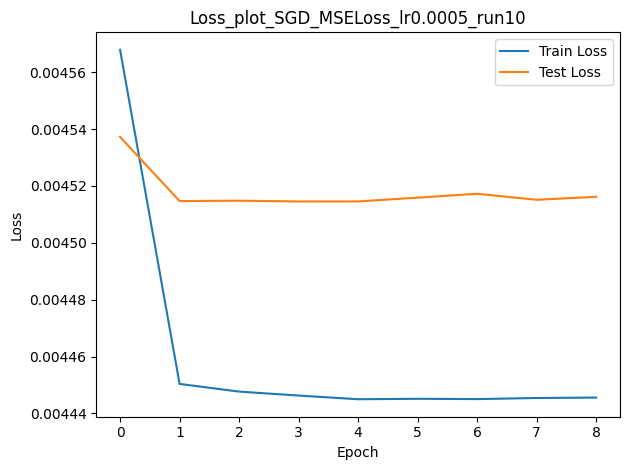

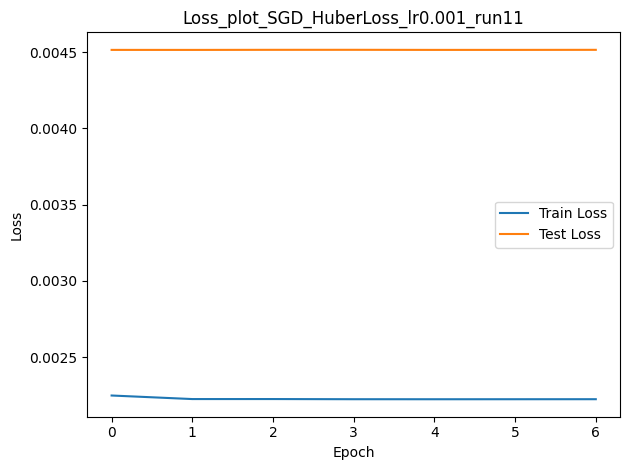

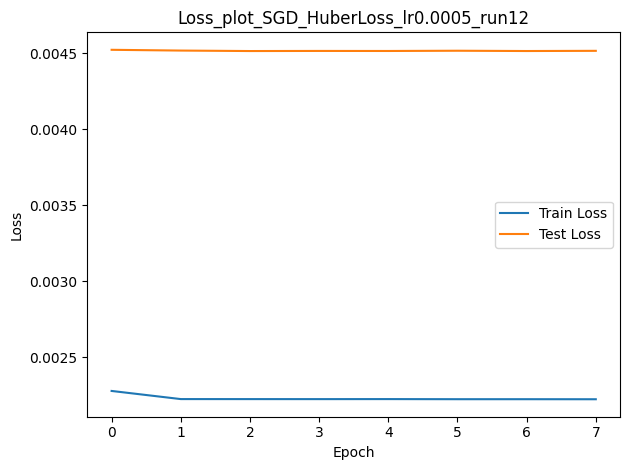

In [ ]:
# === Hyperparameter tuning block ===
optimizers_to_try = {
    'Adam': torch.optim.Adam,
    'RMSprop': torch.optim.RMSprop,
    'SGD': torch.optim.SGD
}

loss_functions_to_try = {
    'MSELoss': nn.MSELoss(),
    'HuberLoss': nn.HuberLoss(delta=0.5)
}

learning_rates = [1e-3, 5e-4]
batch_combinations = [
    {"train": train_batch, "val": val_batch}
]

run_id = 0
for opt_name, opt_class in optimizers_to_try.items():
    for loss_name, loss_fn in loss_functions_to_try.items():
        for lr in learning_rates:
            for batch_sizes in batch_combinations:
                run_id += 1
                print(f"\n===== Run {run_id}: {opt_name} + {loss_name} + lr={lr} =====")
                save_name = f"{opt_name}_{loss_name}_lr{lr}_run{run_id}"

                def train_with_loss_override(
                    modeling, train_batch, val_batch, lr, num_epoch, log_interval,
                    cuda_name, br_fol, result_folder, model_folder, save_name, do_save=True
                ):
                    print_initial_info(lr, num_epoch, modeling)
                    device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")

                    # Prepare and load data
                    processed_files = prepare_data_files(br_fol, dataset="Data")
                    if not processed_files:
                        return

                    datasets = load_datasets(br_fol, dataset="Data")
                    data_loaders = get_data_loaders(datasets, batch_sizes)

                    # Train model with chosen loss
                    def train_custom(model, device, train_loader, optimizer, epoch, log_interval):
                        print(f"[{opt_name}/{loss_name}] Training on {len(train_loader.dataset)} samples...")
                        model.train()
                        avg_loss = []
                        for data in tqdm(train_loader):
                            data = data.to(device)
                            optimizer.zero_grad()
                            x, x_cell_mut, edge_index, batch_drug, edge_feat = data.x, data.target, data.edge_index.long(), data.batch, data.edge_features
                            output = model(x, edge_index, batch_drug, x_cell_mut, edge_feat)
                            loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
                            loss.backward()
                            optimizer.step()
                            avg_loss.append(loss.item())
                        return sum(avg_loss) / len(avg_loss)

                    # Override train function
                    global train
                    original_train = train
                    train = train_custom  # monkey patching

                    # Run training
                    train_and_evaluate_model(
                        modeling=modeling, data_loaders=data_loaders, device=device, num_epoch=num_epoch,
                        optimizer_params={"lr": lr}, log_interval=log_interval,
                        model_folder=model_folder, result_folder=result_folder,
                        save_name=save_name, do_save=do_save
                    )

                    train = original_train  # restore original

                train_with_loss_override(modeling, train_batch, val_batch, lr, num_epoch,
                                         log_interval, cuda_name, br_fol=branch_folder,
                                         result_folder=result_folder, model_folder=model_folder,
                                         save_name=save_name, do_save=True)


In [ ]:
import pandas as pd
import os
import glob

def fetch_hyperparam_results(result_folder, prefix="val_result_", dataset="Data"):
    """
    Dynamically reads all validation result files and extracts hyperparameter performance.
    """
    result_files = glob.glob(os.path.join(result_folder, f"{prefix}*{dataset}.csv"))
    results = []

    for file_path in result_files:
        try:
            # Read the metrics (assuming CSV contains a single row)
            with open(file_path, "r") as f:
                line = f.readline().strip()
                rmse_val, mse_val, pearson_val, spearman_val = map(float, line.split(','))

            # Extract run number and parse settings (e.g., from filename)
            filename = os.path.basename(file_path)
            parts = filename.replace(".csv", "").split("_")
            run_id = parts[2] if len(parts) >= 3 else "NA"

            # Optional: add more parsing logic for optimizer/loss/lr from filename
            results.append({
                "Run": run_id,
                "File": filename,
                "RMSE": rmse_val,
                "MSE": mse_val,
                "Pearson": pearson_val,
                "Spearman": spearman_val
            })

        except Exception as e:
            print(f" Error reading {file_path}: {e}")

    return pd.DataFrame(results)

# Example usage:
result_folder = "/content/root_folder/root_1/results"
df_metrics = fetch_hyperparam_results(result_folder)

# Format and sort results
df_metrics["MSE_exp"] = df_metrics["MSE"].apply(lambda x: f"{x:.10e}")
df_sorted = df_metrics.sort_values(by="MSE").reset_index(drop=True)

print("\n Sorted Hyperparameter Results:")
print(df_sorted[["Run", "File", "MSE_exp","Pearson","Spearman"]])

# Show best config
best_row = df_sorted.iloc[0]
print(f"\n Best Config => Run {best_row['Run']} | MSE: {best_row['MSE_exp']} | Pearson: {best_row['Pearson']:.6f}")



 Sorted Hyperparameter Results:
         Run                                               File  \
0       Adam   val_result_Adam_HuberLoss_lr0.0005_run4_Data.csv   
1    RMSprop  val_result_RMSprop_HuberLoss_lr0.001_run7_Data...   
2        SGD   val_result_SGD_HuberLoss_lr0.0005_run12_Data.csv   
3        SGD       val_result_SGD_MSELoss_lr0.001_run9_Data.csv   
4    RMSprop  val_result_RMSprop_MSELoss_lr0.0005_run6_Data.csv   
5    RMSprop  val_result_RMSprop_HuberLoss_lr0.0005_run8_Dat...   
6       Adam     val_result_Adam_MSELoss_lr0.0005_run2_Data.csv   
7   baseline                 val_result_baseline_model_Data.csv   
8    RMSprop   val_result_RMSprop_MSELoss_lr0.001_run5_Data.csv   
9       Adam    val_result_Adam_HuberLoss_lr0.001_run3_Data.csv   
10       SGD     val_result_SGD_MSELoss_lr0.0005_run10_Data.csv   
11      Adam      val_result_Adam_MSELoss_lr0.001_run1_Data.csv   
12       SGD    val_result_SGD_HuberLoss_lr0.001_run11_Data.csv   

             MSE_exp   Pears

In [ ]:
!zip -r /content/root_folder.zip /content/root_folder
from google.colab import files
files.download("/content/root_folder.zip")

  adding: content/root_folder/ (stored 0%)
  adding: content/root_folder/root_1/ (stored 0%)
  adding: content/root_folder/root_1/models/ (stored 0%)
  adding: content/root_folder/root_1/models/model_Adam_MSELoss_lr0.0005_run2_Data.model (deflated 7%)
  adding: content/root_folder/root_1/models/model_SGD_HuberLoss_lr0.001_run11_Data.model (deflated 8%)
  adding: content/root_folder/root_1/models/model_Adam_MSELoss_lr0.001_run1_Data.model (deflated 8%)
  adding: content/root_folder/root_1/models/model_RMSprop_HuberLoss_lr0.0005_run8_Data.model (deflated 8%)
  adding: content/root_folder/root_1/models/model_RMSprop_MSELoss_lr0.0005_run6_Data.model (deflated 7%)
  adding: content/root_folder/root_1/models/model_SGD_MSELoss_lr0.001_run9_Data.model (deflated 7%)
  adding: content/root_folder/root_1/models/model_Adam_HuberLoss_lr0.001_run3_Data.model (deflated 8%)
  adding: content/root_folder/root_1/models/model_SGD_HuberLoss_lr0.0005_run12_Data.model (deflated 8%)
  adding: content/root_fo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Plotting the Loss Plots for each run

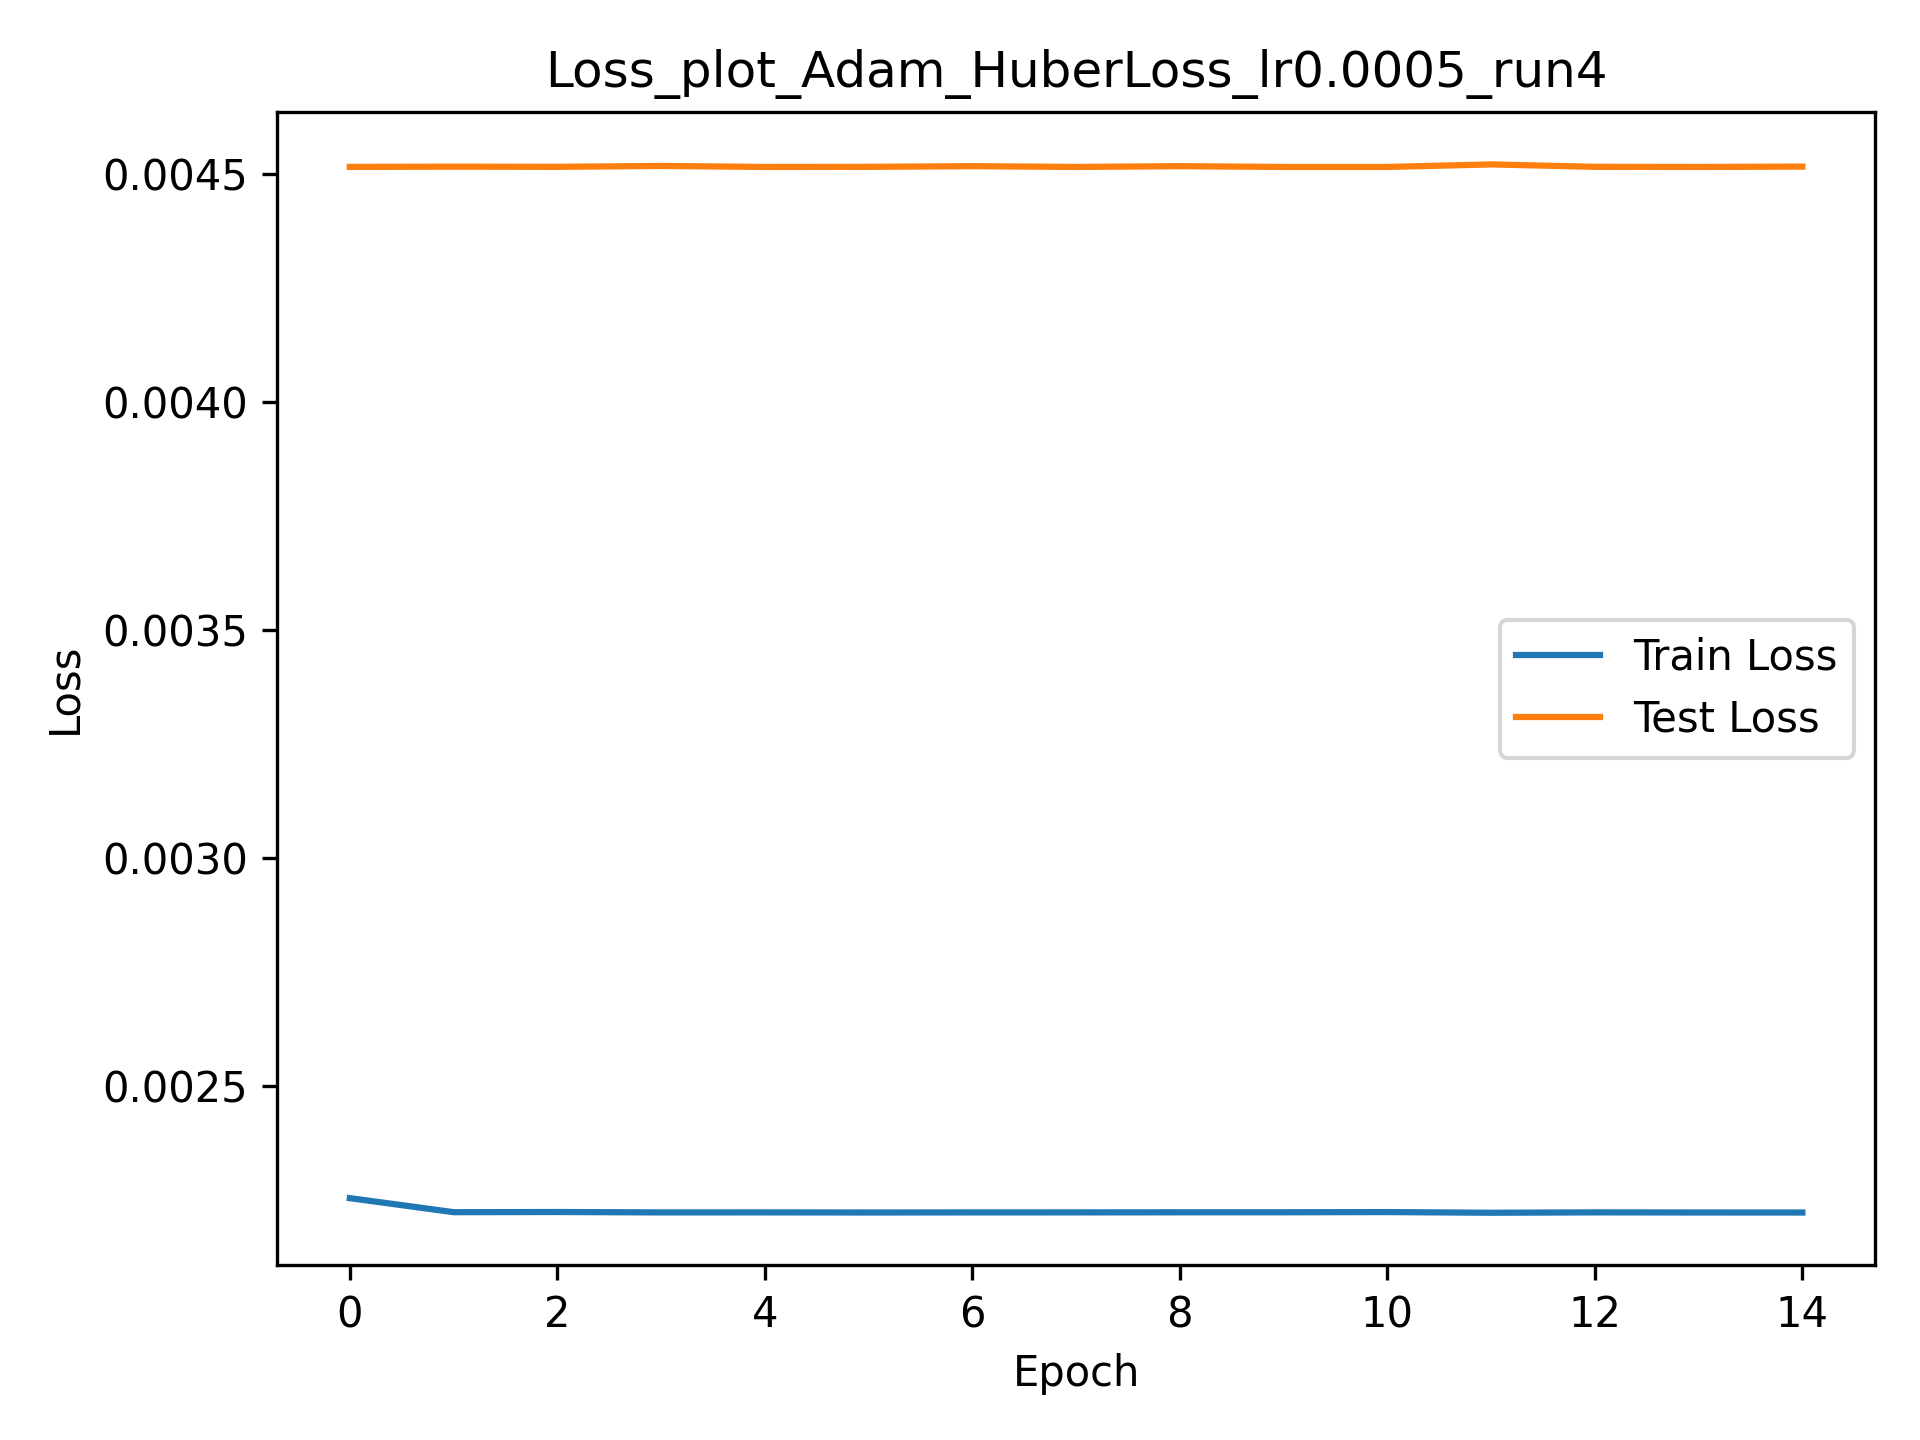

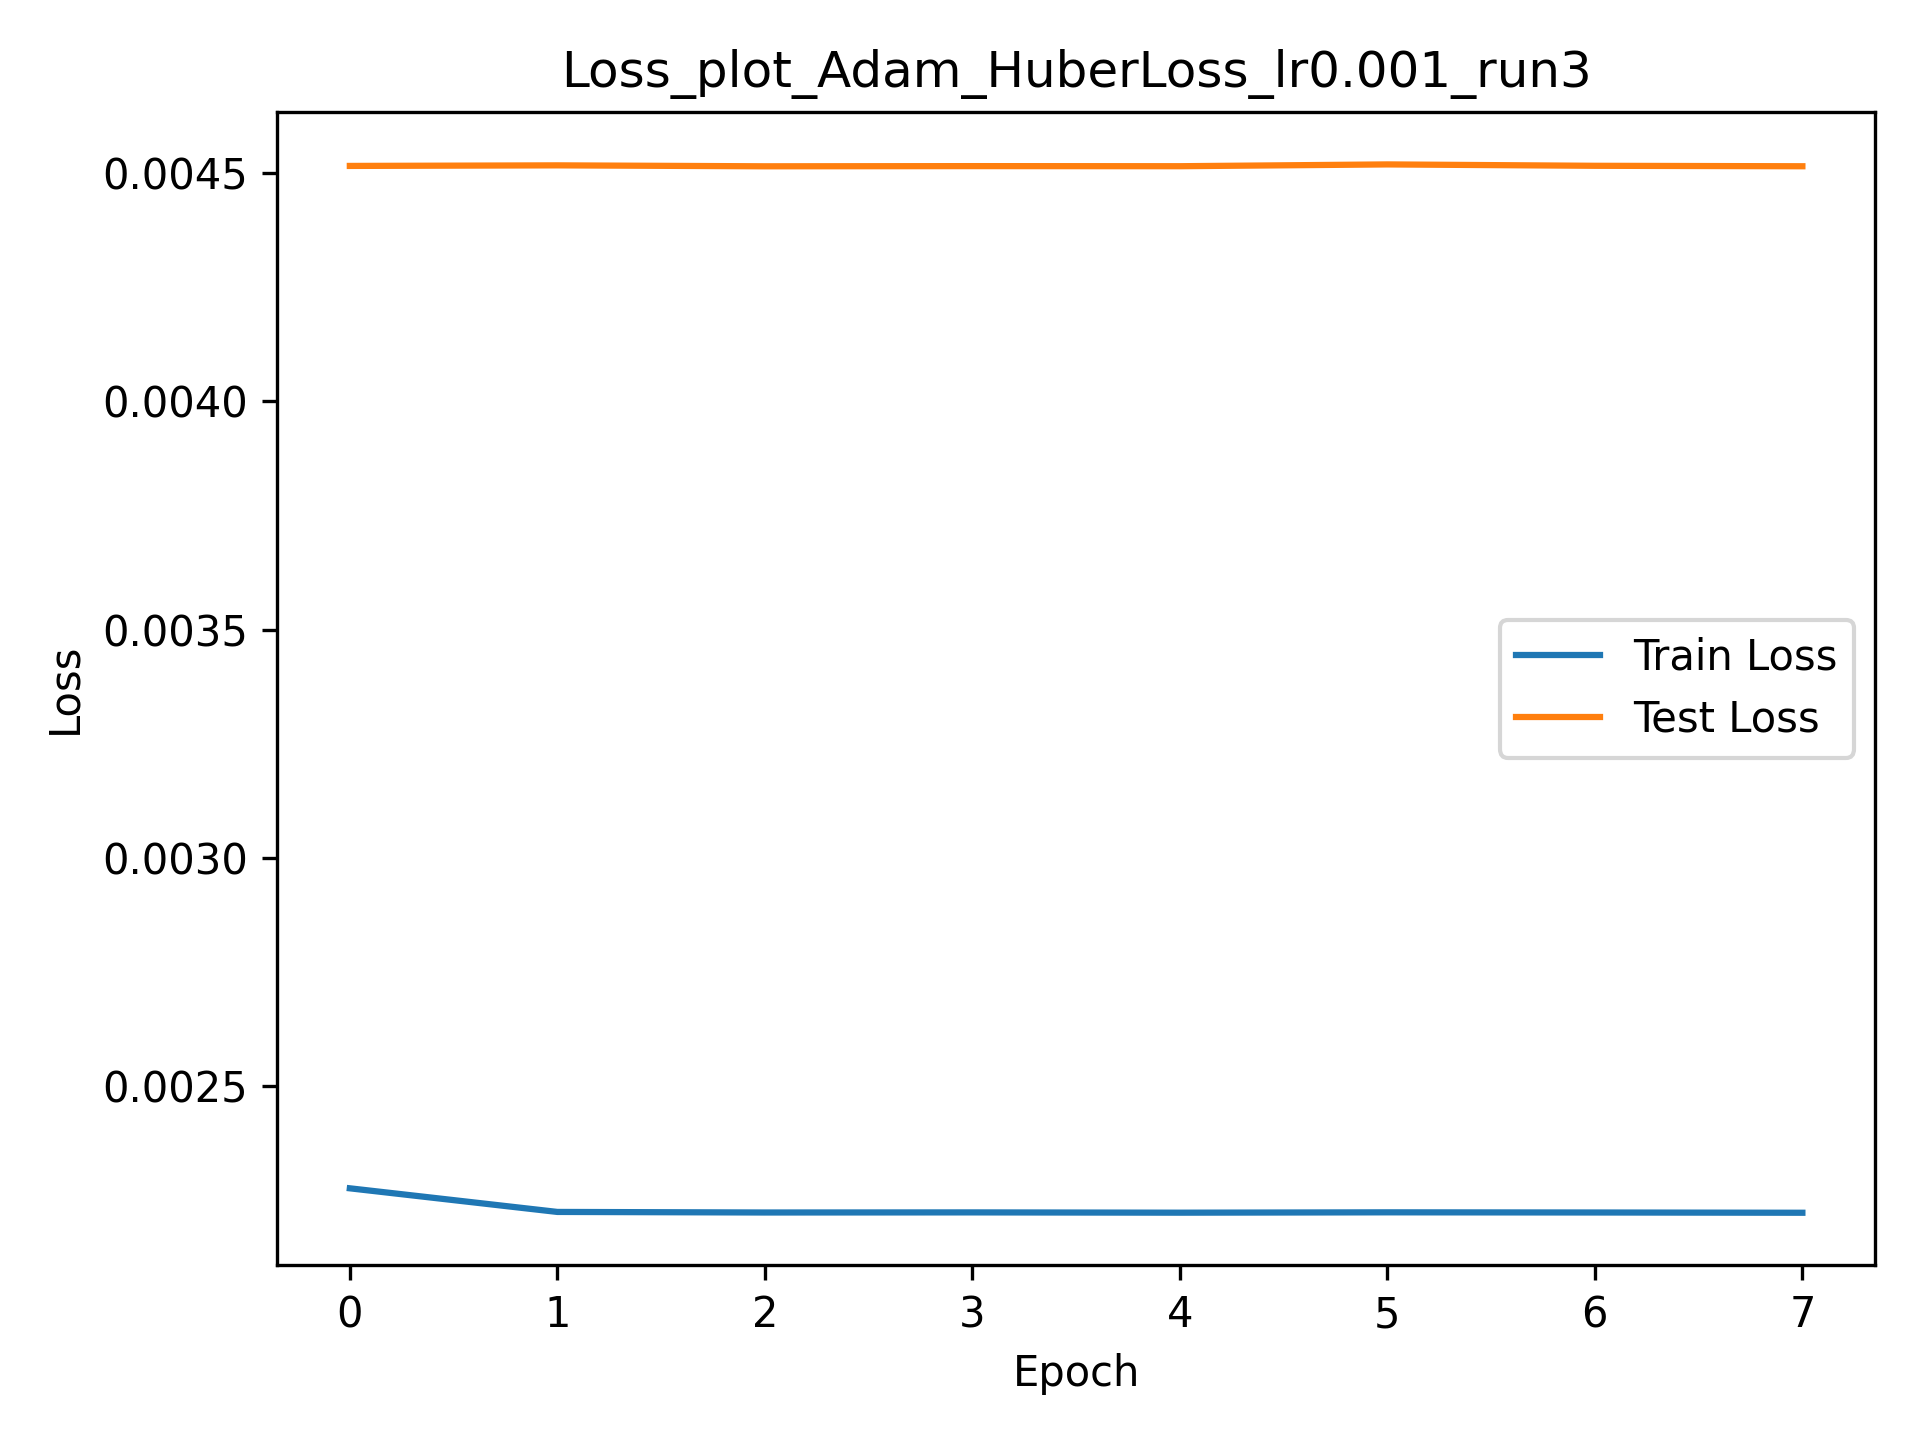

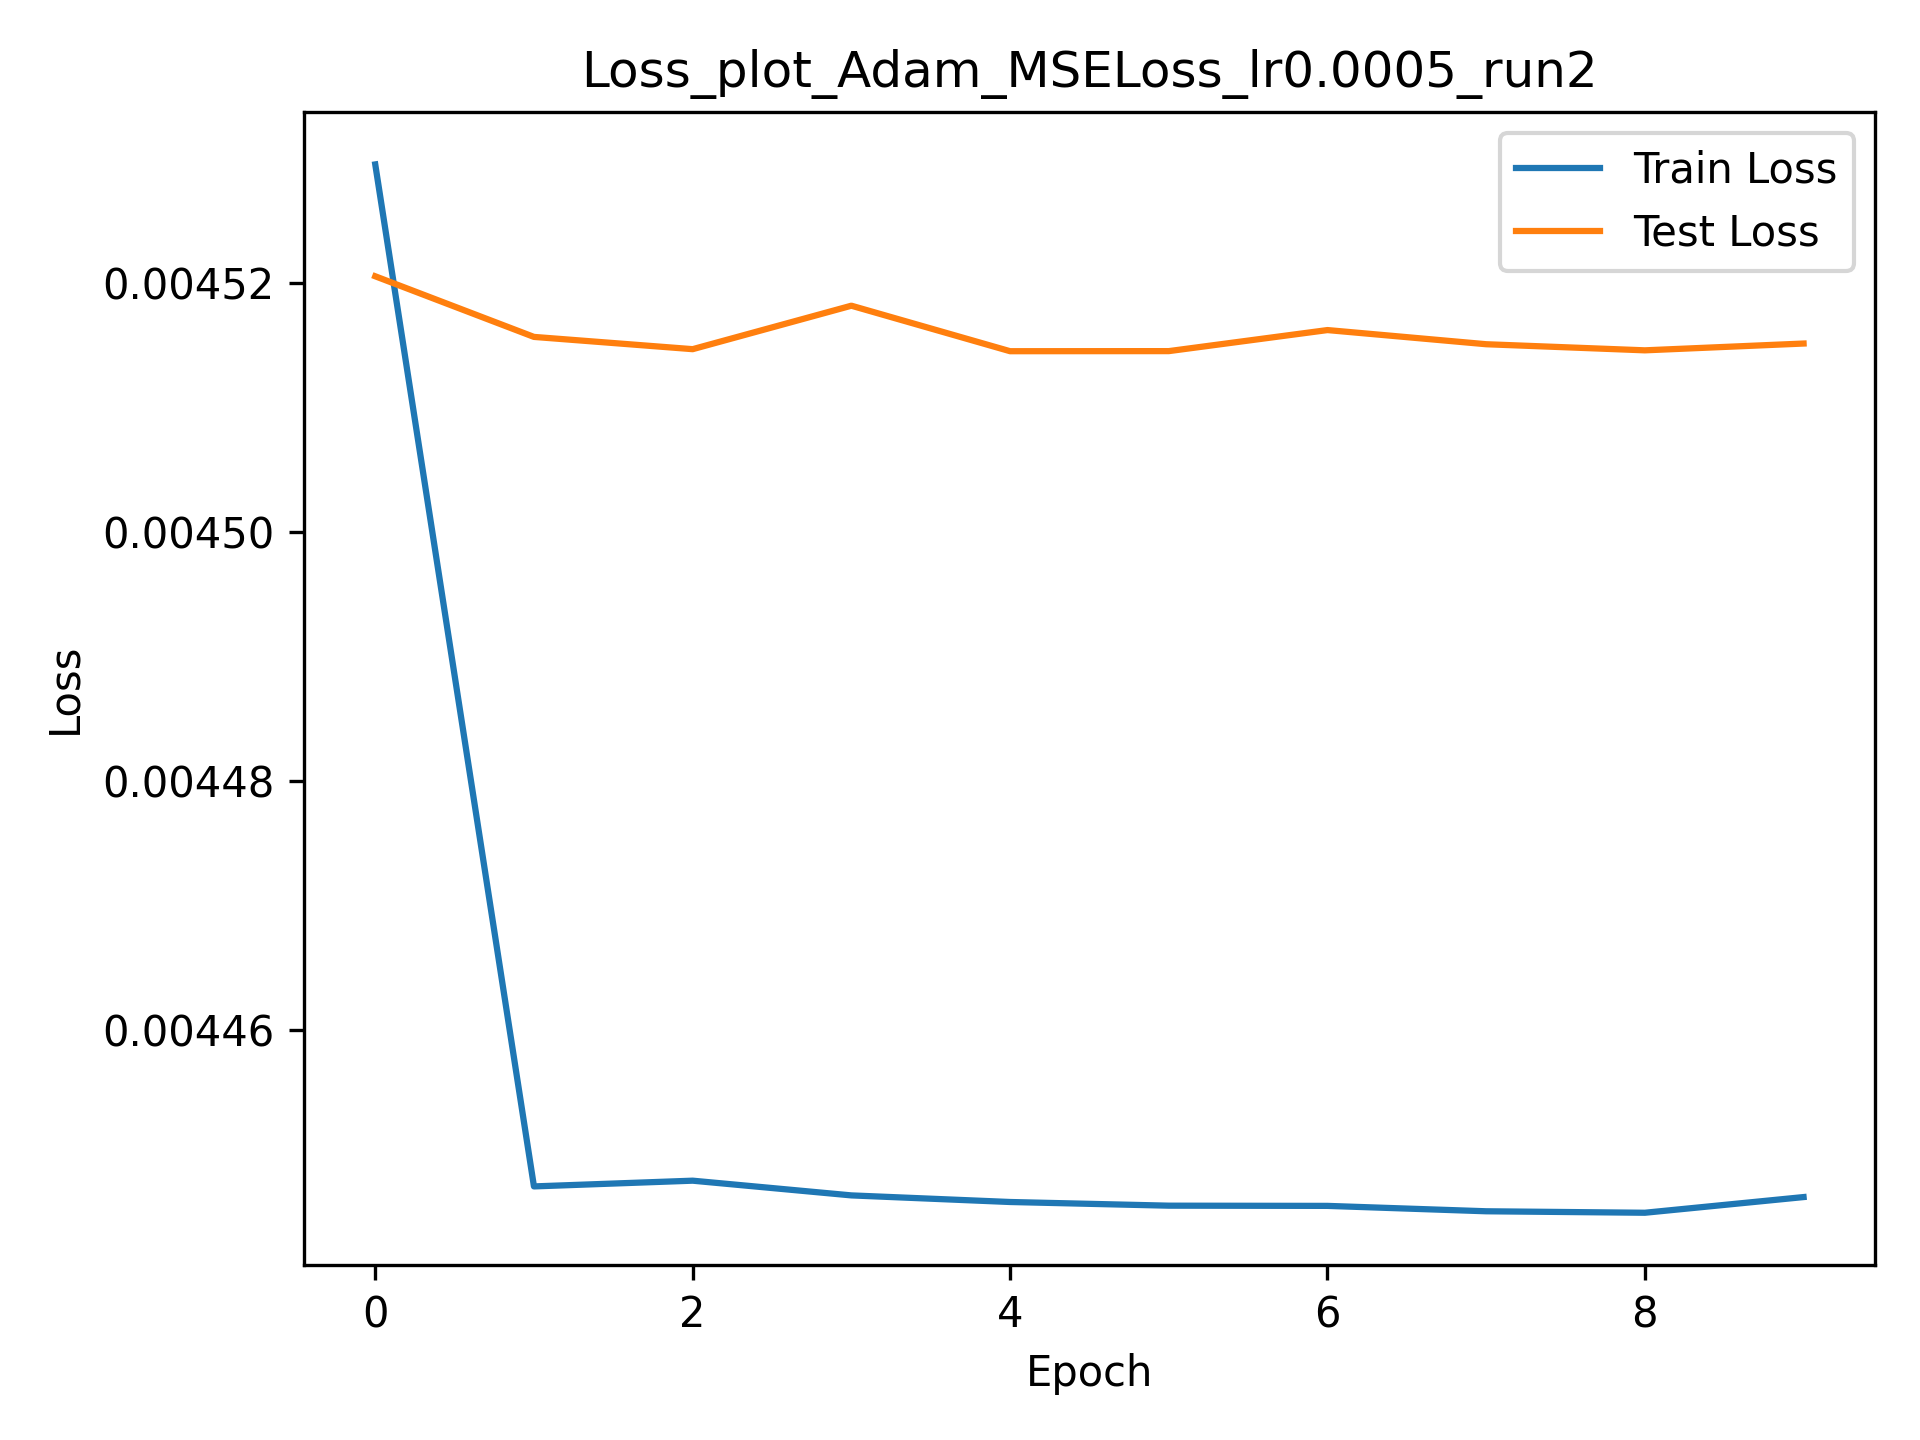

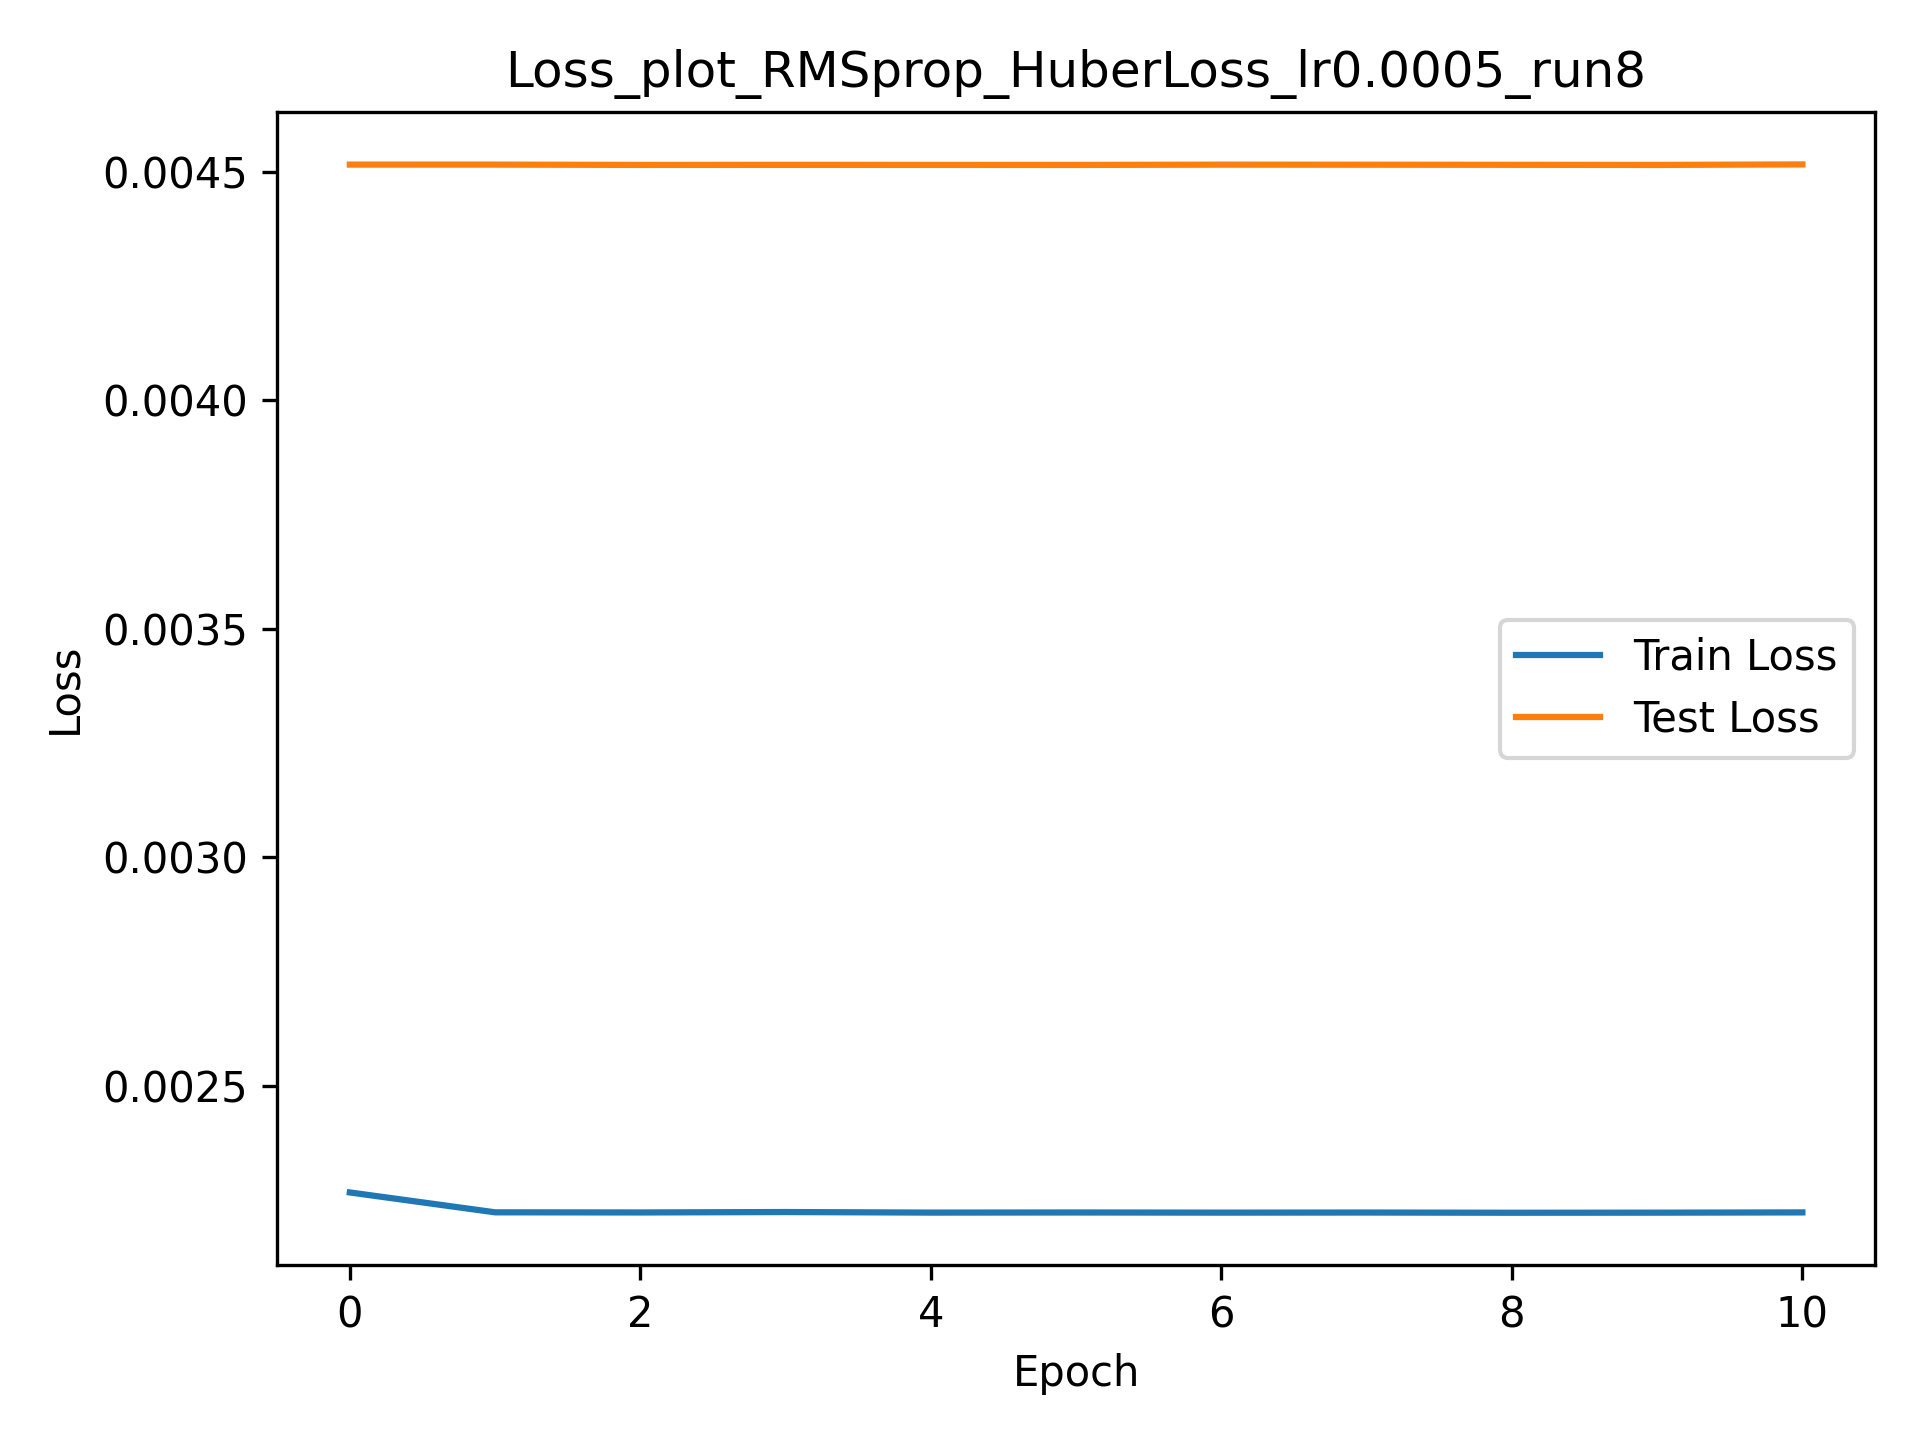

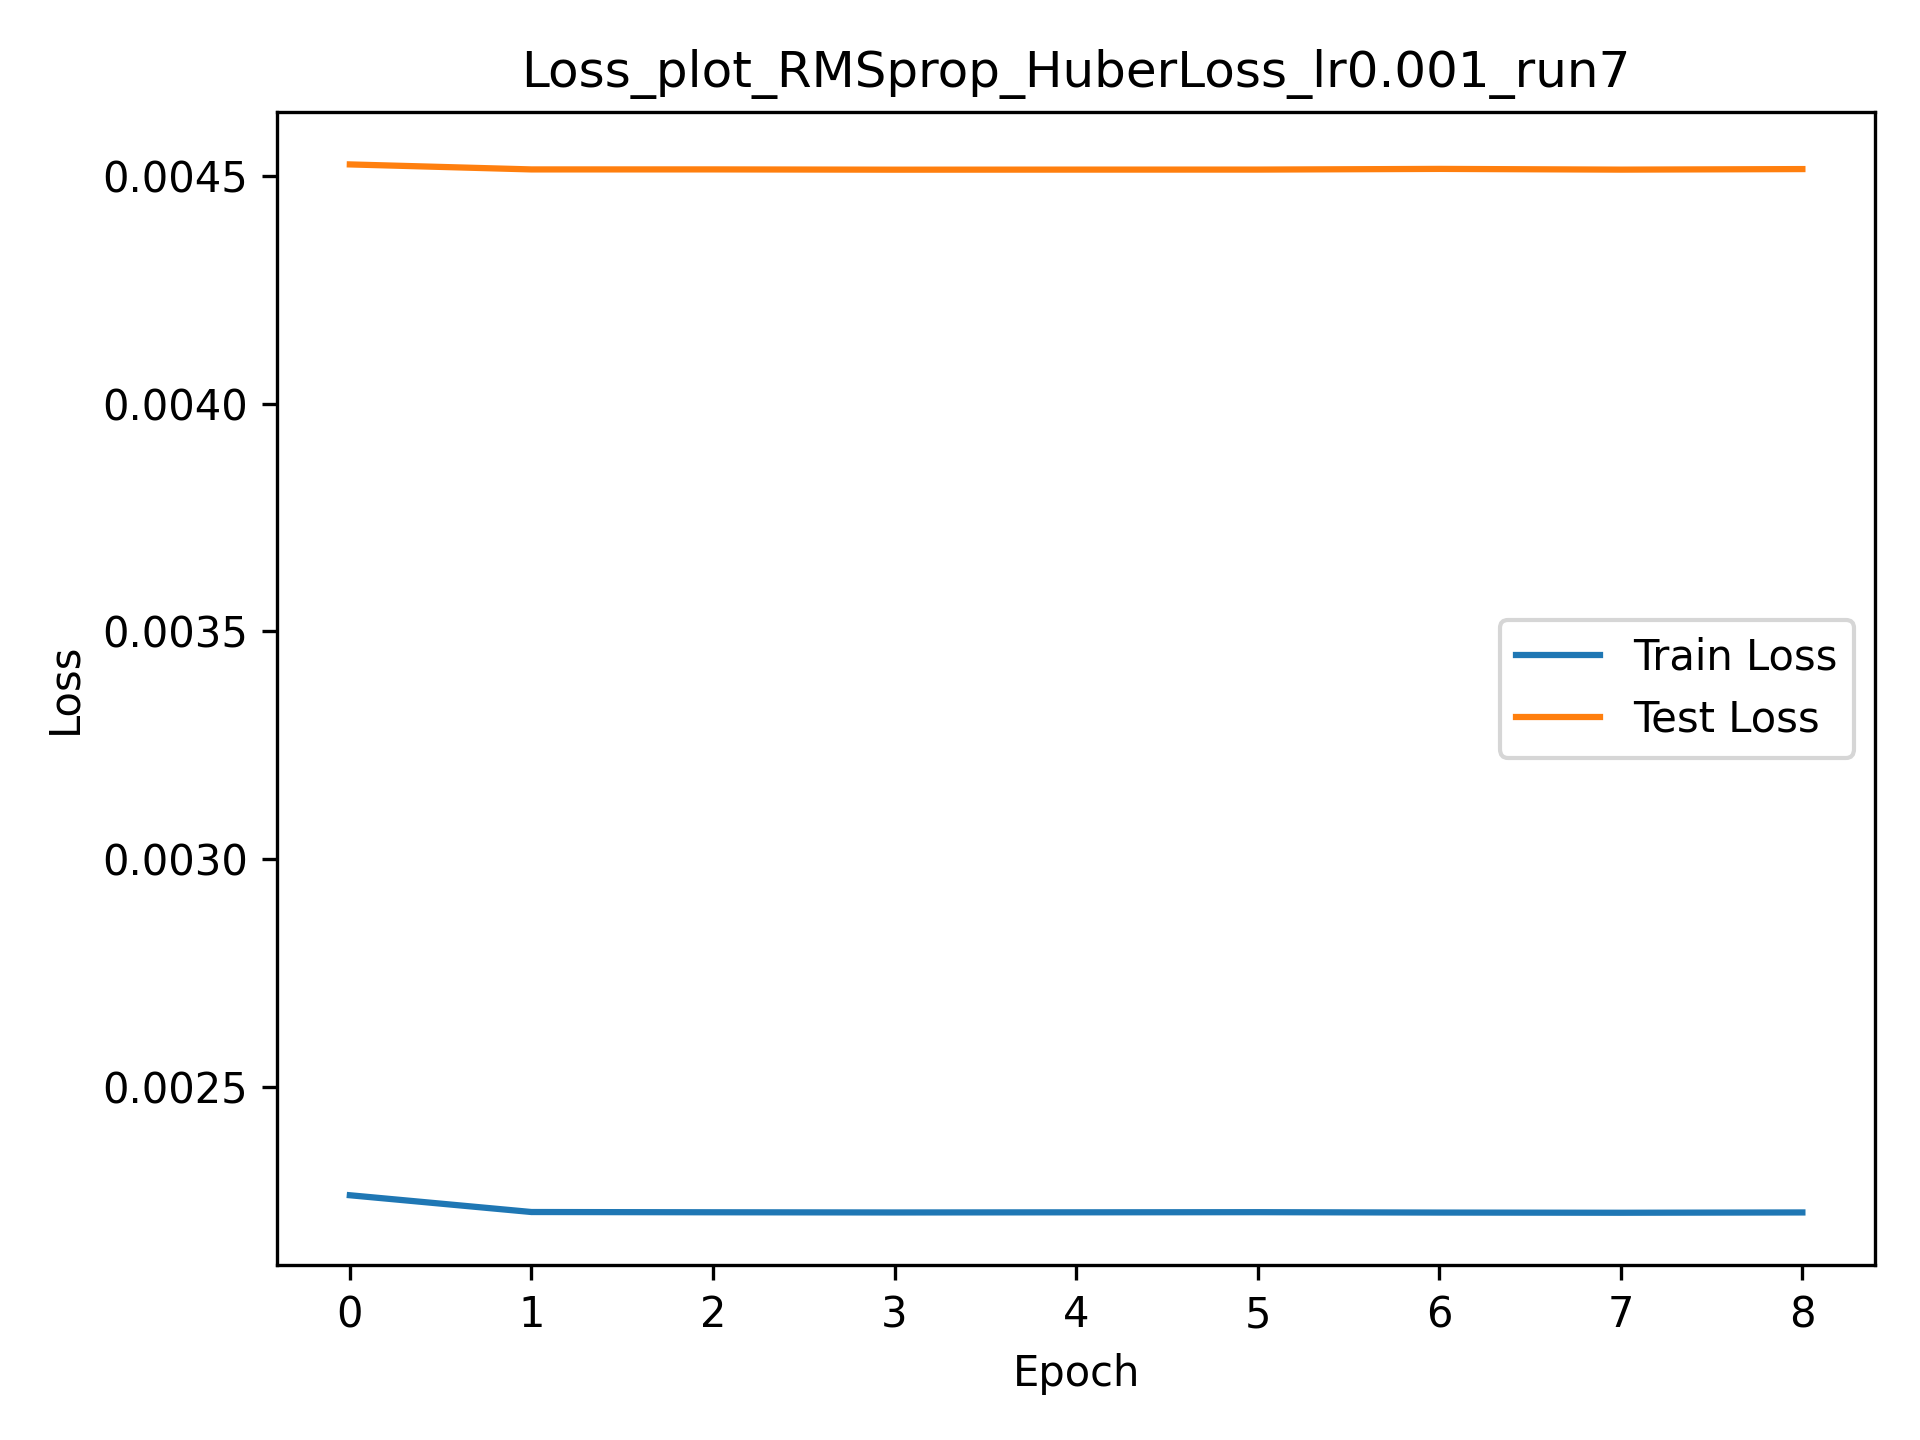

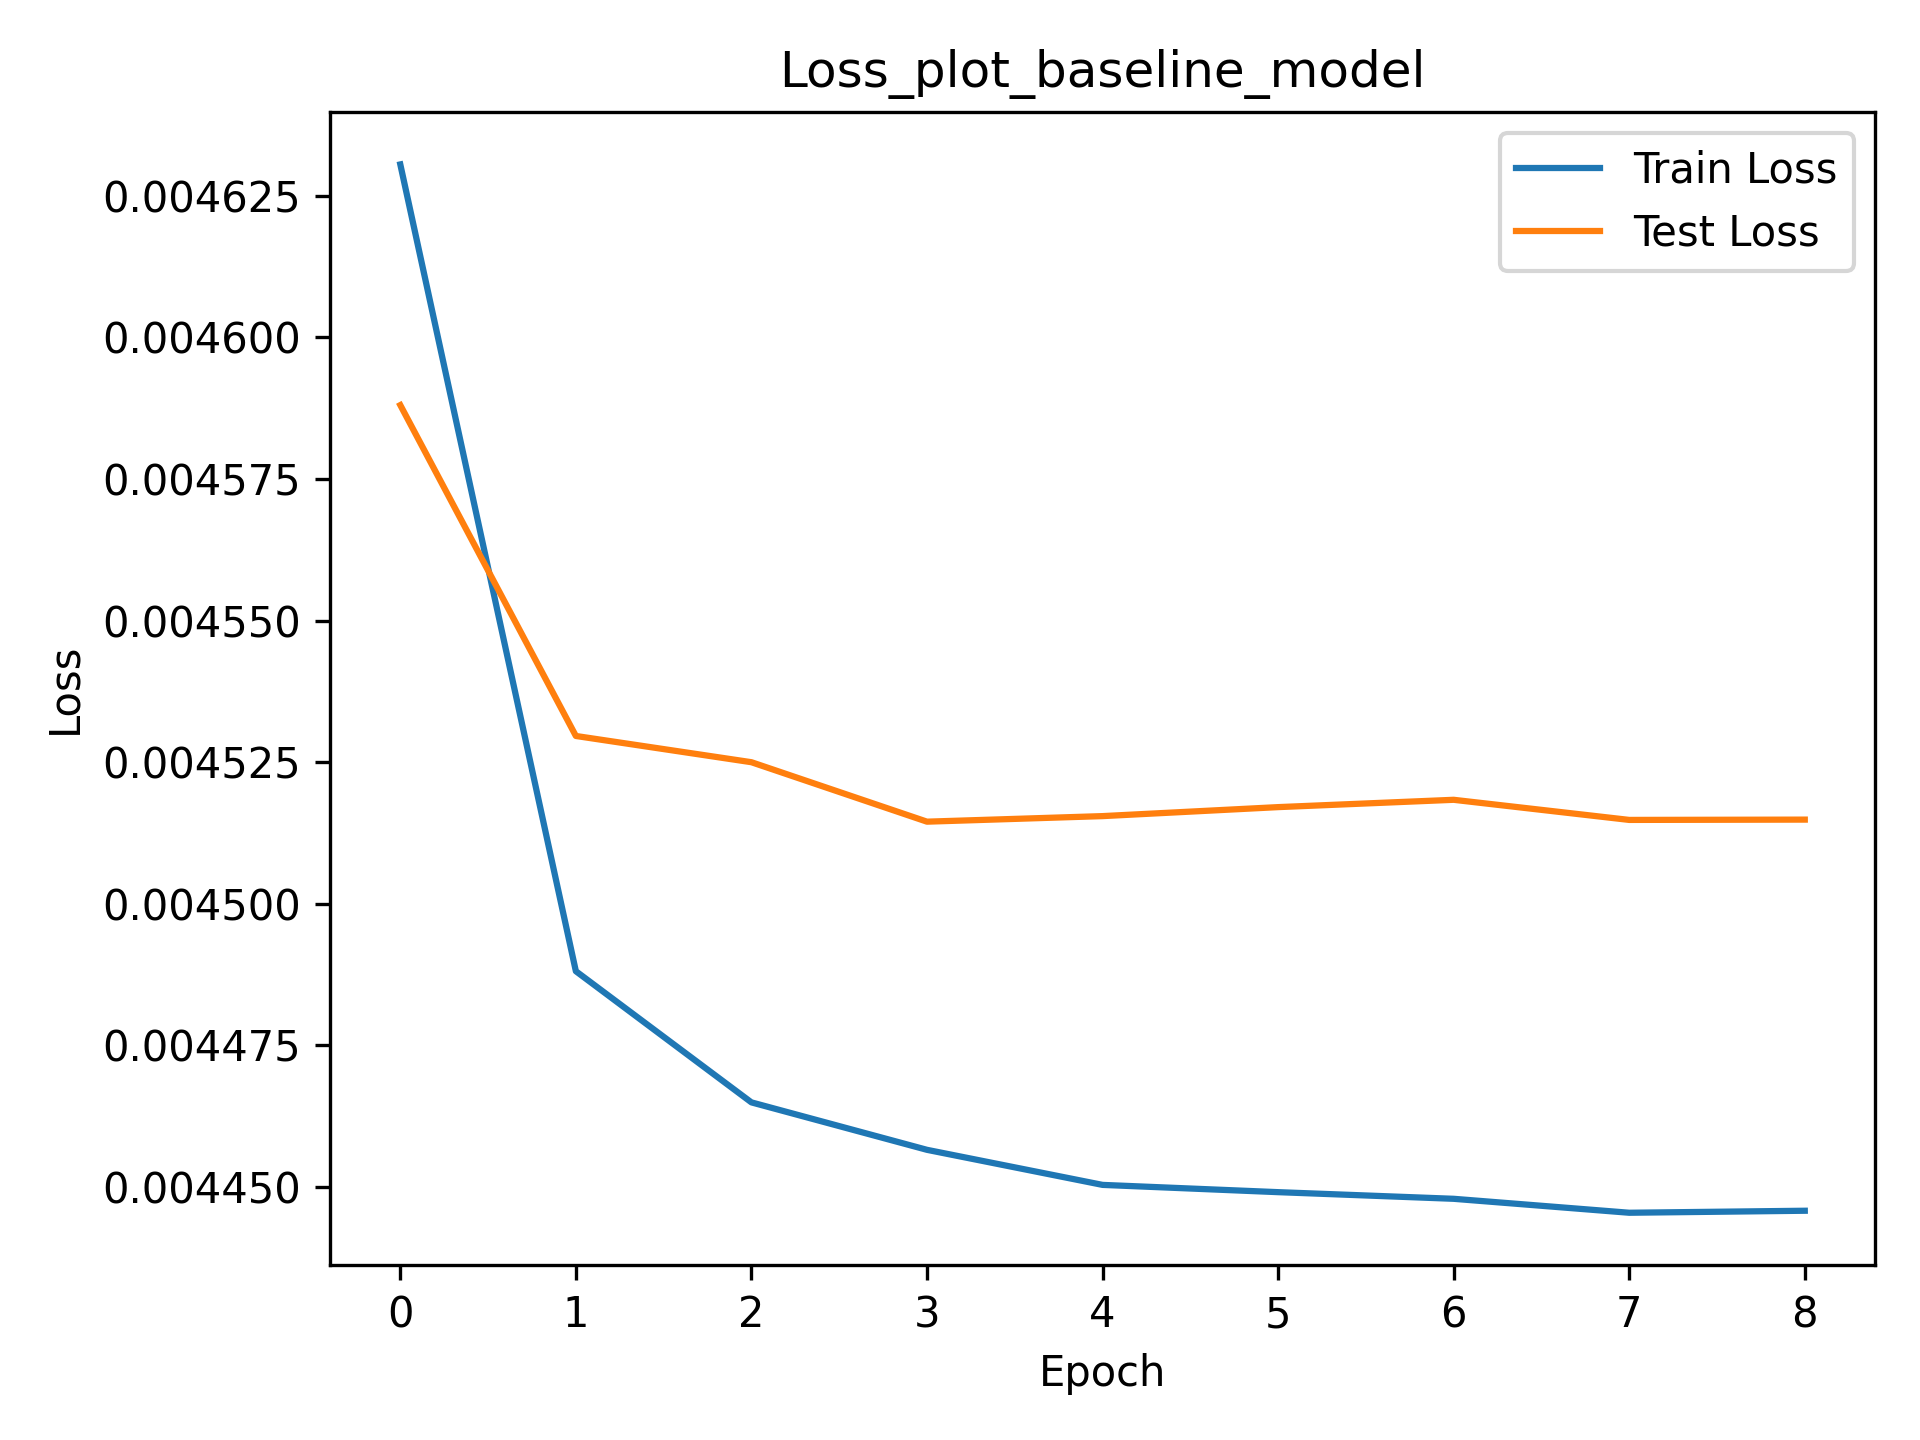

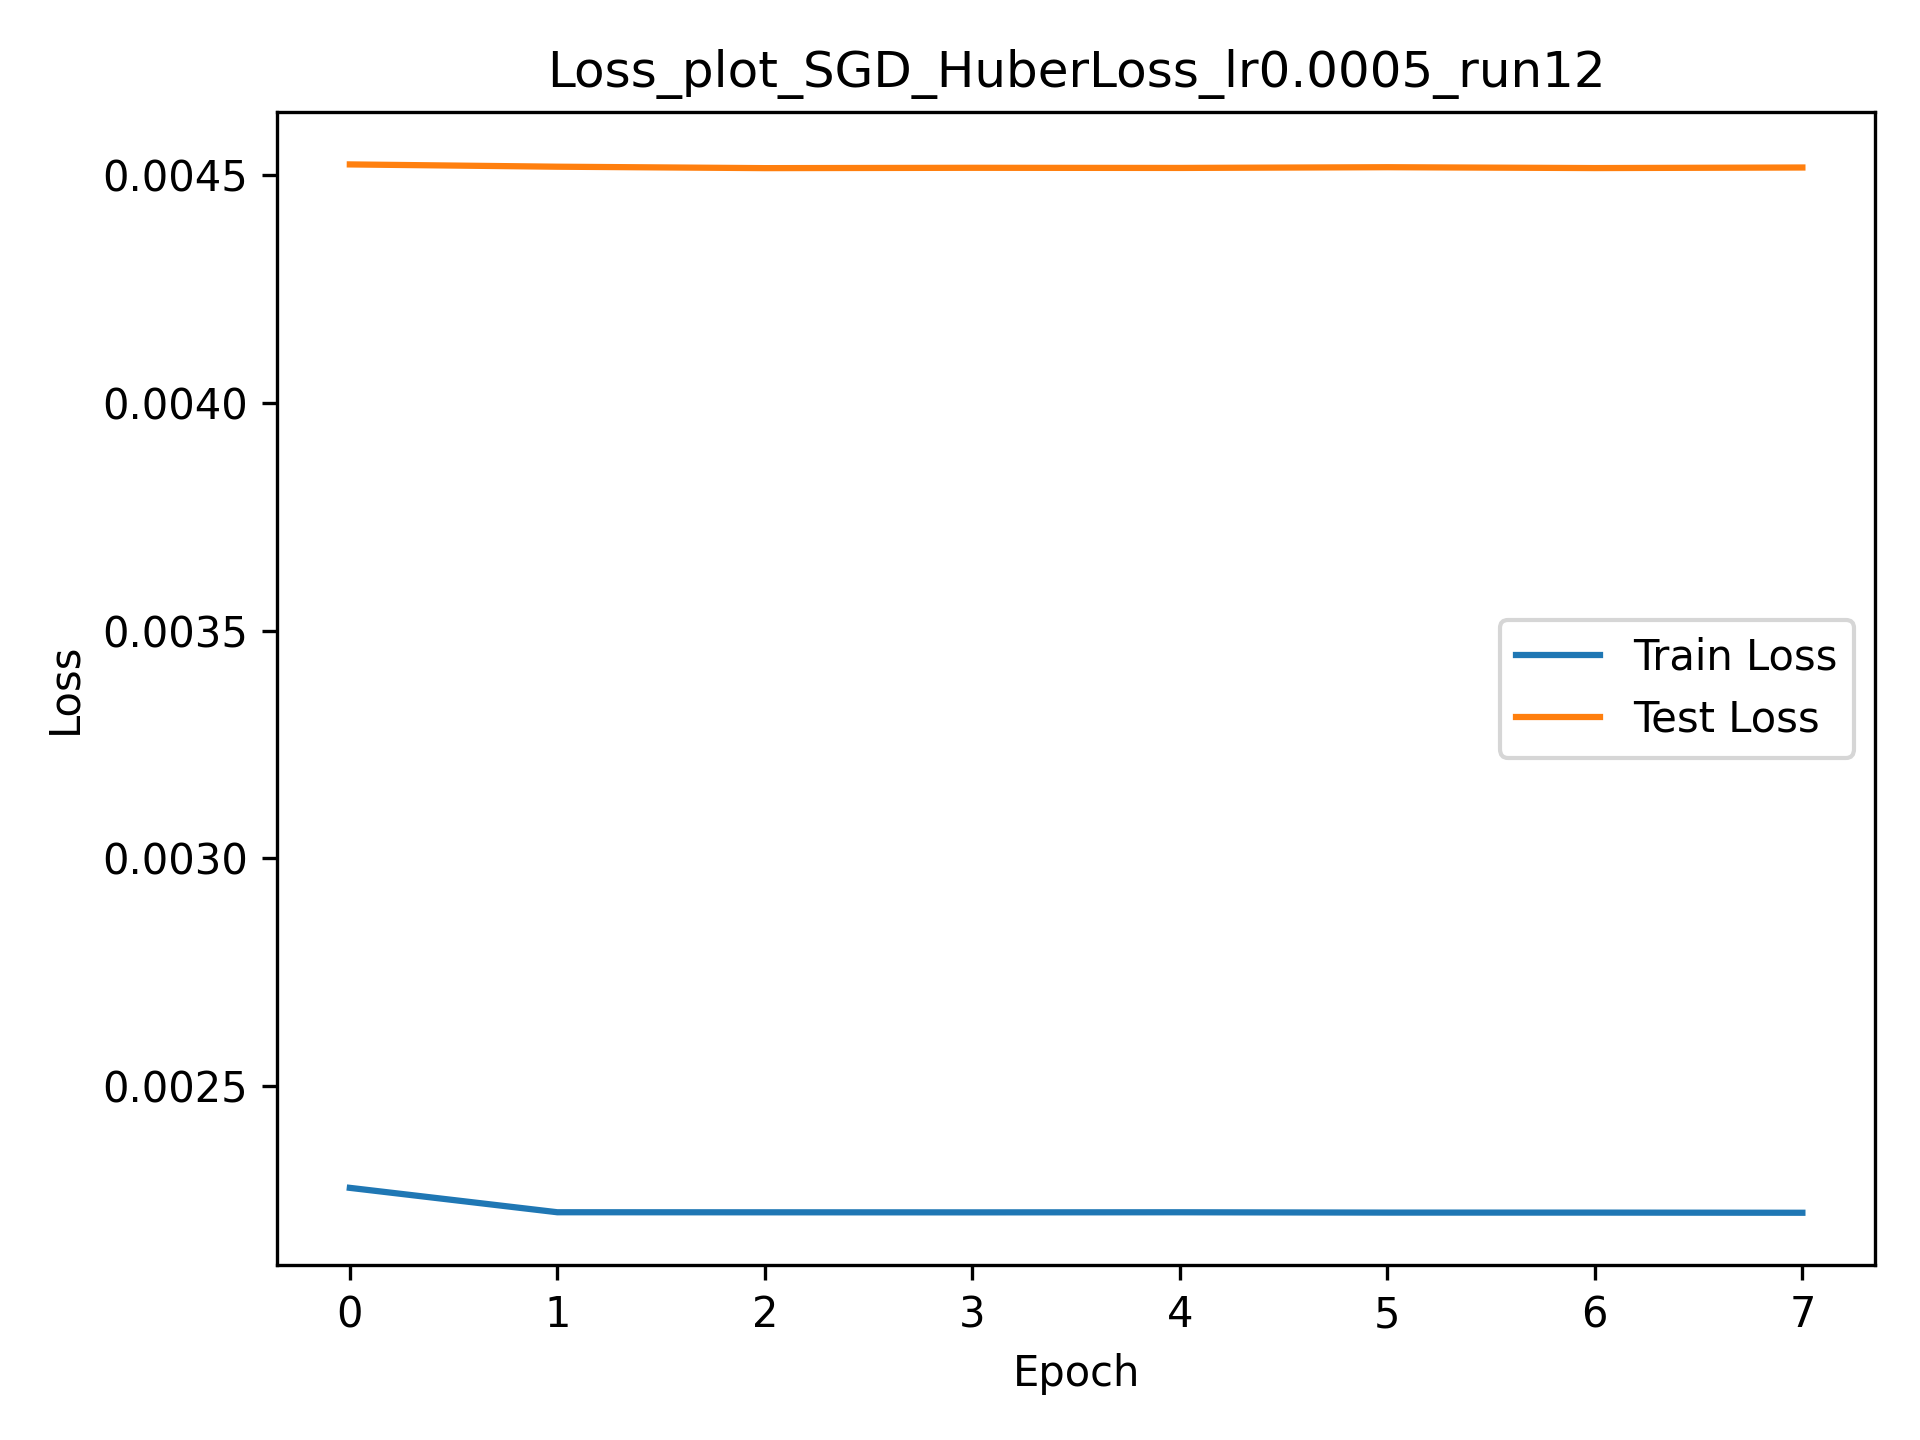

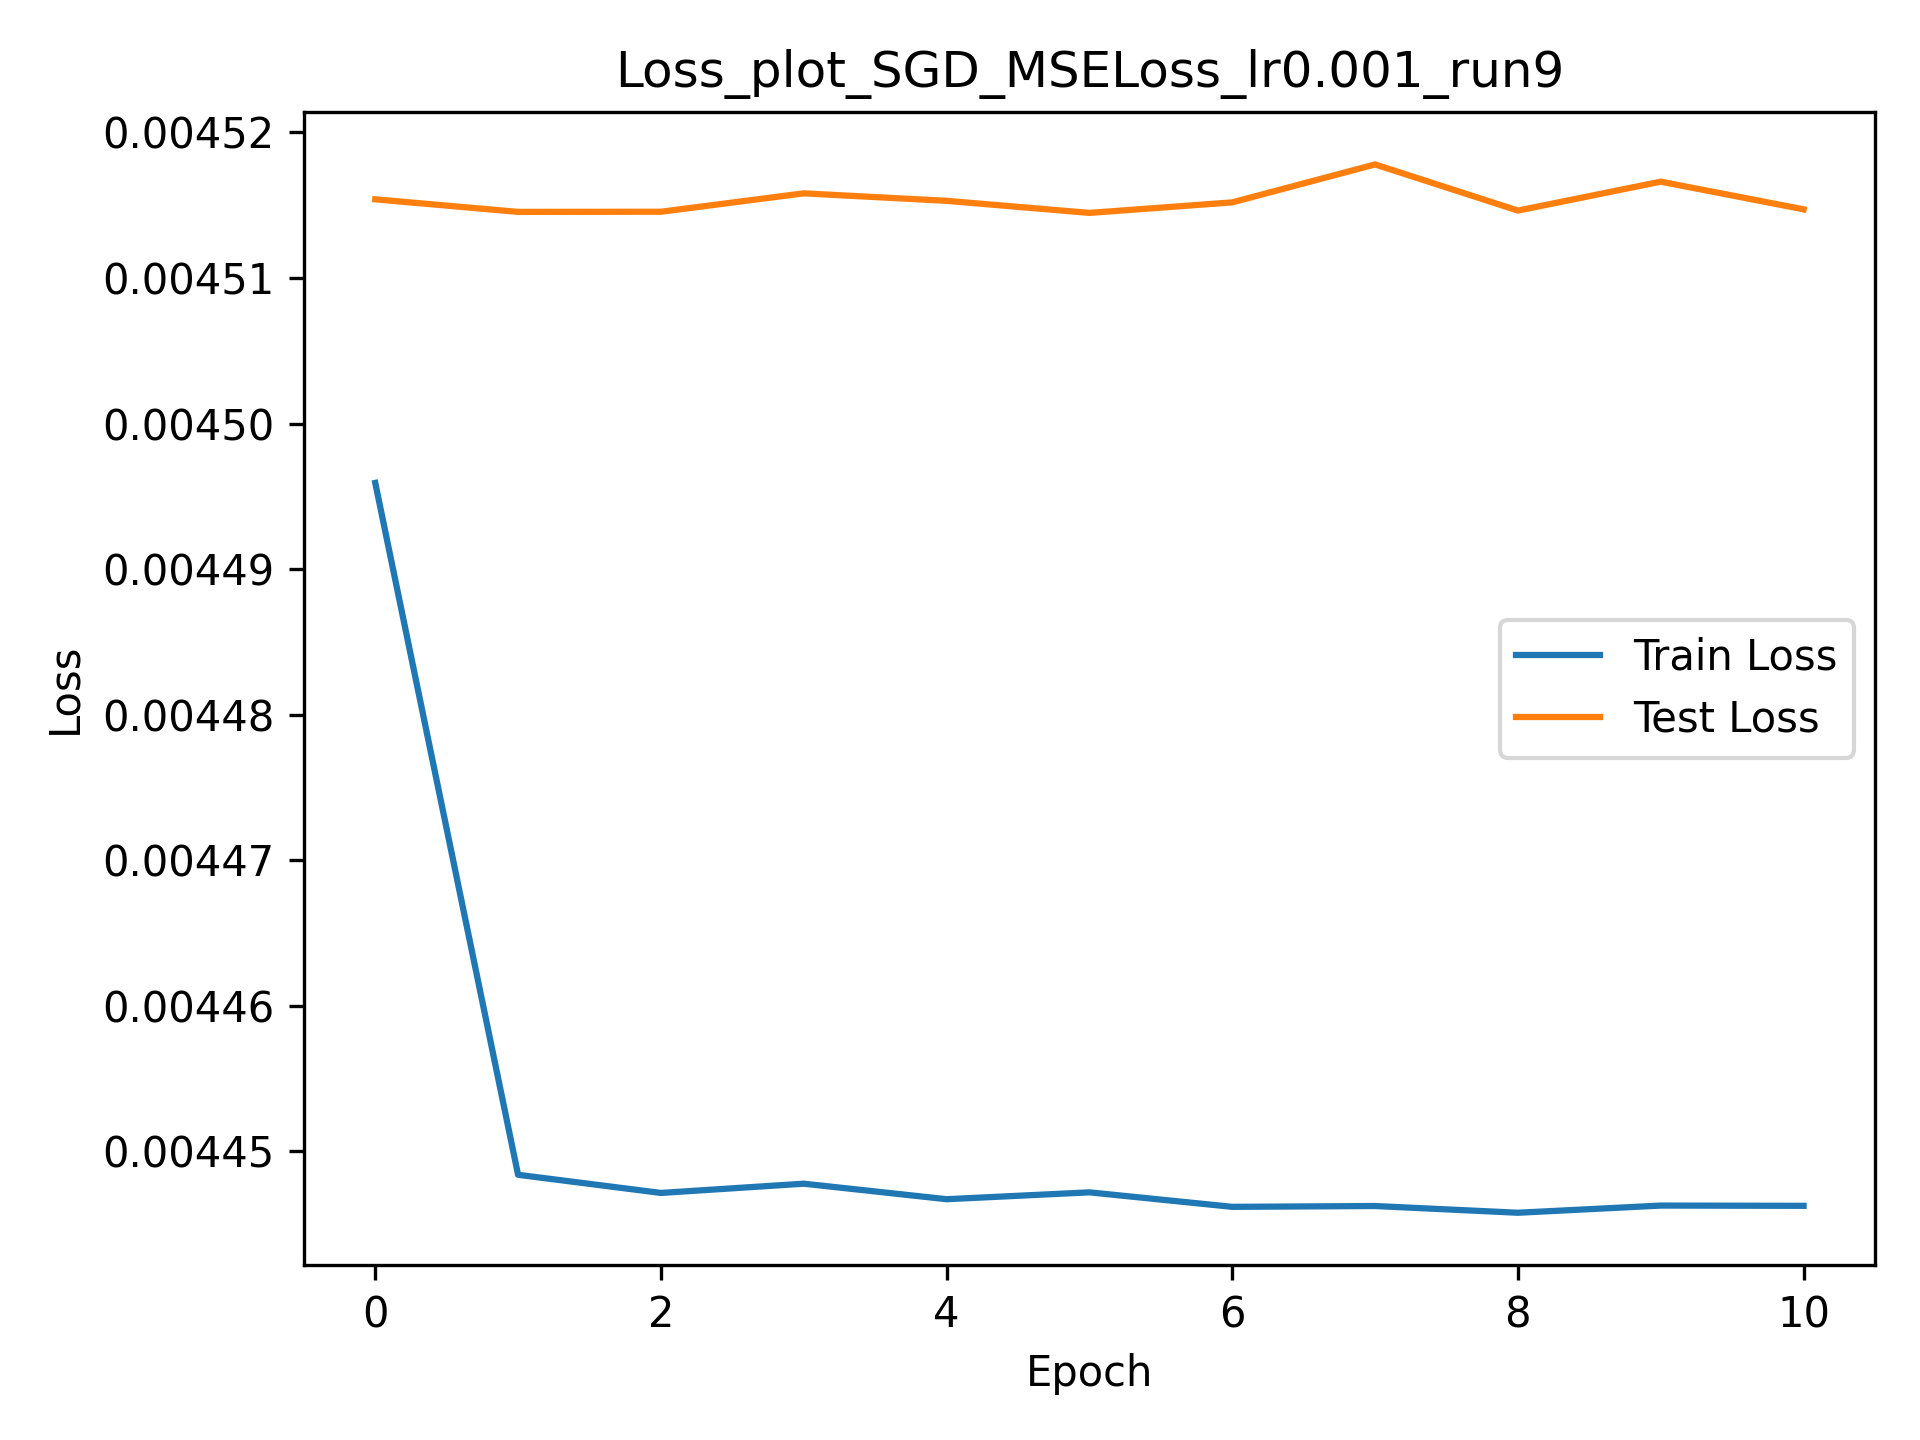

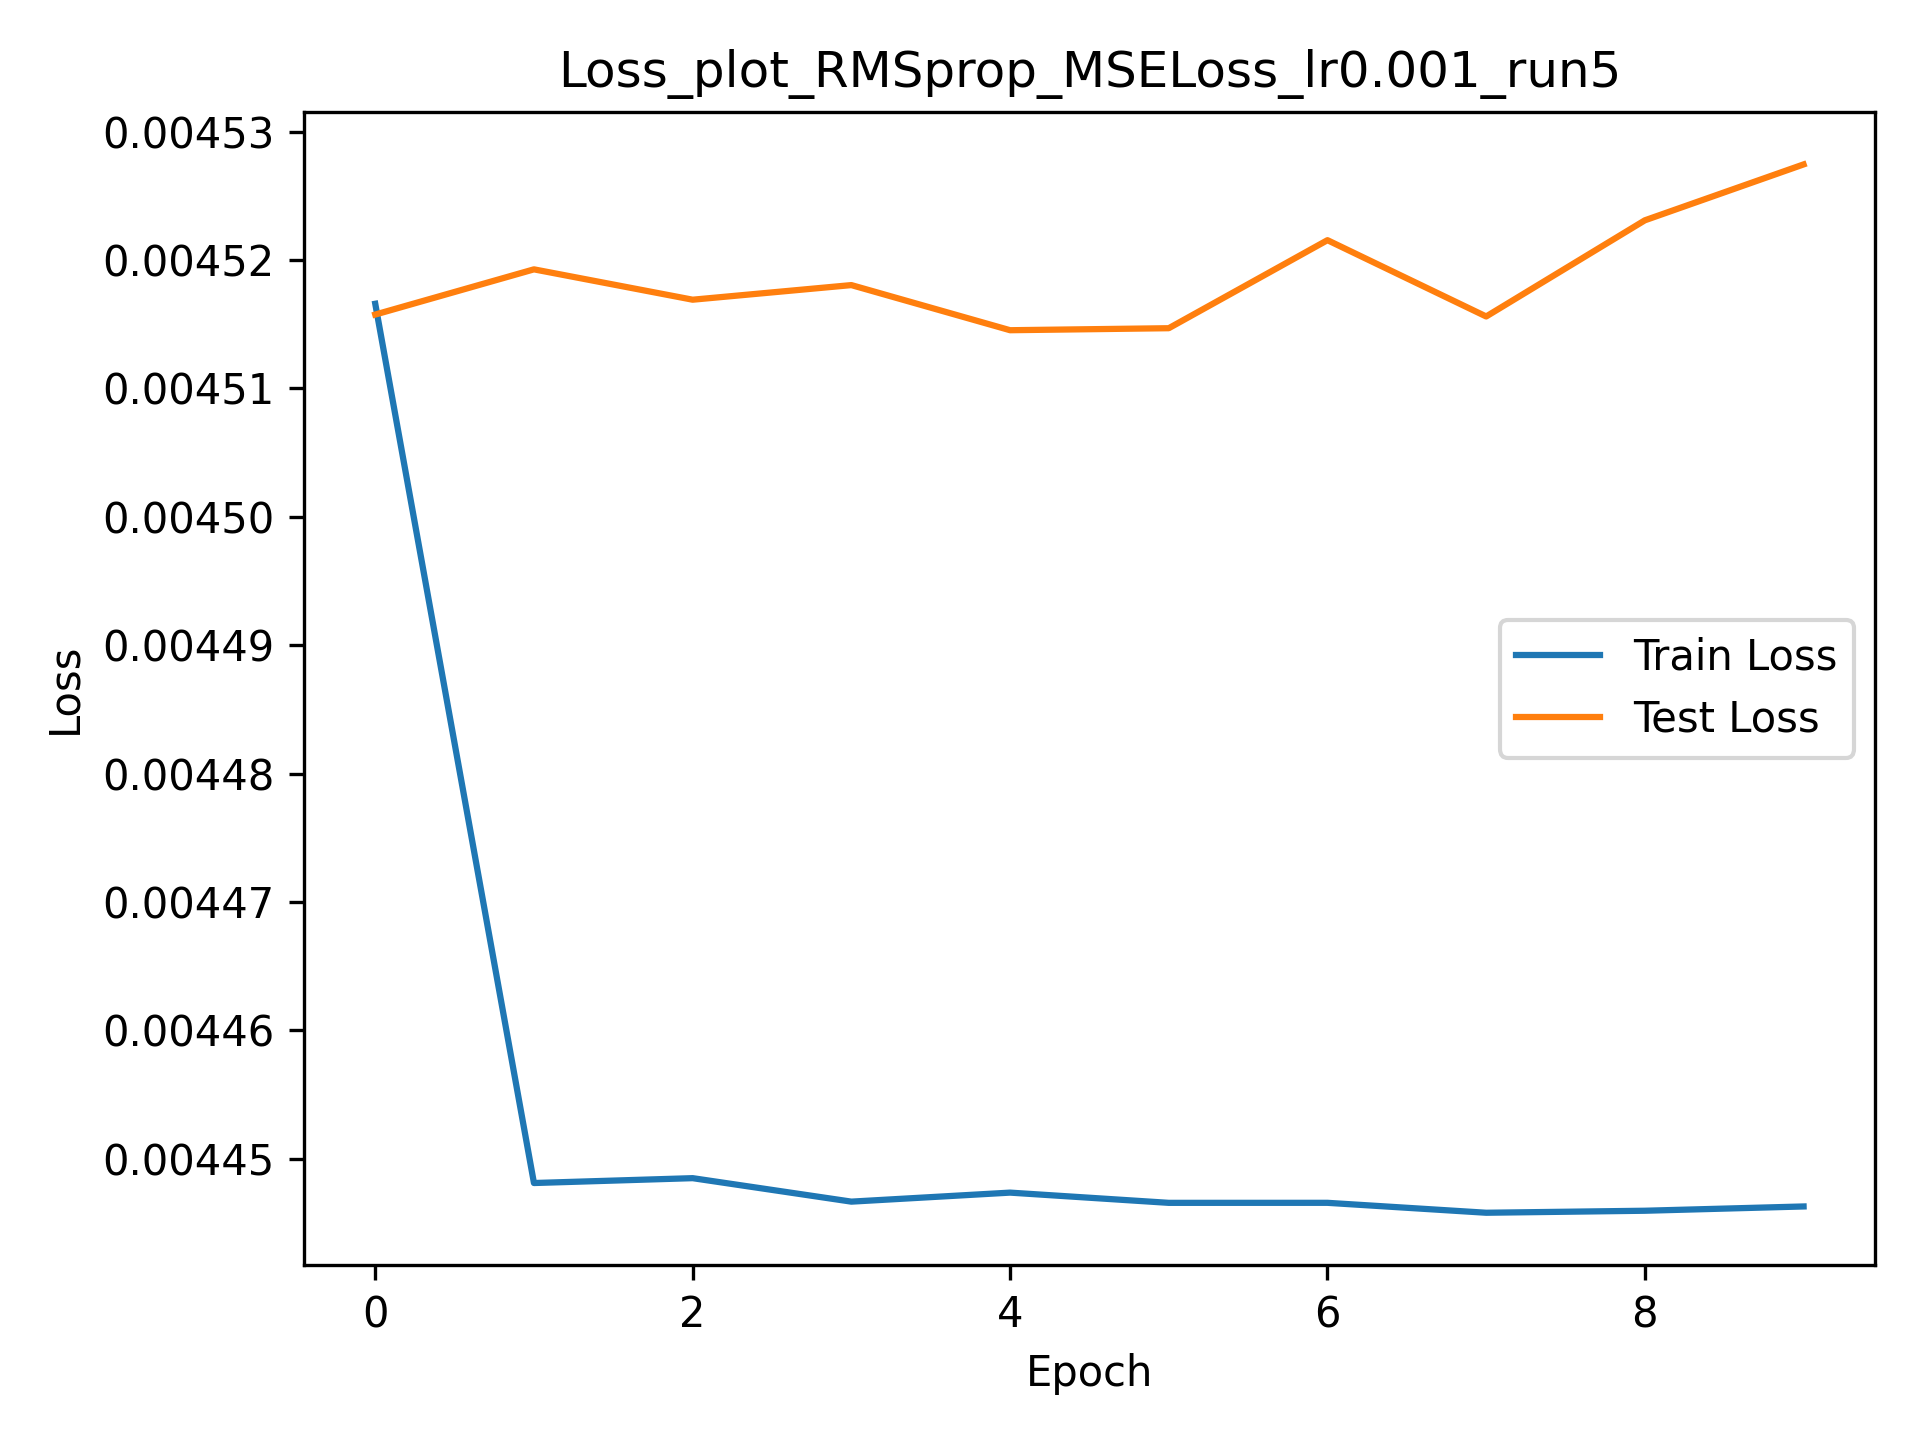

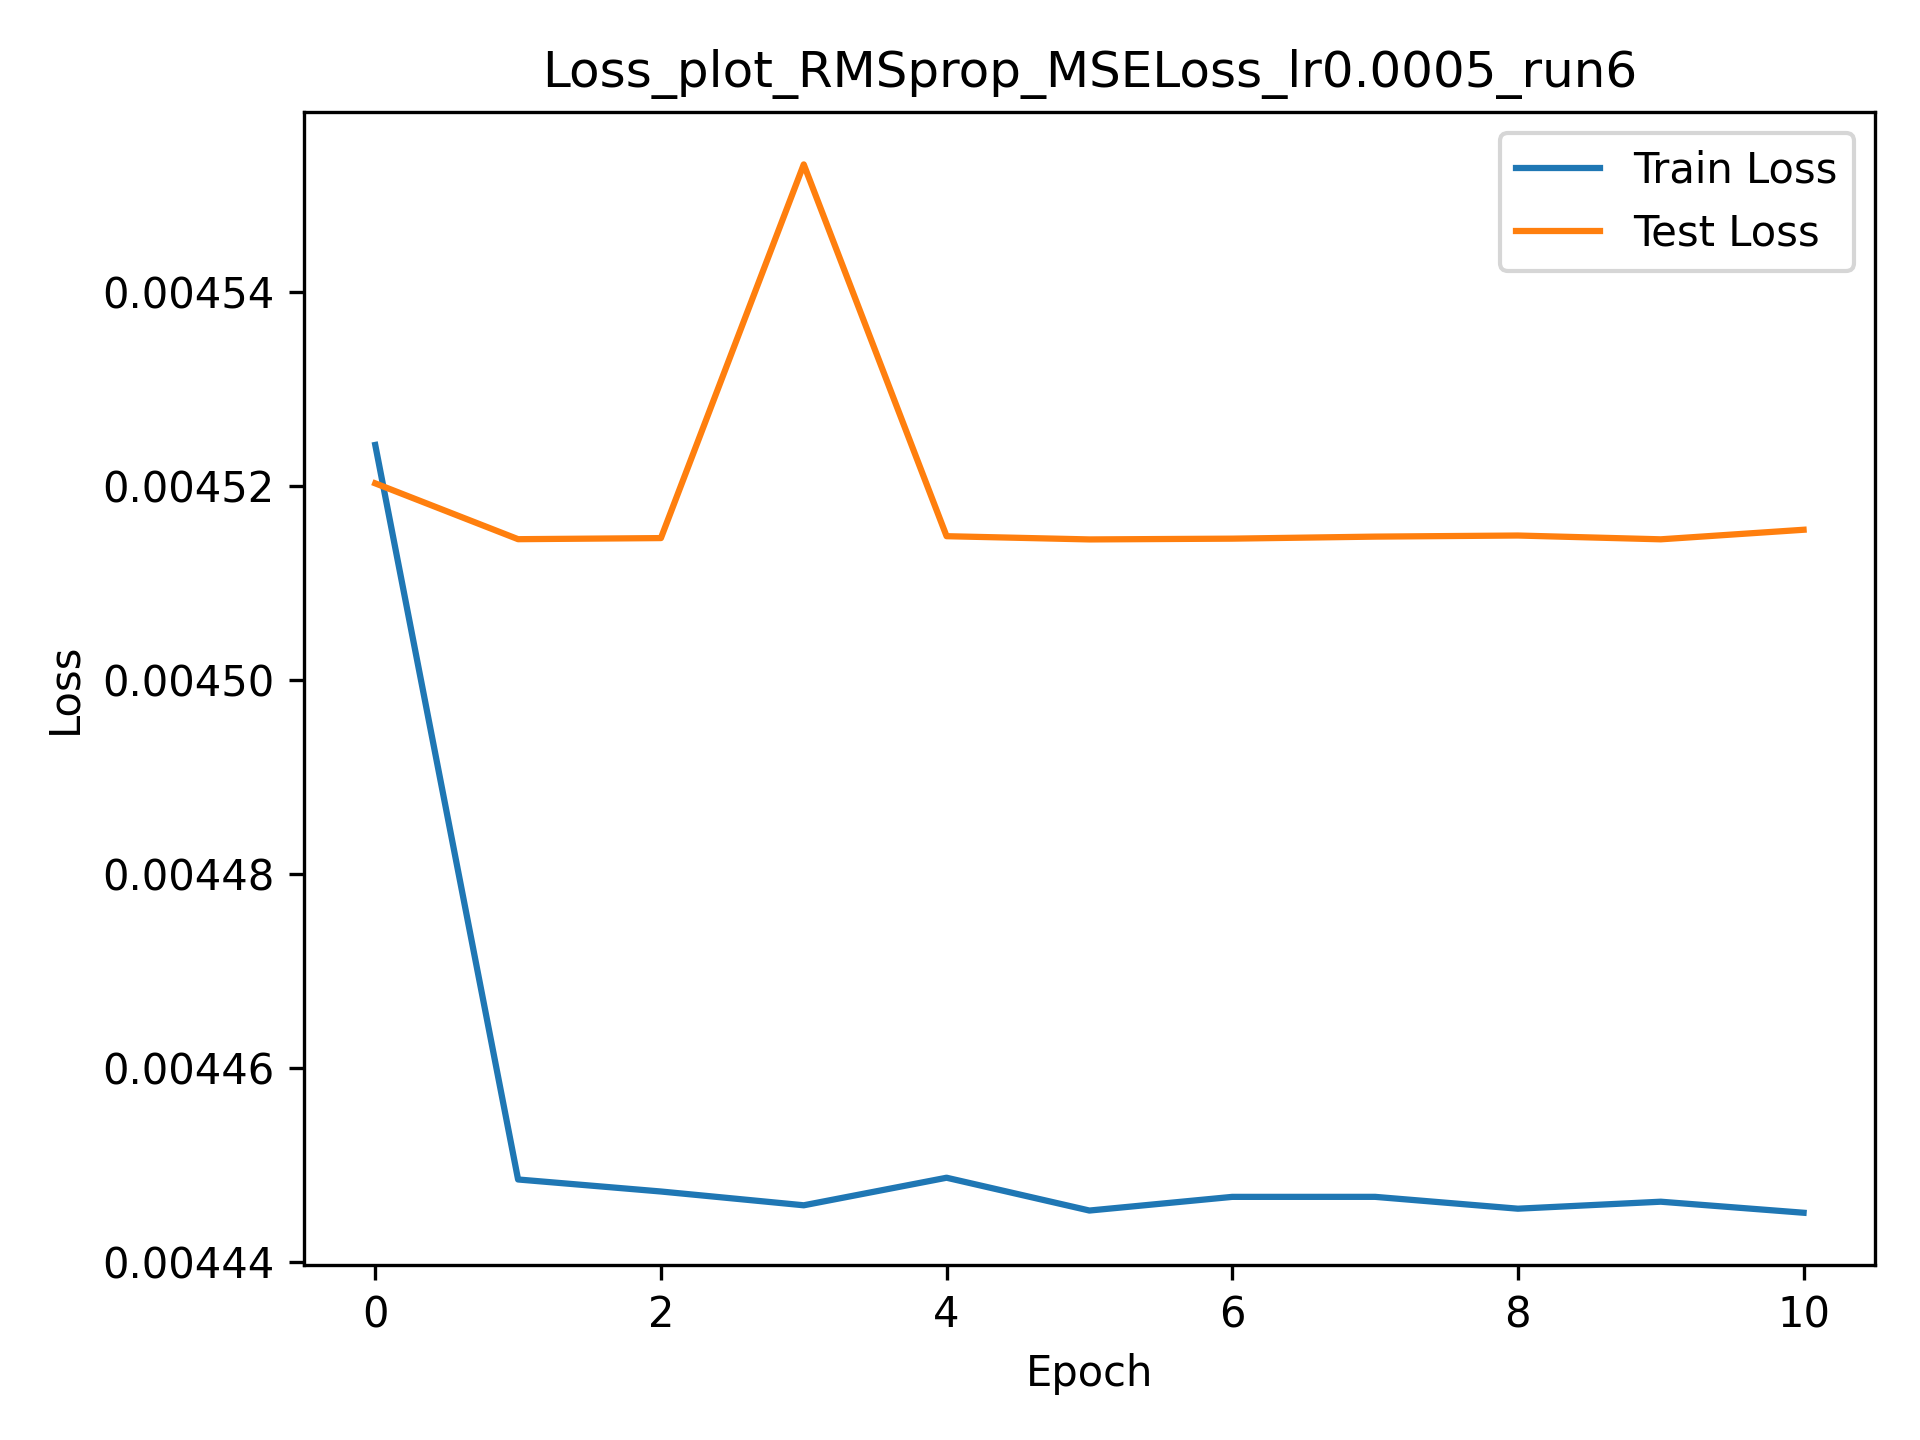

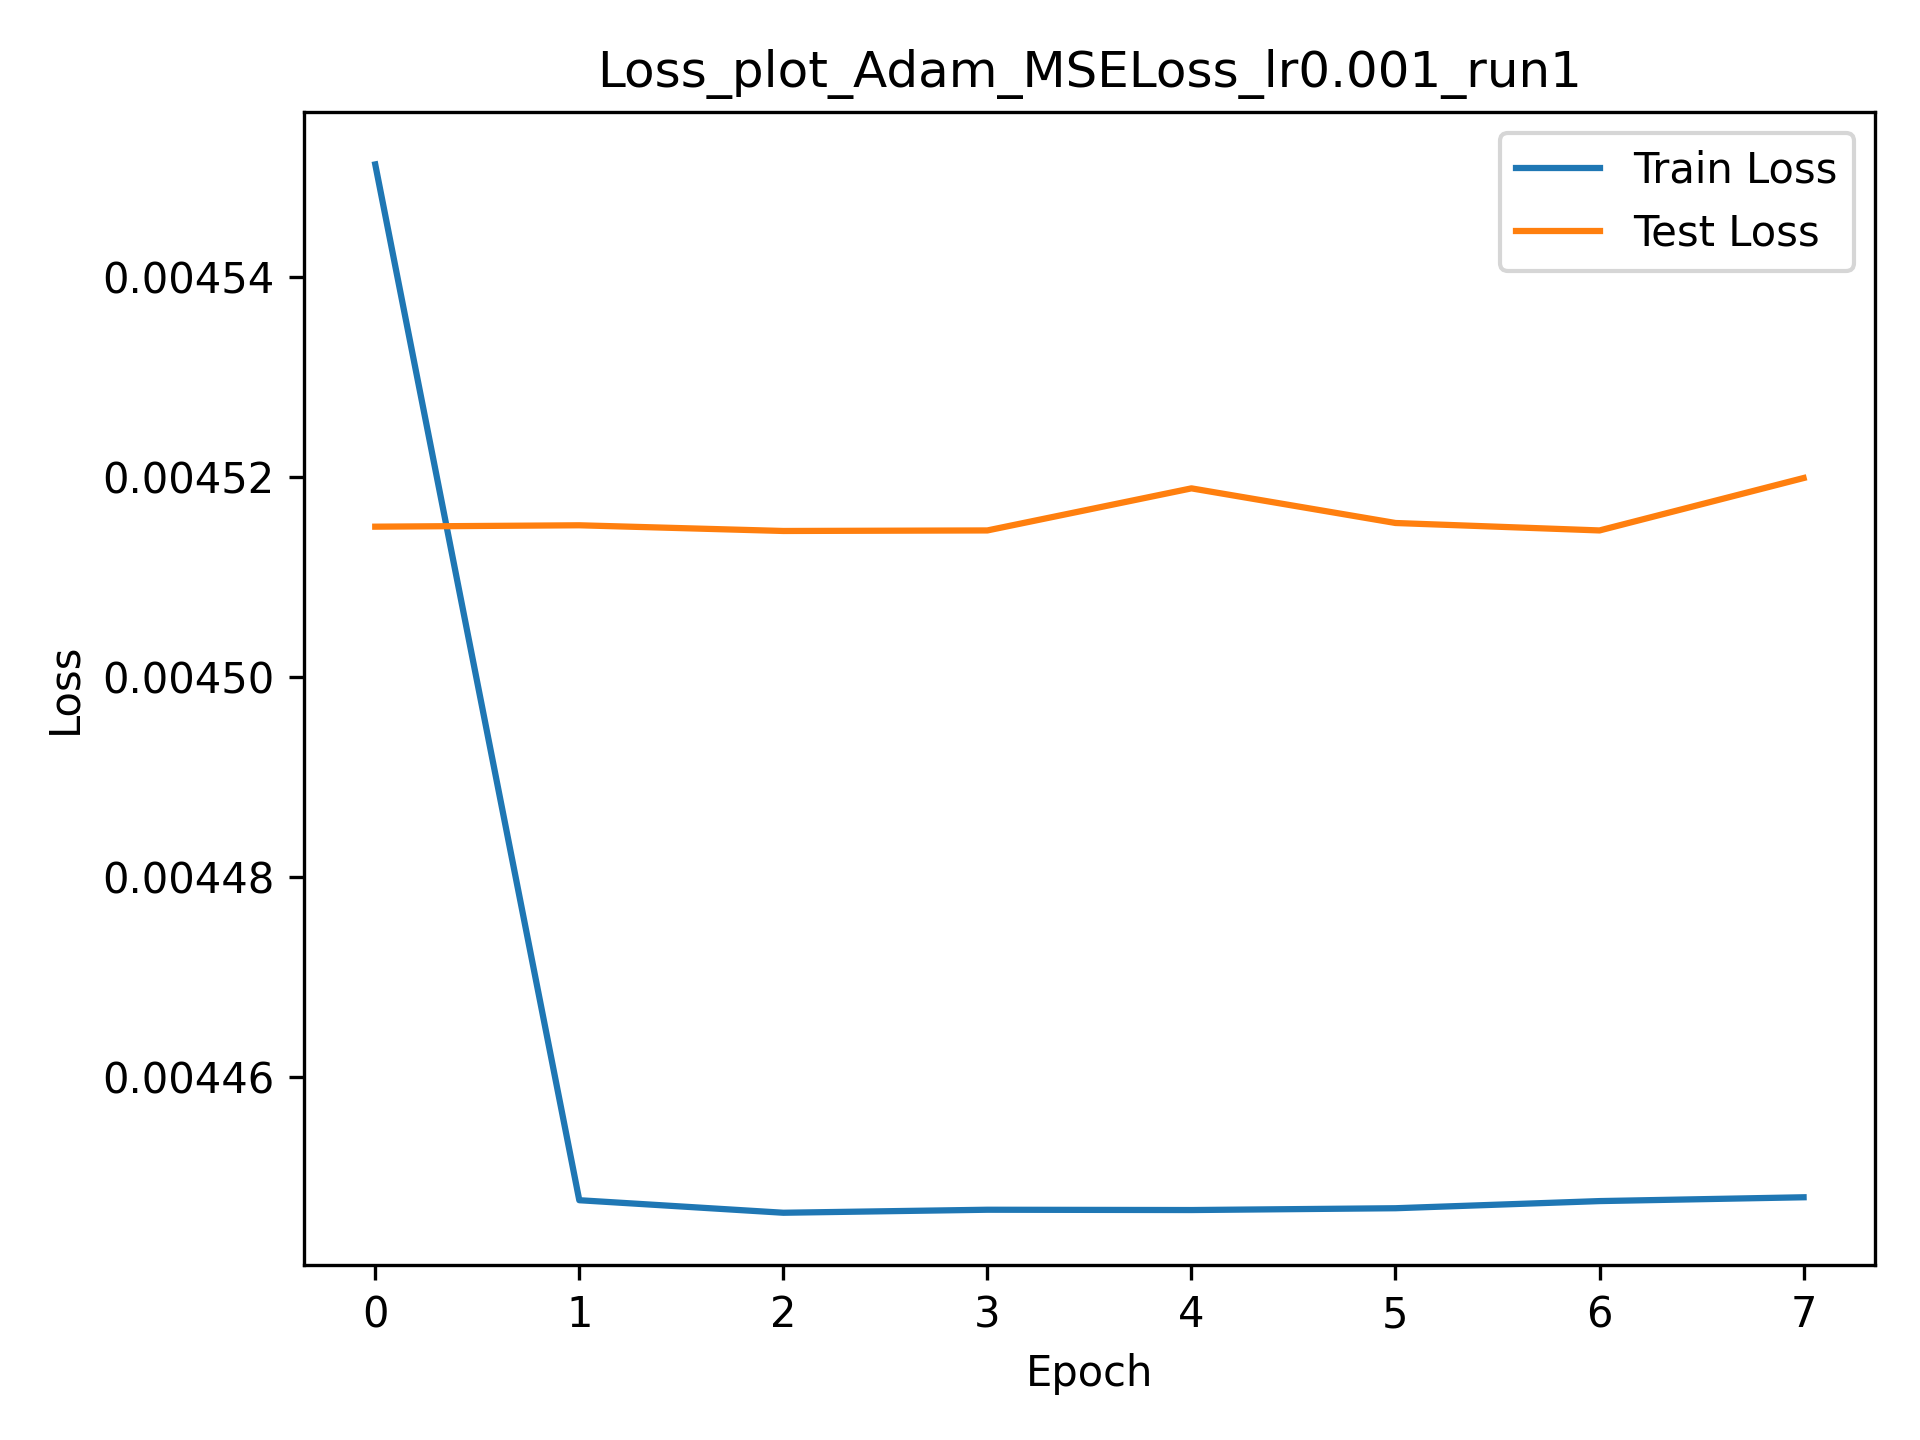

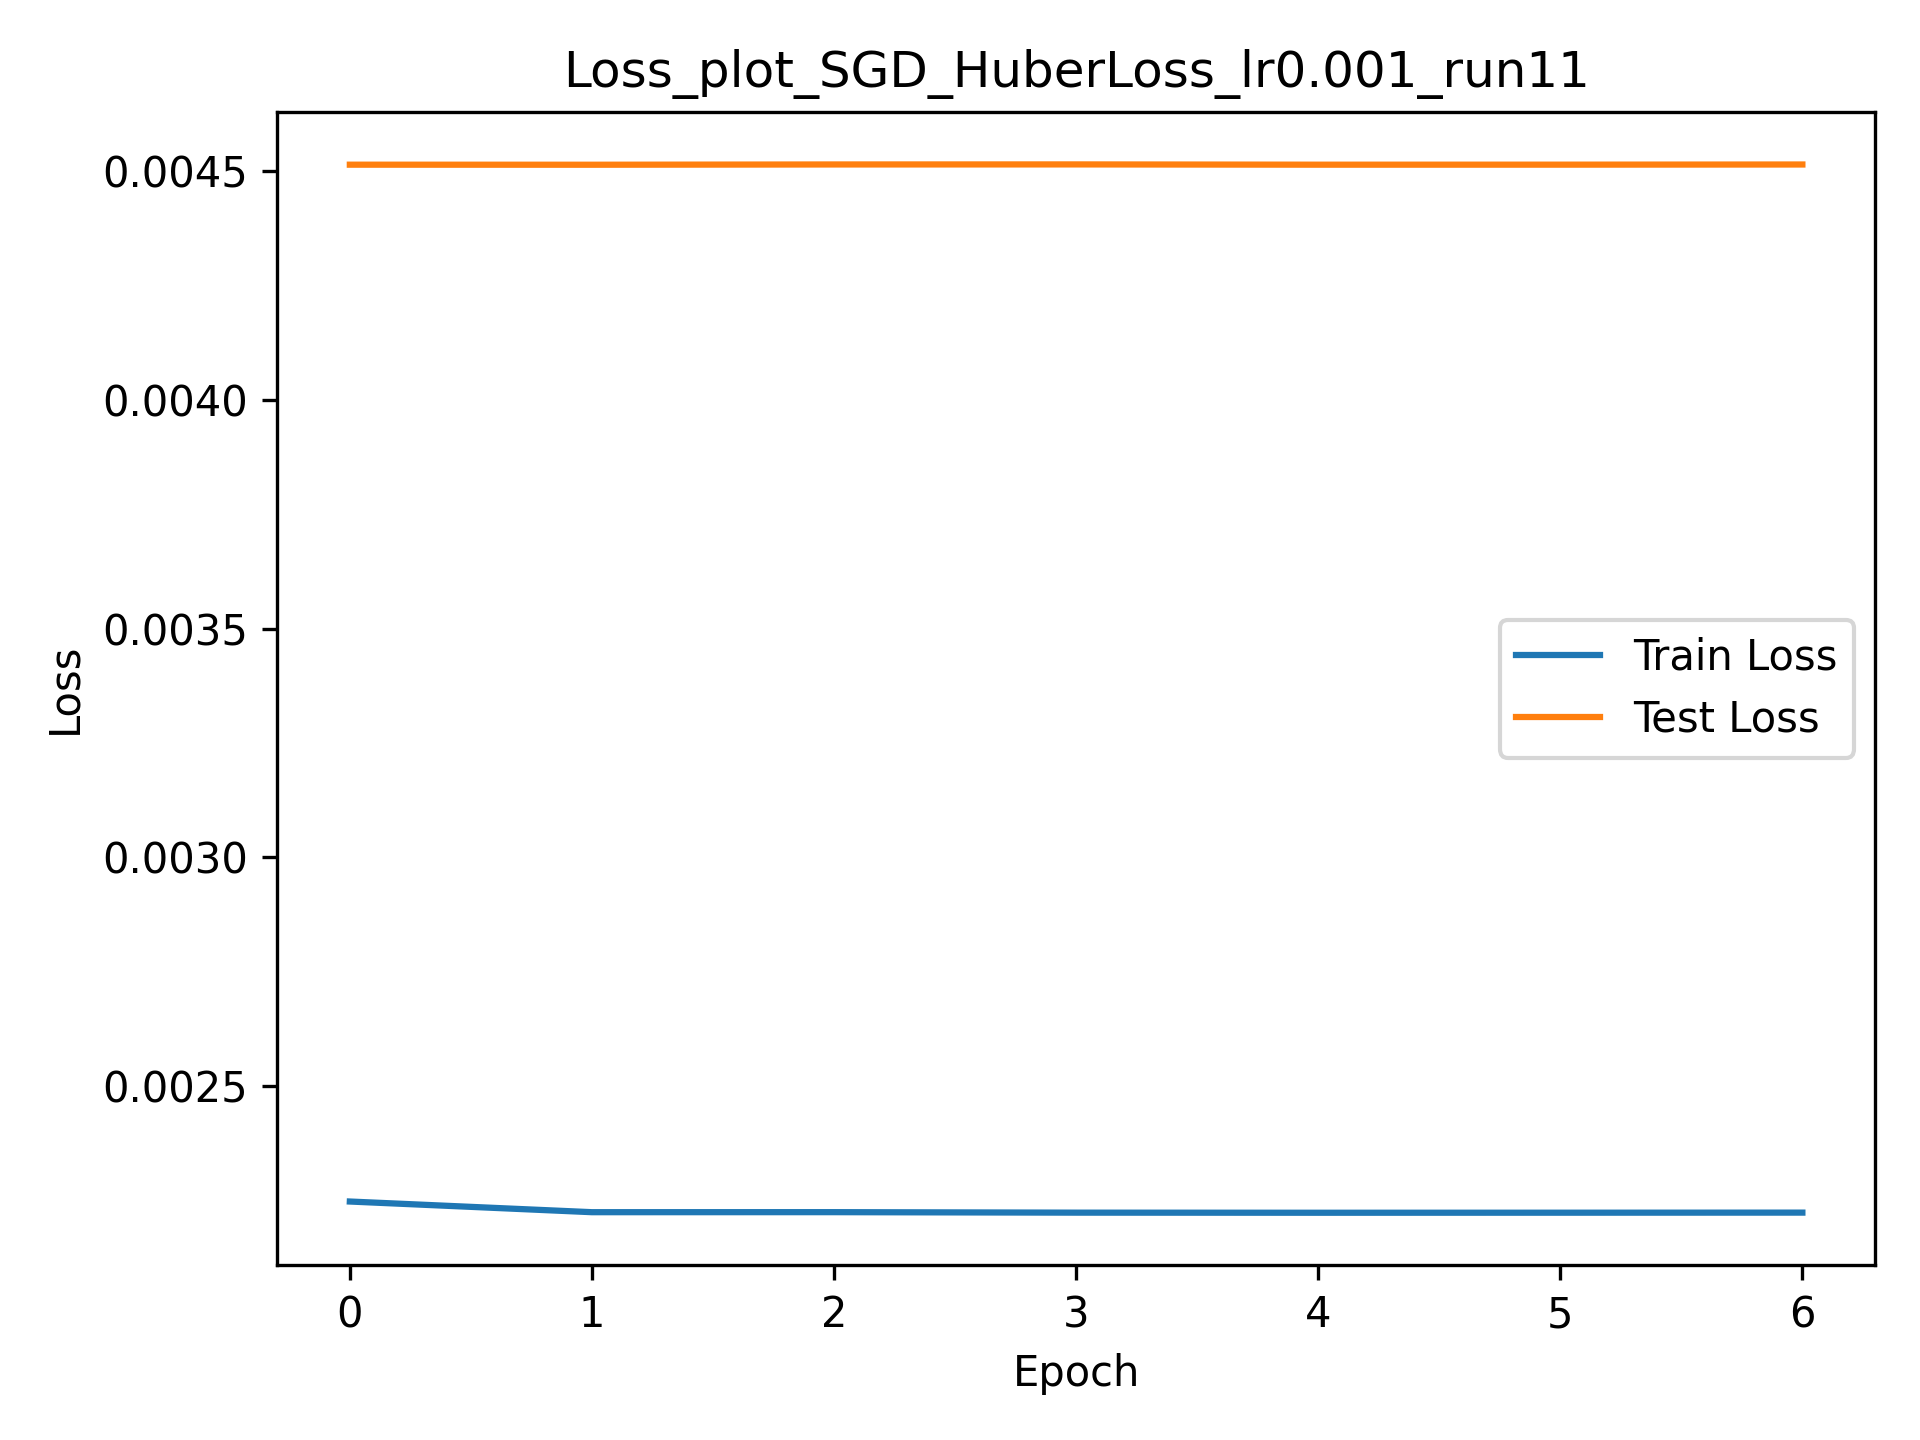

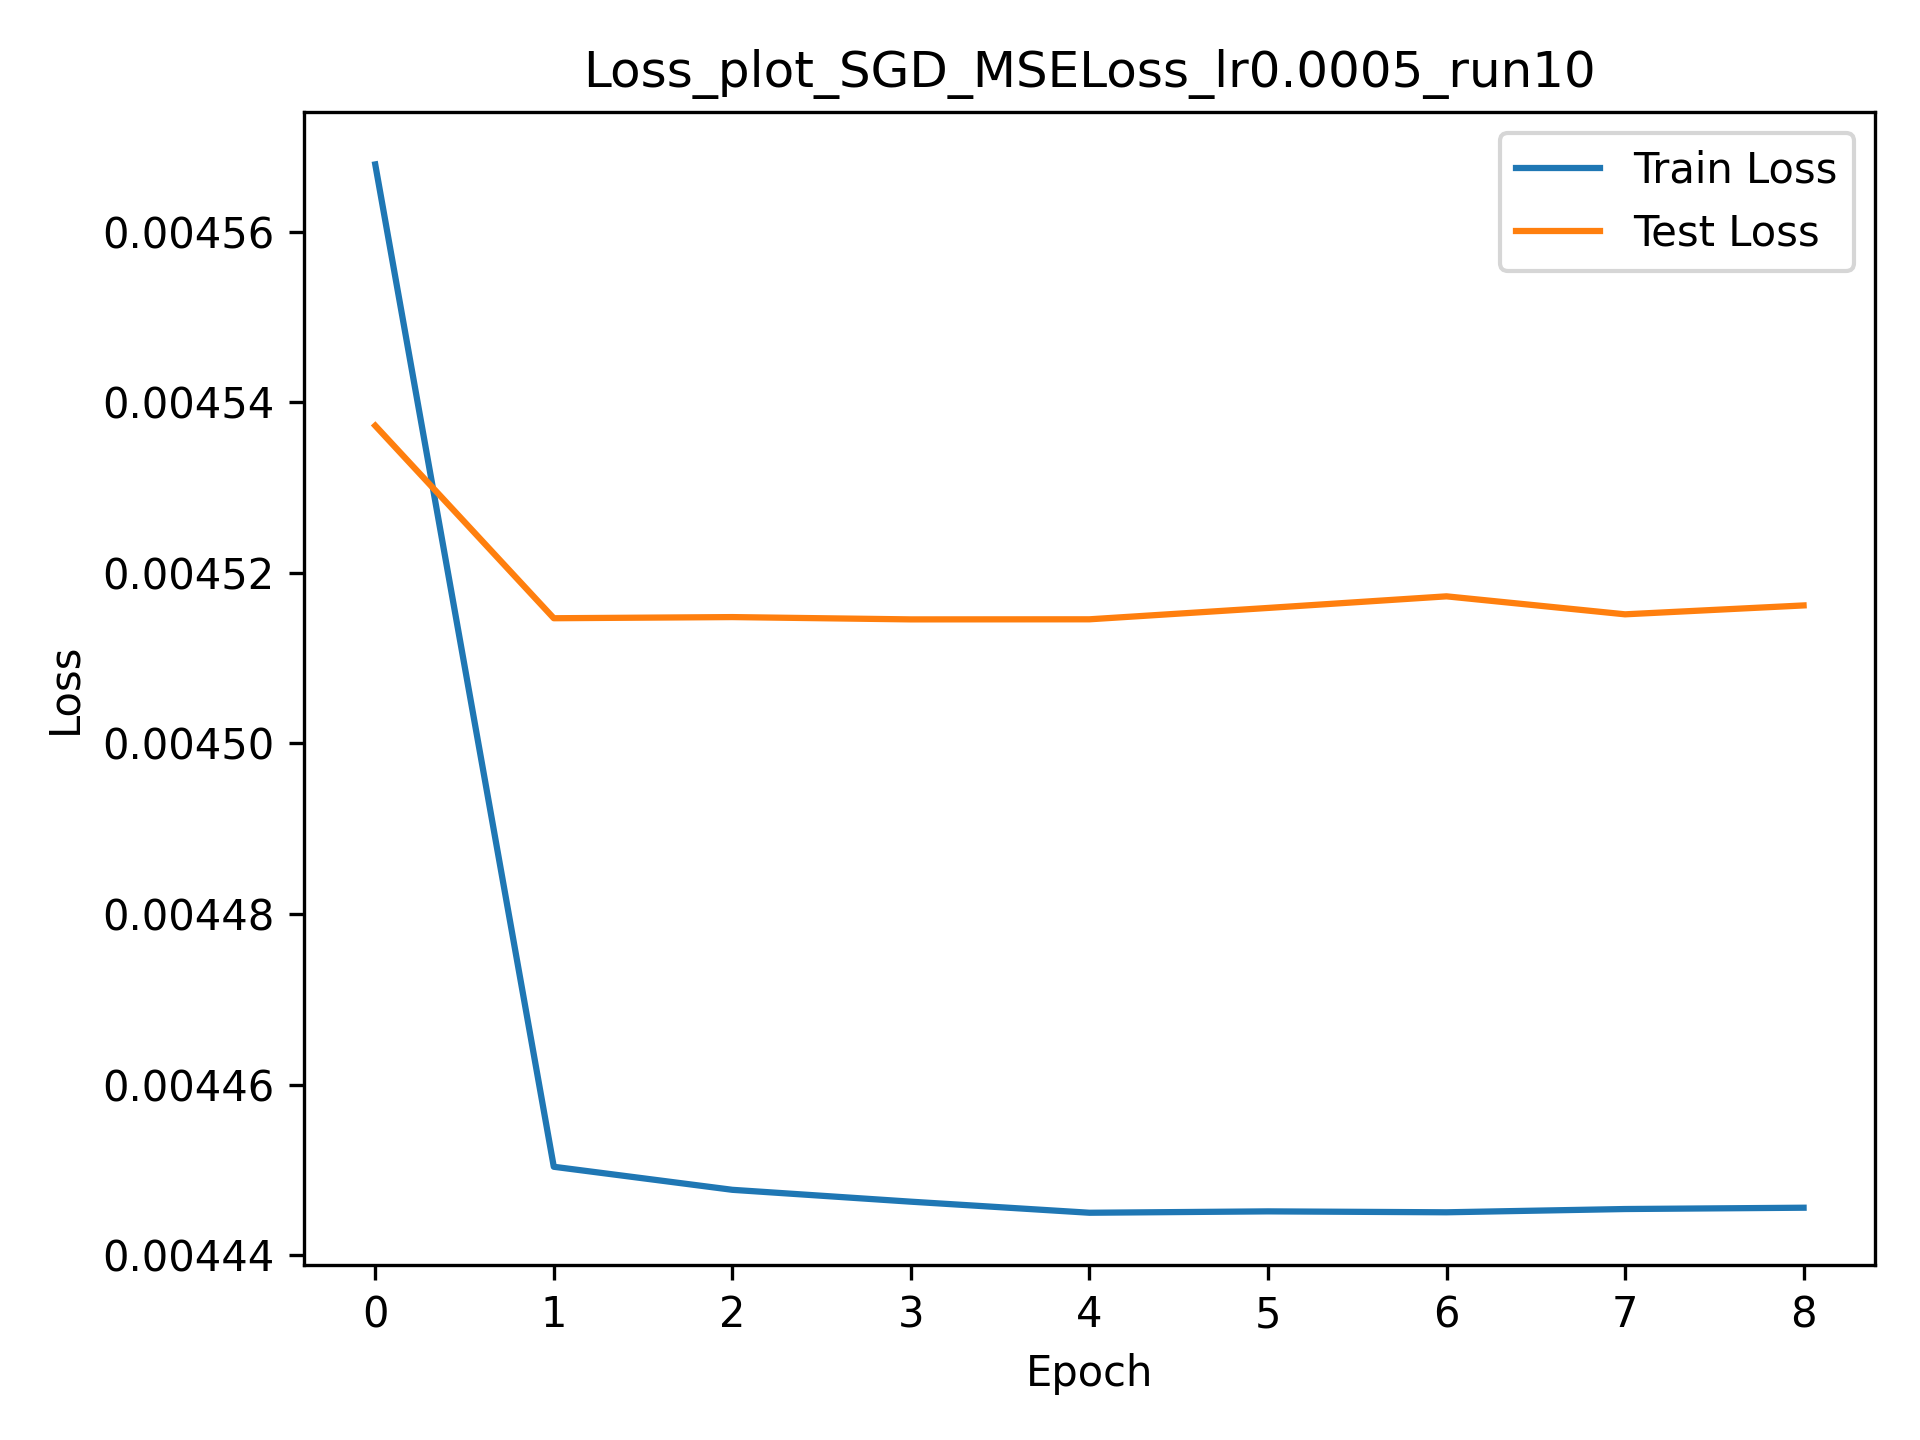

In [ ]:
from IPython.display import Image, display
import os

# Get a list of all PNG files in the directory
png_files = [f for f in os.listdir('/content') if f.endswith('.png')]

# Iterate through the list and display each image
for png_file in png_files:
    image_path = os.path.join('/content', png_file)
    display(Image(filename=image_path))